## 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA/data/sample_submission.csv')

## EDA

####**GROUP1**

- Month (출발 월)
- Day_of_Month (출발 날짜)
- Estimated_Departure_Time (출발 시간)
- Estimated_Arrival_Time (도착 시간)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/ESAA/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/ESAA/sample_submission.csv')

In [ ]:
train.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,1000000.000000,1000000.000000,890981.000000,890960.000000,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,891003.000000
mean,6.945156,15.764842,1341.153019,1493.295934,0.0,0.0,12696.278484,12701.813986,784.078499,19997.388093
std,3.462506,8.763515,489.814011,520.803494,0.0,0.0,1514.938441,1515.213044,590.790469,404.268639
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000
25%,4.000000,8.000000,925.000000,1105.000000,0.0,0.0,11292.000000,11292.000000,350.000000,19790.000000
50%,7.000000,16.000000,1332.000000,1524.000000,0.0,0.0,12889.000000,12889.000000,623.000000,19977.000000
75%,10.000000,23.000000,1742.000000,1924.000000,0.0,0.0,14057.000000,14057.000000,1020.000000,20378.000000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


In [ ]:
test.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,1000000.000000,1000000.000000,891016.000000,890952.000000,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,890994.000000
mean,6.694222,15.609095,1377.120331,1522.026944,0.0,0.0,12687.984806,12699.560390,795.849058,20001.307653
std,3.476341,8.706486,487.590917,528.269560,0.0,0.0,1509.299455,1512.906515,594.558756,402.903185
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000
25%,3.000000,8.000000,954.750000,1127.000000,0.0,0.0,11292.000000,11292.000000,358.000000,19790.000000
50%,7.000000,16.000000,1405.000000,1555.000000,0.0,0.0,12889.000000,12889.000000,634.000000,19977.000000
75%,10.000000,23.000000,1800.000000,1944.000000,0.0,0.0,14027.000000,14057.000000,1034.000000,20378.000000
max,12.000000,31.000000,2400.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


In [ ]:
train.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State', 'Destination_Airport',
       'Destination_Airport_ID', 'Destination_State', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay'],
      dtype='object')

In [ ]:
# 도착 시간과 출발 시간 간의 차이를 계산
train['Delay_Calculated'] = train['Estimated_Arrival_Time'] - train['Estimated_Departure_Time']

# 지연 여부를 이진 변수로 변환
train['Delay_Binary'] = train['Delay_Calculated'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

EDA : GROUP1

계절 및 시간대 패턴 분석

1-1) 출발 시간을 시간대별로 분리(아침, 오후, 저녁, 심야)

In [ ]:
import pandas as pd

# NaN 처리: NaN 값을 기본값으로 대체
train['Estimated_Departure_Time'] = train['Estimated_Departure_Time'].fillna(0)

# 숫자 형태의 시간을 "%H:%M" 포맷으로 변환하는 함수
def format_time(time):
    # float 또는 int 값을 문자열로 변환
    time_str = str(int(time))
    # 앞에 0이 부족한 경우(4자리 미만일 때) 채우기
    time_str = time_str.zfill(4)

    # "2400"을 "24:00"으로 변환
    if time_str == "2400":
        return "24:00"

    return f"{time_str[:2]}:{time_str[2:]}"

# 시간을 "%H:%M" 형식으로 변환
train['formatted_time'] = train['Estimated_Departure_Time'].apply(format_time)

# 시간을 datetime 형식으로 변환, 24:00은 별도로 처리
def custom_time_to_datetime(time_str):
    if time_str == "24:00":
        # 24:00은 datetime에서 지원하지 않으므로, 다음날 00:00으로 변환
        return pd.to_datetime("23:59", format='%H:%M').time()
    return pd.to_datetime(time_str, format='%H:%M').time()

train['formatted_time'] = train['formatted_time'].apply(custom_time_to_datetime)

# 시간대 분류 함수 정의
def classify_time_period(time):
    if time >= pd.to_datetime('06:00', format='%H:%M').time() and time < pd.to_datetime('12:00', format='%H:%M').time():
        return 'morning'
    elif time >= pd.to_datetime('12:00', format='%H:%M').time() and time < pd.to_datetime('18:00', format='%H:%M').time():
        return 'afternoon'
    elif time >= pd.to_datetime('18:00', format='%H:%M').time() and time <= pd.to_datetime('23:59', format='%H:%M').time():
        return 'night'
    else:
        return 'late night'

# 시간대 분류 적용
train['time_period'] = train['formatted_time'].apply(classify_time_period)

# 결과 출력
print(train)


                  ID  Month  Day_of_Month  Estimated_Departure_Time  \
0       TRAIN_000000      4            15                       0.0   
1       TRAIN_000001      8            15                     740.0   
2       TRAIN_000002      9             6                    1610.0   
3       TRAIN_000003      7            10                     905.0   
4       TRAIN_000004      1            11                     900.0   
...              ...    ...           ...                       ...   
999995  TRAIN_999995      9            18                     936.0   
999996  TRAIN_999996      5            30                     920.0   
999997  TRAIN_999997      6            28                     800.0   
999998  TRAIN_999998      9            27                    1613.0   
999999  TRAIN_999999      3            26                    1800.0   

        Estimated_Arrival_Time  Cancelled  Diverted Origin_Airport  \
0                          NaN          0         0            OKC   
1      

In [ ]:
print(train.head())  # 'time_period'가 생성되었는지 확인

             ID  Month  Day_of_Month  Estimated_Departure_Time  \
0  TRAIN_000000      4            15                       0.0   
1  TRAIN_000001      8            15                     740.0   
2  TRAIN_000002      9             6                    1610.0   
3  TRAIN_000003      7            10                     905.0   
4  TRAIN_000004      1            11                     900.0   

   Estimated_Arrival_Time  Cancelled  Diverted Origin_Airport  \
0                     NaN          0         0            OKC   
1                  1024.0          0         0            ORD   
2                  1805.0          0         0            CLT   
3                  1735.0          0         0            LAX   
4                  1019.0          0         0            SFO   

   Origin_Airport_ID    Origin_State  ... Distance                 Airline  \
0              13851        Oklahoma  ...    419.0  Southwest Airlines Co.   
1              13930        Illinois  ...   1250.0   Sky

1-2) 시간대별 비행 수

1-3) 시간대별 지연 수

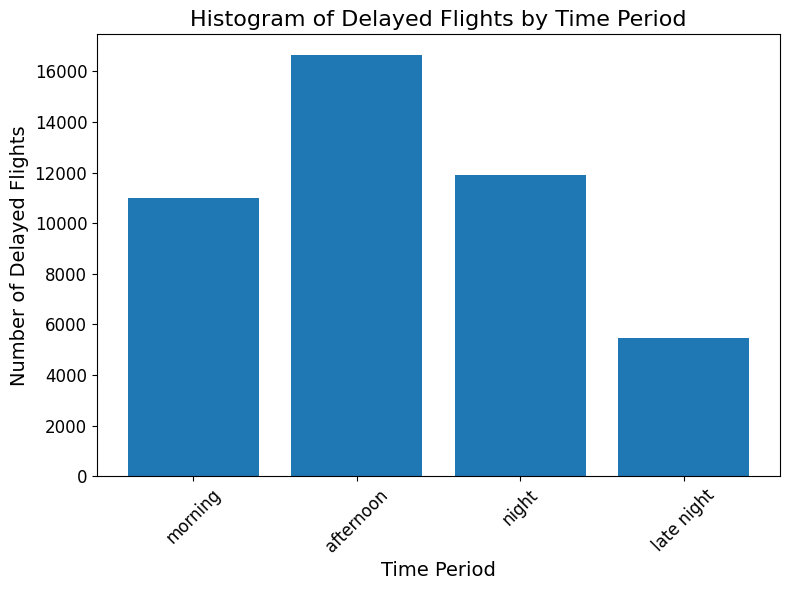

In [ ]:
import matplotlib.pyplot as plt

# 모든 시간대 추가를 위한 범주형 데이터 정의
time_period_categories = ['morning', 'afternoon', 'night', 'late night']

# 'Delay' 칼럼이 'Delayed'인 비행만 필터링
delayed_flights = train[train['Delay'] == 'Delayed']  # 지연된 비행만 필터링

# time_period별로 지연된 비행 수 계산
time_period_delay_counts = delayed_flights['time_period'].value_counts()
time_period_delay_counts = time_period_delay_counts.reindex(time_period_categories, fill_value=0)  # 빈 시간대는 0으로 채움

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
plt.bar(time_period_delay_counts.index, time_period_delay_counts.values)

# 그래프 제목 및 레이블 설정
plt.title('Histogram of Delayed Flights by Time Period', fontsize=16)
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Number of Delayed Flights', fontsize=14)

# 축 레이블 회전
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()


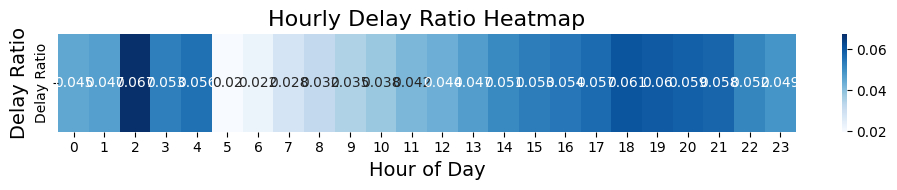

In [ ]:
import seaborn as sns

# 'Estimated_Departure_Time'을 시간 형식으로 변환
train['Estimated_Departure_Time'] = train['Estimated_Departure_Time'].apply(lambda x: str(int(x)).zfill(4))
train['hour'] = train['Estimated_Departure_Time'].str[:2].astype(int)  # 시간만 추출

# 시간대별 지연 비율 계산
hourly_delay_ratio = train.groupby('hour')['delay_ratio'].mean()

# 히트맵
hourly_delay_matrix = hourly_delay_ratio.values.reshape(1, -1)  # 1행으로 변환하여 히트맵 형식으로 만듦

plt.figure(figsize=(10, 2))
sns.heatmap(hourly_delay_matrix, annot=True, cmap='Blues', xticklabels=hourly_delay_ratio.index, yticklabels=['Delay Ratio'])
plt.title('Hourly Delay Ratio Heatmap', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Delay Ratio', fontsize=14)
plt.tight_layout()
plt.show()




---
출발시간 별 지연수


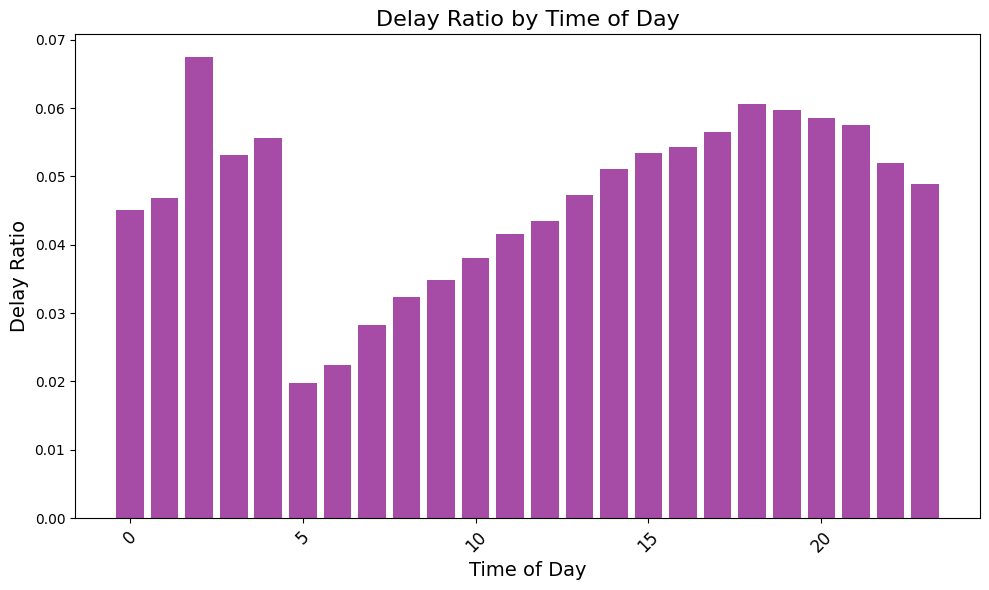

In [ ]:
# 시간대별 지연 비율 계산
time_of_day_delay_ratio = train.groupby('hour')['delay_ratio'].mean()

# 막대그래프
plt.figure(figsize=(10, 6))
plt.bar(time_of_day_delay_ratio.index, time_of_day_delay_ratio.values, color='purple', alpha=0.7)
plt.title('Delay Ratio by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Delay Ratio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


2) 월별 / 날짜별 지연 비행기 수 및 지연율

2-1) 월별 비행기 수 및 지연 비율 계산

In [ ]:
# 1월부터 12월까지의 월 인덱스 생성
months = list(range(1, 13))

# 월별 비행기 수와 지연 비율 계산
monthly_flights = train['Month'].value_counts().reindex(months, fill_value=0).sort_index()  # 월별 비행기 수
delay_ratio = train[train['Delay'] == 'Delayed'].groupby('Month').size().reindex(months, fill_value=0) / train.groupby('Month').size().reindex(months, fill_value=0)


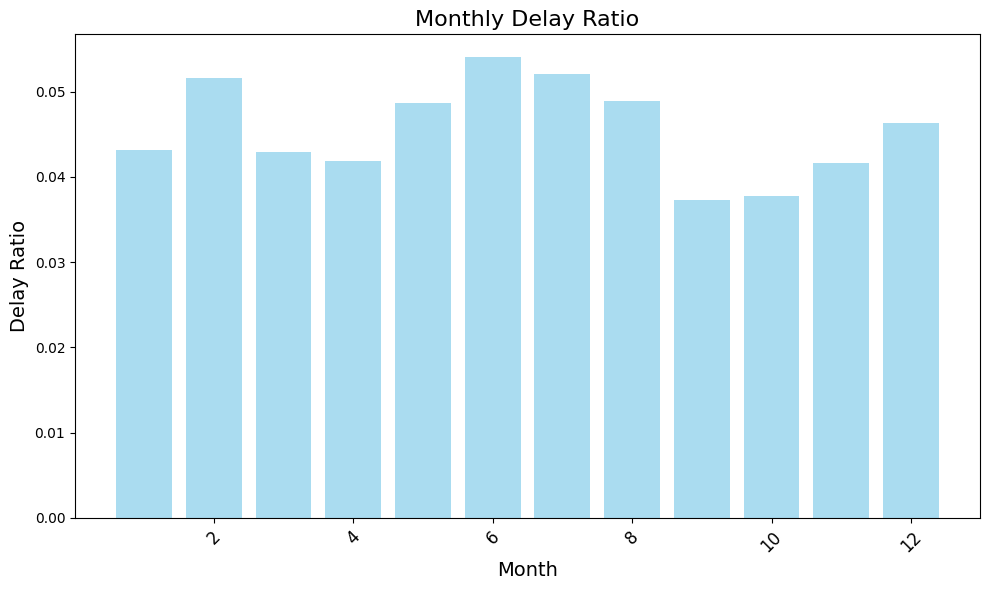

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 월별 지연 비율 계산
train['delay_ratio'] = train['Delay'].map(lambda x: 1 if x == 'Delayed' else 0)
monthly_delay_ratio = train.groupby('Month')['delay_ratio'].mean()

# 막대그래프
plt.figure(figsize=(10, 6))
plt.bar(monthly_delay_ratio.index, monthly_delay_ratio.values, color='skyblue', alpha=0.7)
plt.title('Monthly Delay Ratio', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Delay Ratio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


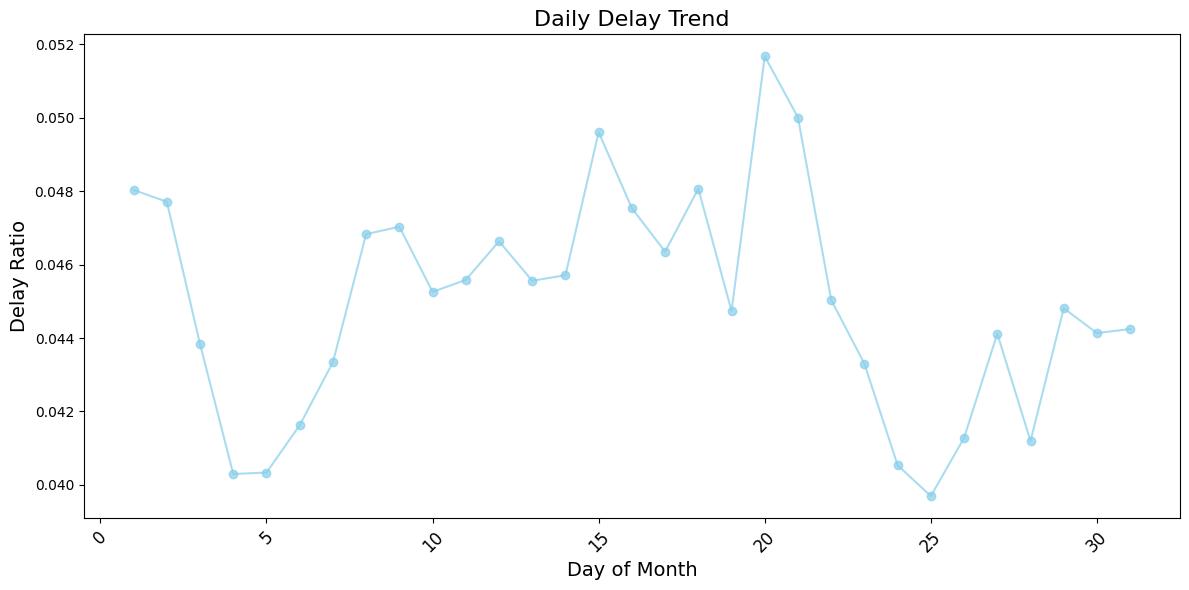

In [ ]:
# 날짜별 지연 비율 계산
daily_delay_ratio = train.groupby('Day_of_Month')['delay_ratio'].mean()

# 라인차트
plt.figure(figsize=(12, 6))
plt.plot(daily_delay_ratio.index, daily_delay_ratio.values, marker='o', color='skyblue', linestyle='-', alpha=0.7)
plt.title('Daily Delay Trend', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Delay Ratio', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


2-2) 날짜별 비행기 수 및 지연비율 계산(위에)

---

---

####**GROUP2**

- Origin_Airport (출발 공항 코드)
- Destination_Airport (도착 공항 코드)
- Origin_State (출발 주)
- Destination_State (도착 주)

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

Month

In [ ]:
print(train['Month'].unique())  # 고유한 값 확인
print(train['Month'].isnull().sum())  # NaN 개수 확인

[ 4  8  9  7  1  6  3 12 11  5 10  2]
0


In [ ]:
def calculate_quarter(Month):
    if not isinstance(Month, (int, float)):  # 값이 숫자인지 확인
        return 0  # 잘못된 데이터 처리
    if 1 <= Month <= 3:
        return 1  # 1분기
    elif 4 <= Month <= 6:
        return 2  # 2분기
    elif 7 <= Month <= 9:
        return 3  # 3분기
    elif 10 <= Month <= 12:
        return 4  # 4분기
    else:
        return 0

train['release_quarter'] = train['Month'].apply(calculate_quarter)
test['release_quarter'] = test['Month'].apply(calculate_quarter)

train['release_quarter'].head()

,release_quarter
0,2
1,3
2,3
3,3
4,1


In [ ]:
release_quarter_encoded_train = pd.get_dummies(train['release_quarter'], prefix='release_quarter').astype(int)
release_quarter_encoded_test = pd.get_dummies(test['release_quarter'], prefix='release_quarter').astype(int)

train = pd.concat([train, release_quarter_encoded_train], axis=1)
test = pd.concat([test, release_quarter_encoded_test], axis=1)

train.head(5)

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,release_quarter,release_quarter_1,release_quarter_2,release_quarter_3,release_quarter_4
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,...,Southwest Airlines Co.,WN,19393.0,N7858A,NaN,2,0,1,0,0
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN,3,0,0,1,0
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,American Airlines Inc.,AA,19805.0,N103US,NaN,3,0,0,1,0
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,United Air Lines Inc.,UA,NaN,N595UA,NaN,3,0,0,1,0
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN,1,1,0,0,0


In [ ]:
# 분기별 count 확인
# plt.figure(figsize=(5, 3))
# quarter_counts = test.groupby('release_quarter')['title'].count()
# quarter_counts.plot(kind='bar')
# plt.xticks(rotation=0)

시각화

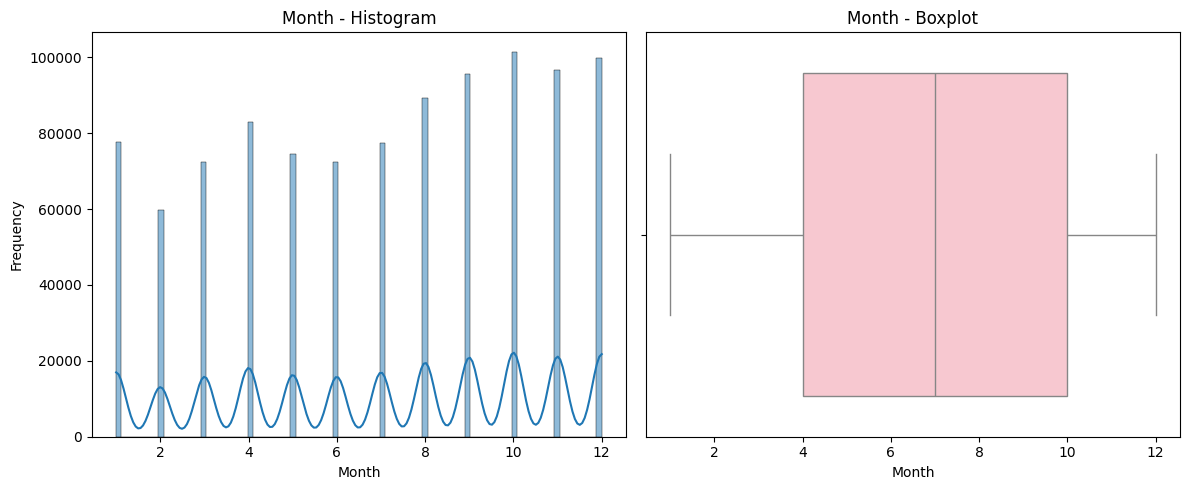

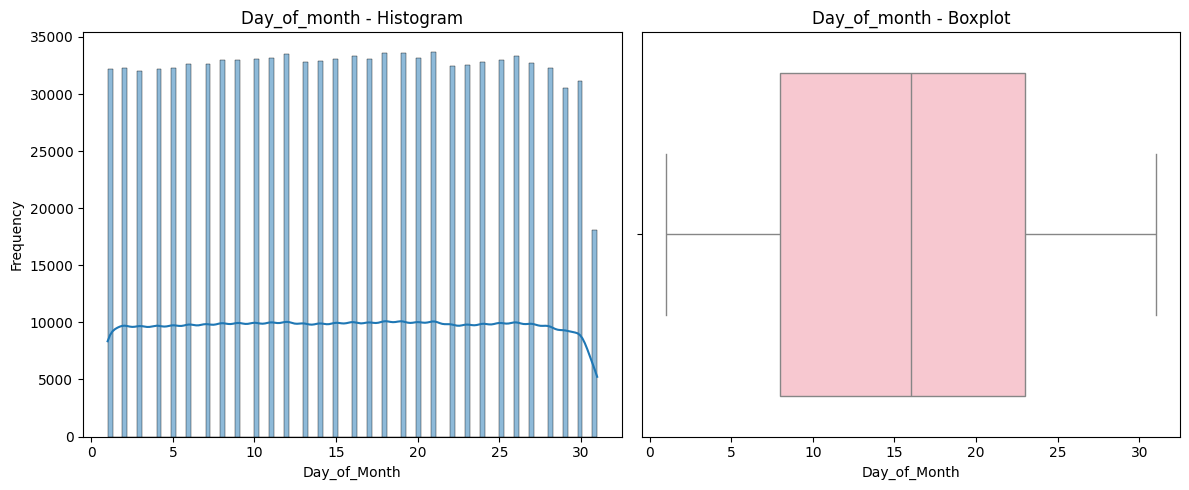

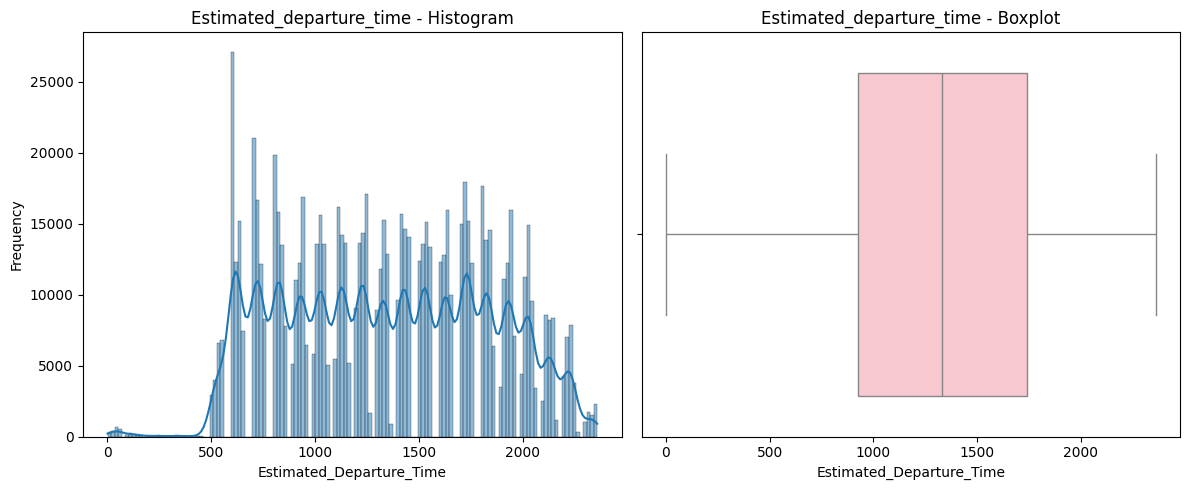

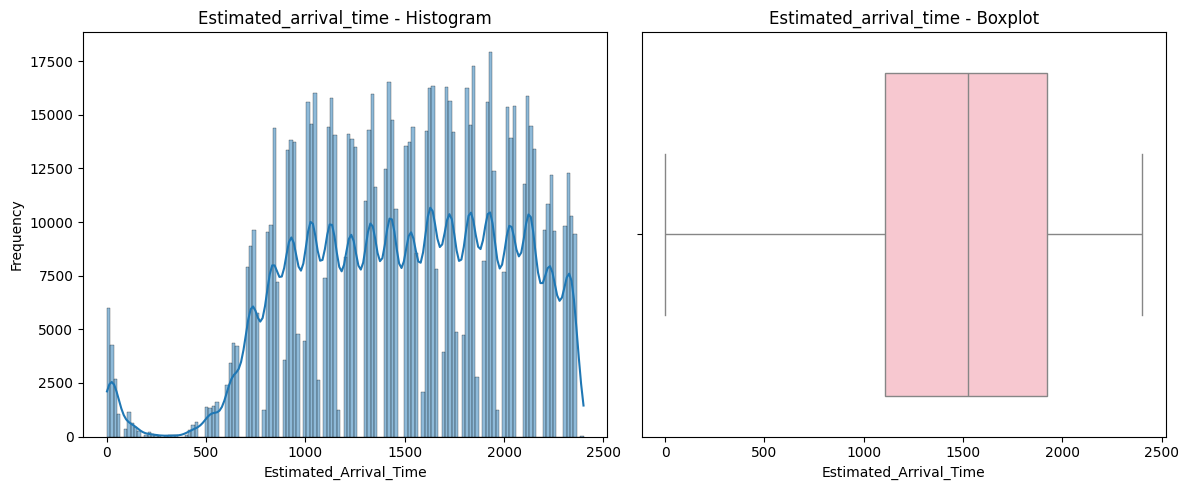

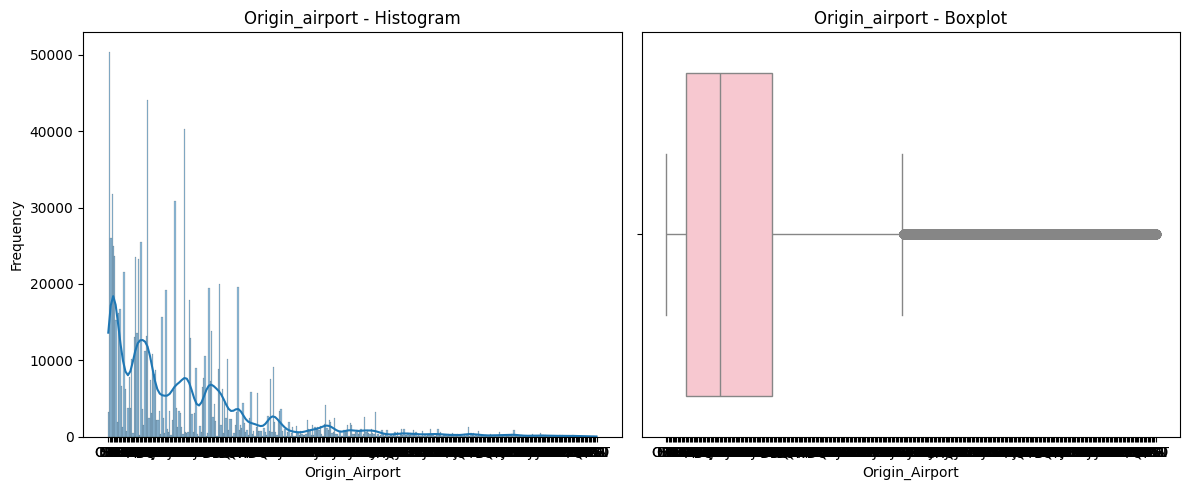

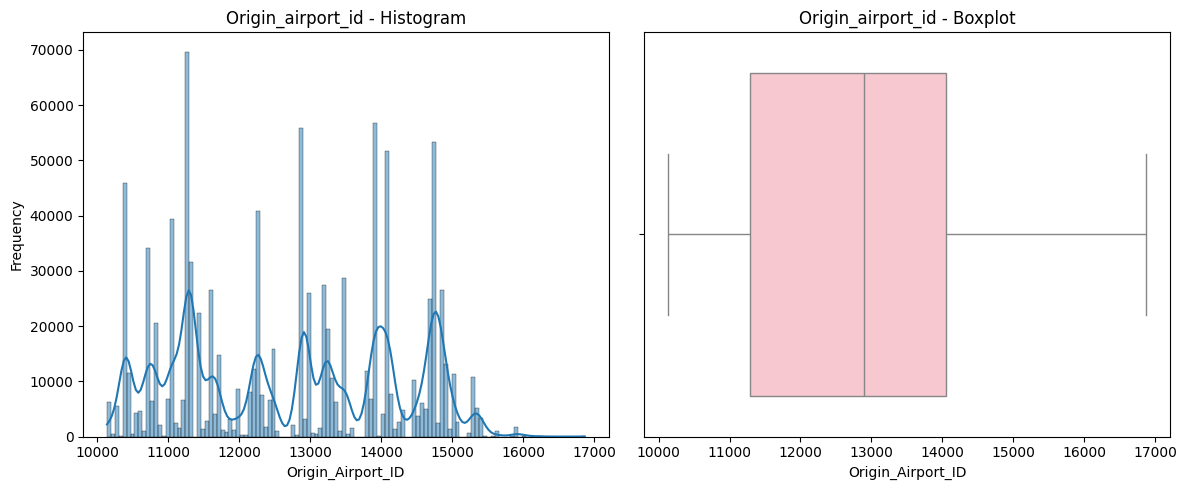

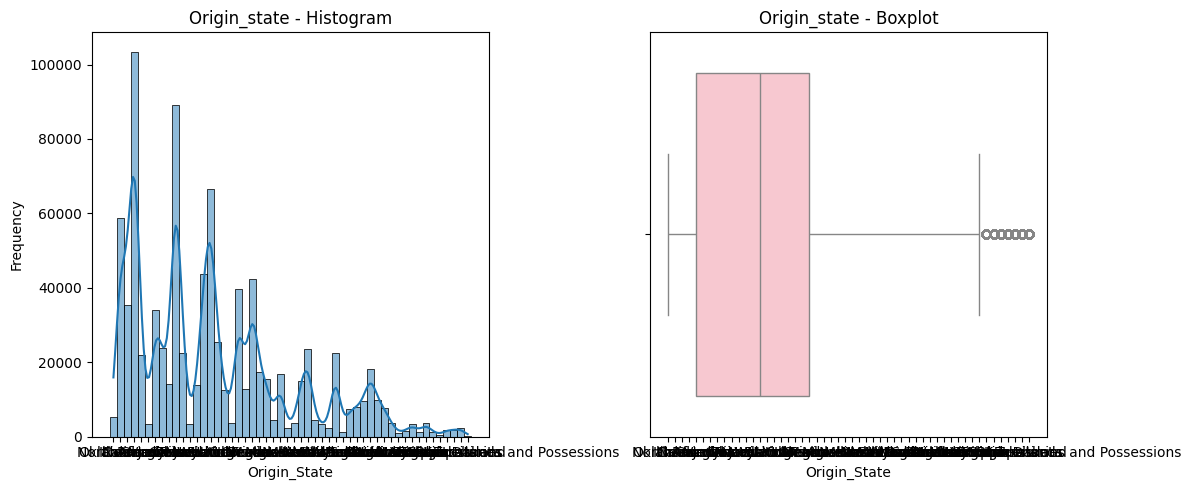

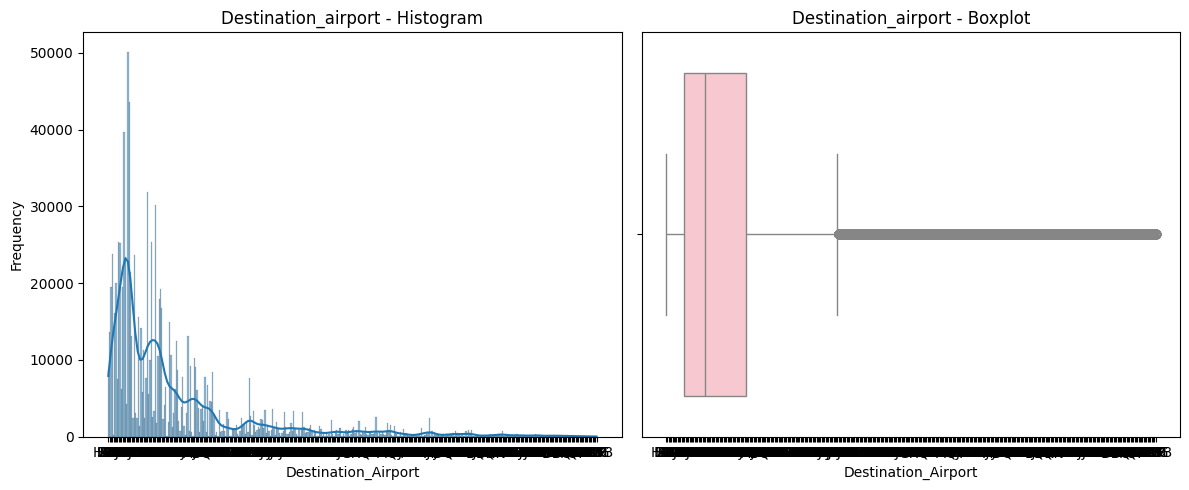

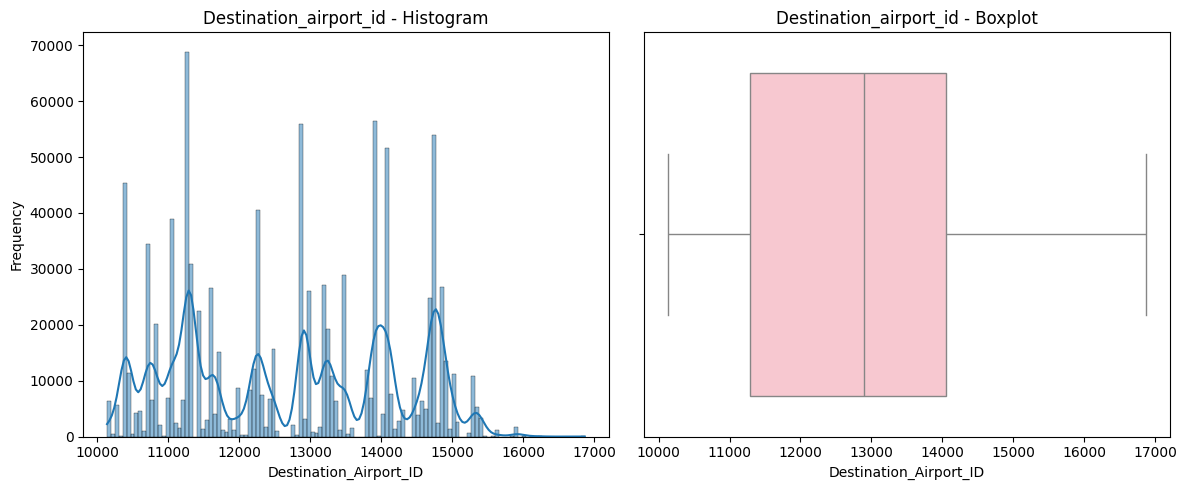

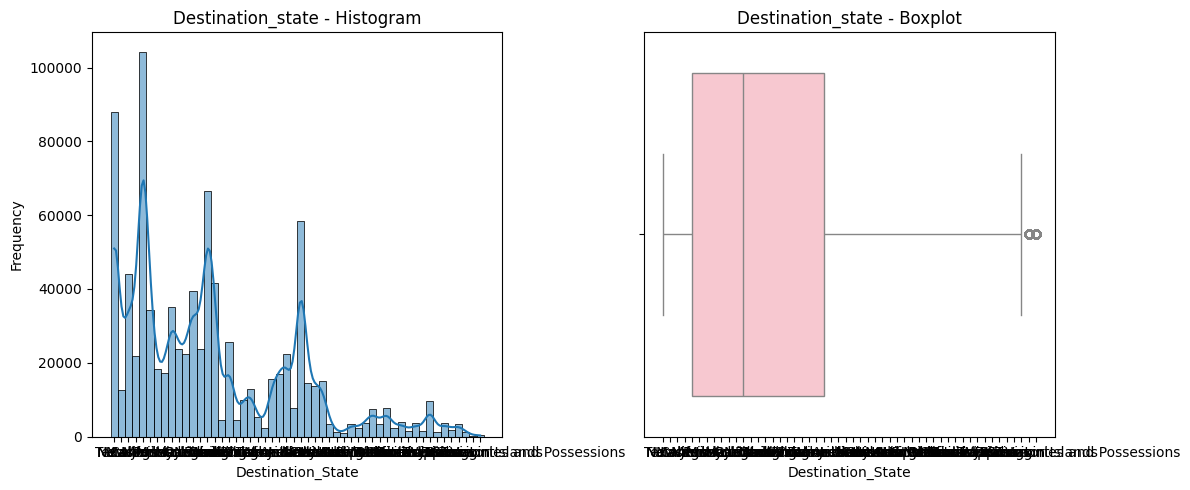

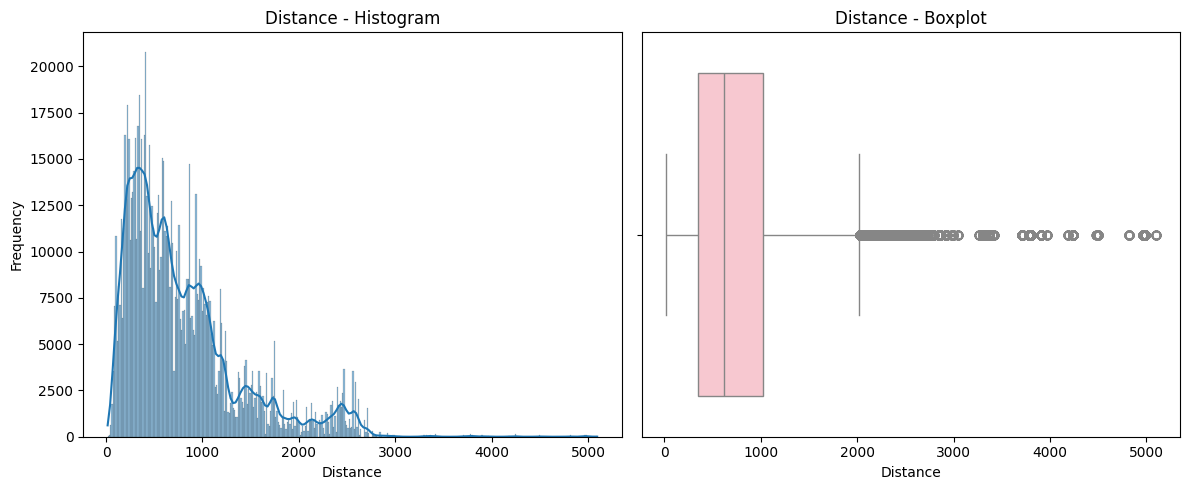

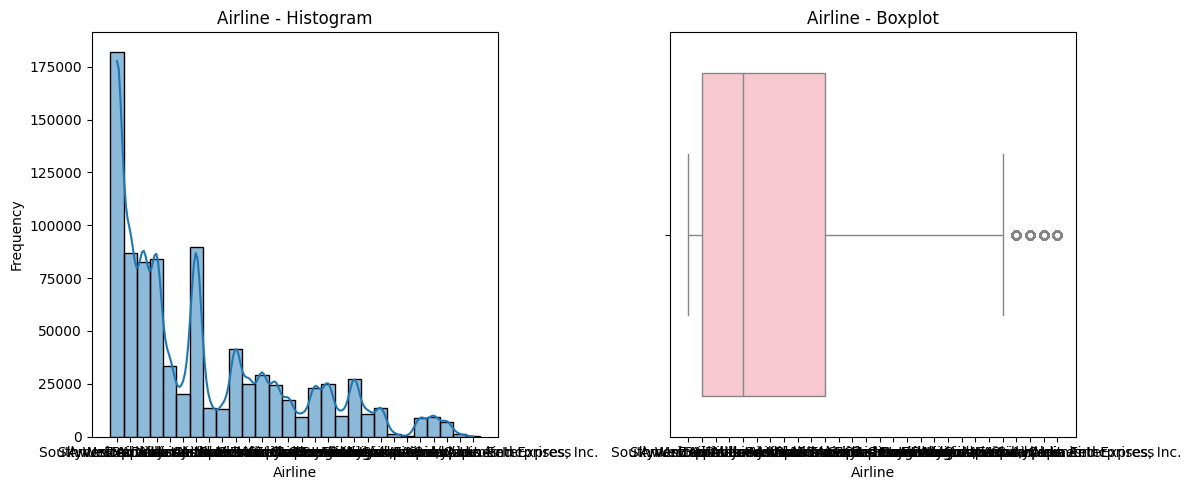

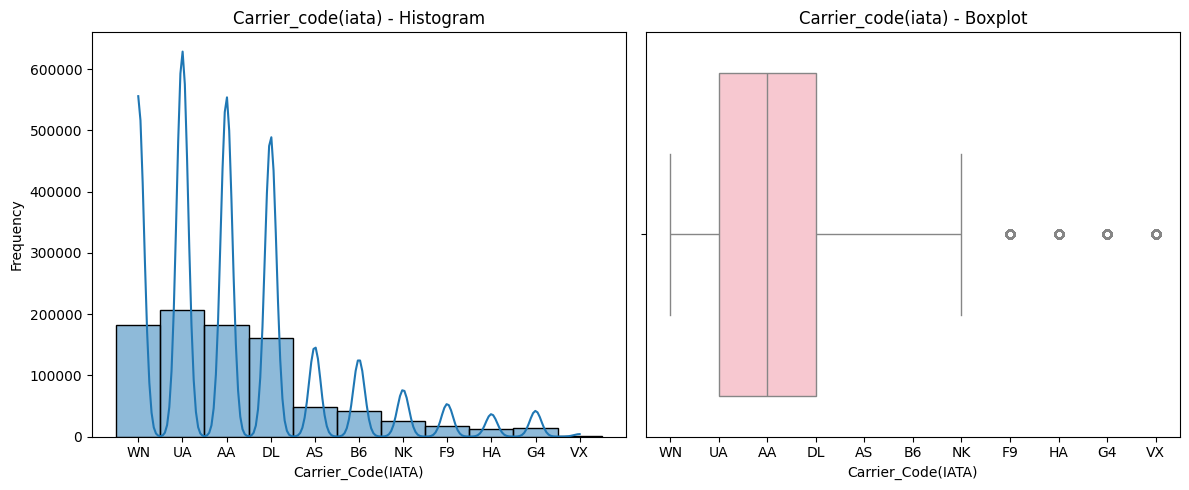

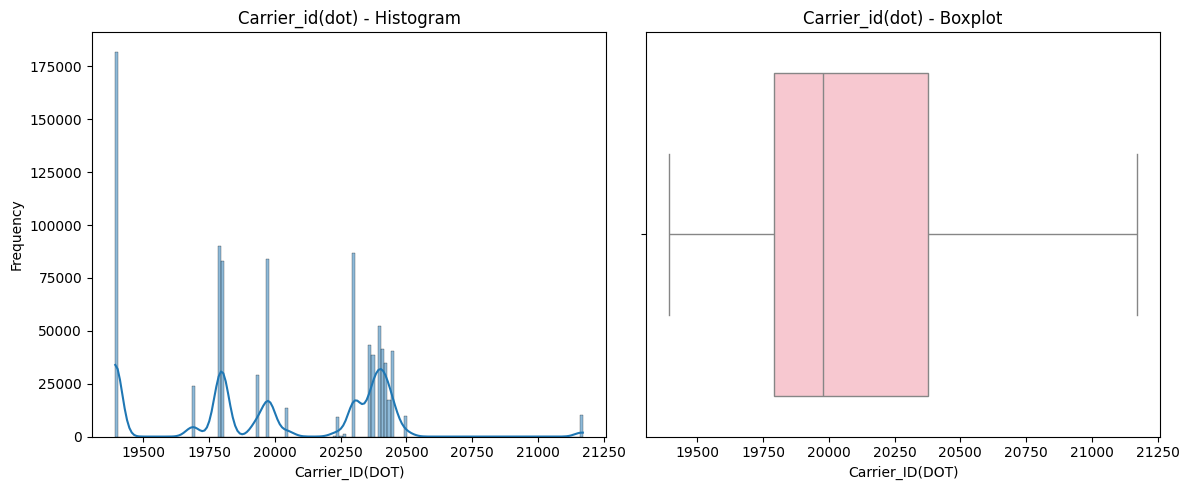

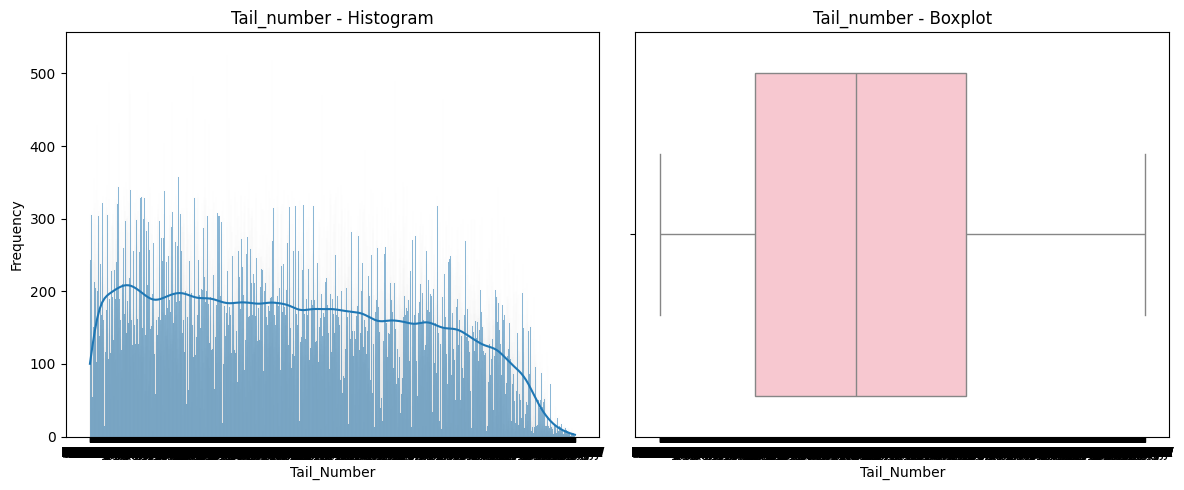

In [ ]:
# 시각화를 위한 변수 리스트
variables = ['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State', 'Destination_Airport',
       'Destination_Airport_ID', 'Destination_State', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number']

# 각 변수에 대해 히스토그램과 박스플롯을 그리기
for var in variables:
    plt.figure(figsize=(12, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(train[var], kde=True)
    plt.title(f'{var.capitalize()} - Histogram')
    plt.xlabel(var)
    plt.ylabel('Frequency')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[var], color='pink')
    plt.title(f'{var.capitalize()} - Boxplot')
    plt.xlabel(var)

    # 플롯 간격 조정
    plt.tight_layout()
    plt.show()

1. 주별 지연 비율 지도 시각화

In [ ]:
# 도착 시간과 출발 시간 간의 차이를 계산
train['Delay_Calculated'] = train['Estimated_Arrival_Time'] - train['Estimated_Departure_Time']

# 지연 여부를 이진 변수로 변환
train['Delay_Binary'] = train['Delay_Calculated'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

# 주별 지연 비율 계산
state_delays = train.groupby('Origin_State')['Delay_Binary'].mean().reset_index()
state_delays.columns = ['State', 'Avg_Delay']

exclude_states = {'U.S. Virgin Islands', 'U.S. Pacific Trust Territories and Possessions'}
state_delays = state_delays[~state_delays['State'].isin(exclude_states)]

In [ ]:
# 미국 주 지도 데이터 불러오기
us_states = gpd.read_file("https://github.com/PublicaMundi/MappingAPI/raw/master/data/geojson/us-states.json")

# 주별 지연 비율 데이터 병합
us_states_merged = us_states.merge(state_delays, left_on="name", right_on="State", how="left")

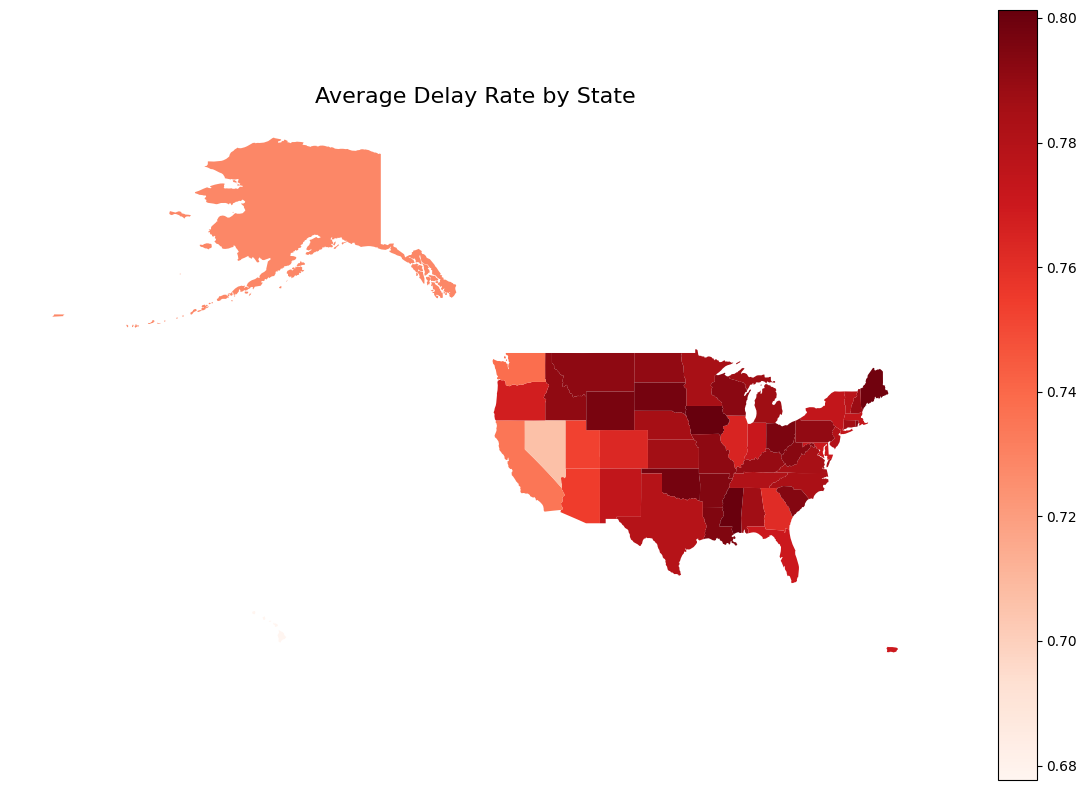

In [ ]:
# 지연 비율 시각화
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
us_states_merged.plot(column="Avg_Delay", cmap="Reds", legend=True, ax=ax)
plt.title("Average Delay Rate by State", fontsize=16)
plt.axis("off")
plt.show()

In [ ]:
# 출발 주와 도착 주 조합별 지연 비율 계산
state_pair_delays = train.groupby(['Origin_State', 'Destination_State'])['Delay_Binary'].mean().reset_index()
state_pair_delays.columns = ['Origin_State', 'Destination_State', 'Delay_Rate']

# 출발 주가 같은 경우 (Origin_State 기준 평균)
origin_state_delays = state_pair_delays.groupby('Origin_State')['Delay_Rate'].mean().reset_index()
origin_state_delays = origin_state_delays.sort_values(by='Delay_Rate', ascending=False).head(10)

# 도착 주가 같은 경우 (Destination_State 기준 평균)
destination_state_delays = state_pair_delays.groupby('Destination_State')['Delay_Rate'].mean().reset_index()
destination_state_delays = destination_state_delays.sort_values(by='Delay_Rate', ascending=False).head(10)

print("\n상위 10개 출발 주 기준:",origin_state_delays)
print("\n상위 10개 도착 주 기준:",destination_state_delays)


상위 10개 출발 주 기준:     Origin_State  Delay_Rate
22   Mississippi    0.849500
13          Iowa    0.825237
46       Vermont    0.823047
34      Oklahoma    0.811761
32  North Dakota    0.810947
3       Arkansas    0.807716
23      Missouri    0.800759
28    New Jersey    0.797760
33          Ohio    0.797039
51       Wyoming    0.796197

상위 10개 도착 주 기준:                                  Destination_State  Delay_Rate
51                                         Wyoming    0.869311
22                                     Mississippi    0.822399
3                                         Arkansas    0.816399
43  U.S. Pacific Trust Territories and Possessions    0.807184
9                                           Hawaii    0.804611
44                             U.S. Virgin Islands    0.800954
32                                    North Dakota    0.799726
34                                        Oklahoma    0.790003
17                                           Maine    0.787361
13               

2. 공항별 지연 빈도 막대그래프

In [ ]:
# 출발지 공항별 지연 빈도 계산
origin_delay_counts = train.groupby('Origin_Airport')['Delay_Binary'].sum().sort_values(ascending=False)

# 도착지 공항별 지연 빈도 계산
destination_delay_counts = train.groupby('Destination_Airport')['Delay_Binary'].sum().sort_values(ascending=False)

In [ ]:
print(origin_delay_counts)
print(destination_delay_counts)

Origin_Airport
ORD    39071
ATL    33564
DEN    30665
DFW    23838
LAX    22222
       ...  
ADK        9
AKN        7
DLG        5
BFM        4
PPG        2
Name: Delay_Binary, Length: 374, dtype: int64
Destination_Airport
ORD    38703
ATL    33822
DEN    30827
LAX    24327
DFW    23379
       ...  
DLG        7
GST        6
AKN        3
YNG        1
PSE        0
Name: Delay_Binary, Length: 375, dtype: int64


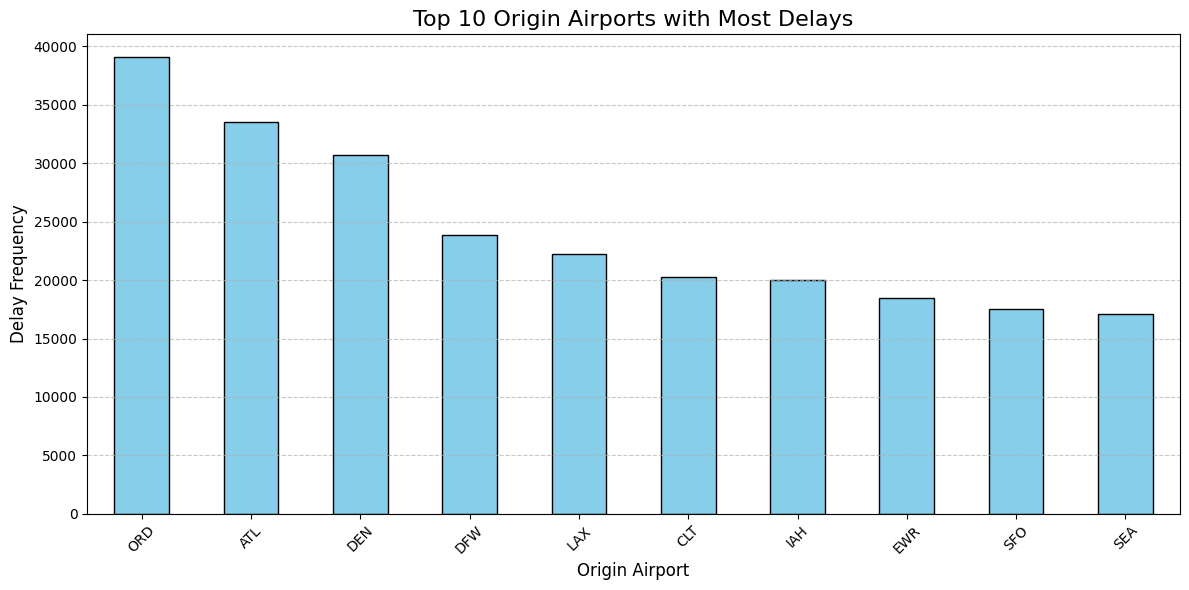

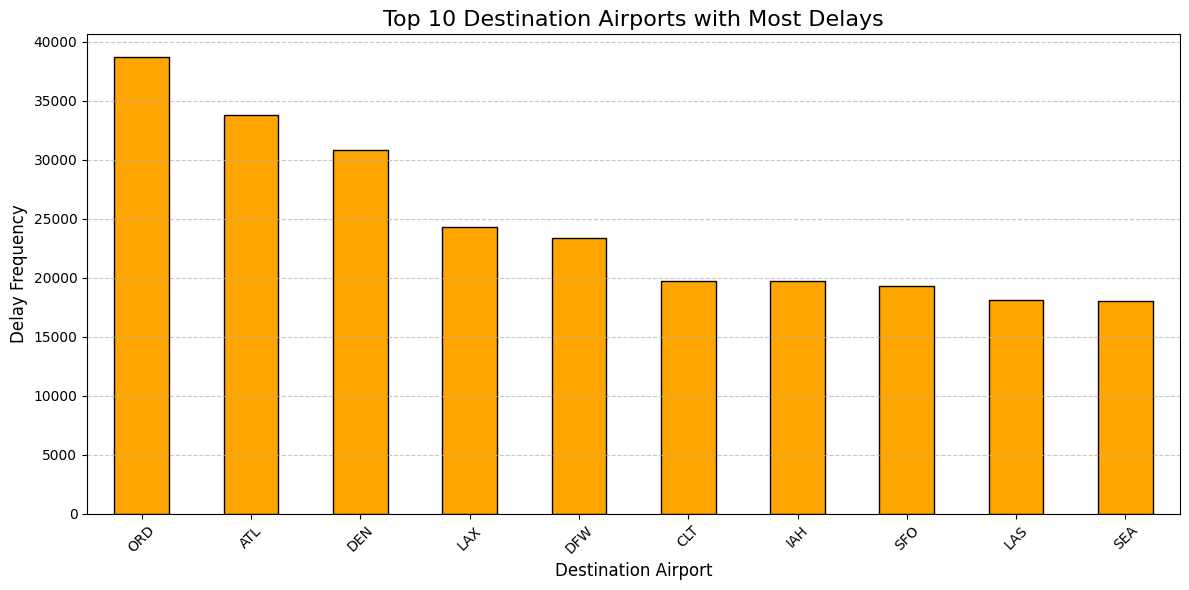

In [ ]:
# 출발지 공항별 지연 빈도 시각화
plt.figure(figsize=(12, 6))
origin_delay_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Origin Airports with Most Delays', fontsize=16)
plt.xlabel('Origin Airport', fontsize=12)
plt.ylabel('Delay Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 도착지 공항별 지연 빈도 시각화
plt.figure(figsize=(12, 6))
destination_delay_counts.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Destination Airports with Most Delays', fontsize=16)
plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Delay Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 출발지-도착지 조합별 비행 횟수와 지연된 비행 횟수 계산
delay_counts = train.groupby(['Origin_Airport', 'Destination_Airport'])['Delay_Binary'].sum()
total_counts = train.groupby(['Origin_Airport', 'Destination_Airport'])['Delay_Binary'].count()

# 지연 비율 계산
delay_ratio = (delay_counts / total_counts).unstack(fill_value=0)

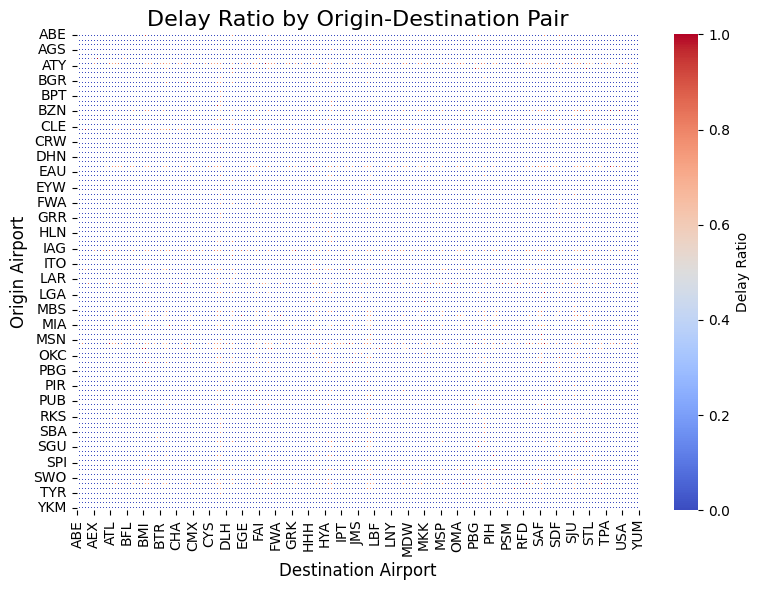

In [ ]:
# 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(
    delay_ratio,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Delay Ratio'},
    linewidths=0.5
)
plt.title('Delay Ratio by Origin-Destination Pair', fontsize=16)
plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Origin Airport', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

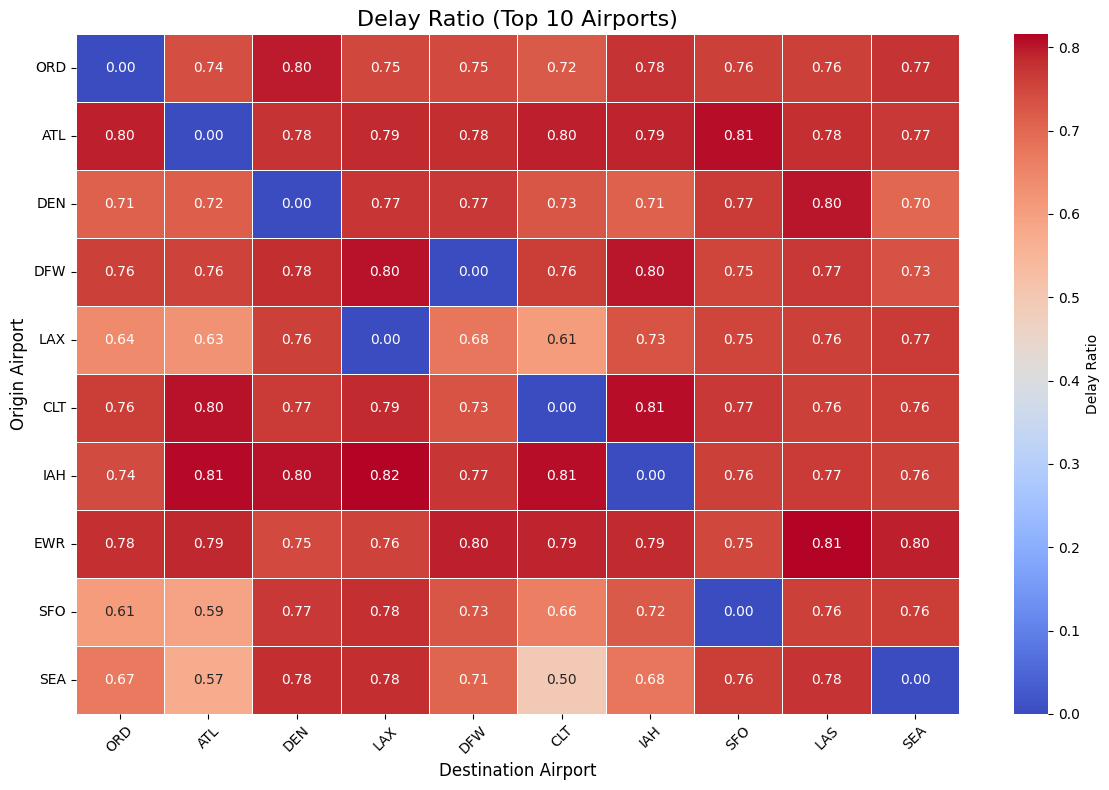

In [ ]:
# 주요 출발지 및 도착지 공항 필터링
top_origins = delay_counts.groupby('Origin_Airport').sum().sort_values(ascending=False).head(10).index
top_destinations = delay_counts.groupby('Destination_Airport').sum().sort_values(ascending=False).head(10).index

# 필터링된 히트맵 데이터
filtered_delay_ratio = delay_ratio.loc[top_origins, top_destinations]

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    filtered_delay_ratio,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Delay Ratio'},
    linewidths=0.5
)
plt.title('Delay Ratio (Top 10 Airports)', fontsize=16)
plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Origin Airport', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

---
---

####**GROUP3**

- Airline (항공사 이름)
- Carrier_Code(IATA) (항공사 코드)
- Distance (출발지와 도착지 간 거리)
- Tail_Number (항공기 고유 번호)

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

1. 항공사별 지연 비율 막대 그래프

In [ ]:
# Airline 칼럼 결측값 확인
train['Airline'].isnull()
train['Airline'].isnull().sum()

108920

In [ ]:
# 결측값 대치 확인
train['Airline'].isnull().sum()

In [ ]:
# 처리되지 않은 나머지 결측값은 제거
df = train[['Airline','Delay']]
df = train.dropna(subset=['Airline'])

In [ ]:
# Delay 칼럼 결측값 확인
train['Delay'].isnull().sum()
# 결측값 제거
df = train.dropna(subset=['Delay'])

In [ ]:
# 그래프 생성
import matplotlib.pyplot as plt
import seaborn as sns

# 'delay' 열을 'delay'와 'not delay'로 그룹화하여 지연 비율 계산
delay_ratio = df[df['Delay'] == 'Delayed'].groupby('Airline').size() / df.groupby('Airline').size()

# 막대 그래프 그리기
plt.figure(figsize=(15, 10))
sns.barplot(x=delay_ratio.index, y=delay_ratio.values, palette='viridis')
plt.title('Airline-wise Delay Ratio')
plt.xlabel('Airline')
plt.ylabel('Delay Ratio')
# X축 글자 회전 및 레이아웃 조정
plt.xticks(rotation=90)  # 글자 회전 각도 90도로 변경
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()


In [ ]:
delay_ratio.sort_values(ascending=False)

In [ ]:
print(delay_ratio.mean())

In [ ]:
delay_ratio[delay_ratio > delay_ratio.mean()]

-> Peninsula Airways Inc.가 연착 비율 0.321429로 가장 높은 비율을 차지하는 것을 확인 할 수 있으며, 전체 항공사의 평균 연착비율은 0.1808388254170648로 이 보다 높은 항공사는 12개임을 확인할 수 있음.

2. 항공사별 분기별 지연 패턴 히트맵

- Month와 Day_of_Month 칼럼 추가 사용

In [ ]:
# Month와 Day_of_Month 유형 변형
df3 = train[['Month', 'Day_of_Month', 'Delay', 'Tail_Number', 'Airline']]
df3['Date'] = pd.to_datetime(df3['Month'].astype(str) + '-' + df3['Day_of_Month'].astype(str), format='%m-%d')

# 변환된 'Date' 컬럼 확인
print(df3[['Month', 'Day_of_Month', 'Date']].head())

In [ ]:
df3 = df3.dropna(subset=['Airline', 'Delay', 'Month', 'Day_of_Month', 'Tail_Number'])

In [ ]:
# 'Delay' 열을 'delay'와 'not delay'로 구분하여 숫자형으로 변환 (0: not delay, 1: delay)
# df3['Delay_encoded'] = df3['Delay'].apply(lambda x: 1 if x == 'Delayed' else 0)

# 'Airline', 'Quarter' 기준으로 지연 패턴 집계
delay_pivot2 = df3.groupby(['Airline', 'Quarter'])['Delay_encoded'].sum().unstack(fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(delay_pivot2, cmap='YlGnBu', cbar_kws={'label': 'Delay Count'}, linewidths=0.5)

plt.title('Airline-wise Delay Pattern by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Airline')
plt.show()

In [ ]:
# Airline별 Tail_Number의 지연 패턴
plt.figure(figsize=(10, 8))
sns.countplot(x='Airline', hue='Delay', data=df)
plt.title('Delay Status by Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


3. 비행 거리에 따른 지연율

In [ ]:
# Month와 Day_of_Month 유형 변형
df4 = train[['Month', 'Day_of_Month', 'Delay', 'Tail_Number', 'Airline', 'Distance']]
df4['Date'] = pd.to_datetime(df4['Month'].astype(str) + '-' + df4['Day_of_Month'].astype(str), format='%m-%d')

df4 = df4.dropna(subset=['Airline', 'Delay', 'Month', 'Day_of_Month', 'Tail_Number', 'Distance'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 지연된 항공편만 선택 (Delay == 'Delayed')
df_delayed = df4[df4['Delay'] == 'Delayed']

# 지연된 항공편의 거리 분포 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(data=df_delayed, x='Distance', hue='Delay', kde=True, multiple='stack', palette='tab20', bins=30)
plt.title('Distance Distribution for Delayed and Not Delayed Flights')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 더 작은 구간으로 나누기 (500km 간격)
bins = list(range(0, 8500, 500))  # 0에서 8500까지 500 간격
labels = [f'{i}-{i+500} km' for i in range(0, 8000, 500)]  # 각 구간에 대한 라벨
# 구간화된 'Distance' 열 추가
df4['Distance_Range'] = pd.cut(df4['Distance'], bins=bins, labels=labels, right=False)

# 각 구간별 지연된 항공편 수와 전체 항공편 수 계산
delay_count_by_range = df4.groupby('Distance_Range')['Delay'].value_counts().unstack().fillna(0)

# 지연된 비율 계산 (지연된 항공편 수 / 전체 항공편 수)
delay_count_by_range['Delayed_Ratio'] = delay_count_by_range['Delayed'] / delay_count_by_range.sum(axis=1)

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.barplot(x=delay_count_by_range.index, y=delay_count_by_range['Delayed_Ratio'], palette='viridis')
plt.title('Delayed Flight Ratio by Distance Range')
plt.xlabel('Distance Range')
plt.ylabel('Delayed Flight Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-> 전체 비율을 통해 확인했을 때 거리가 2500~3000km일때 오히려 더 많은 지연이 나타나는 것을 확인할 수 있습니다.

4. 항공기별 정보

In [ ]:
# Tail_Number별 평균 거리
avg_distance_by_tail = df.groupby('Tail_Number')['Distance'].mean()

# 평균 거리가 긴 항공기 상위 10개
avg_distance_by_tail.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6), color='tab:purple')
plt.title('Top 10 Tail Numbers with the Highest Average Distance')
plt.ylabel('Average Distance (km)')
plt.show()


In [ ]:
# 지연된 항공기만 선택
df_delayed = df[df['Delay'] == 'Delayed']

# 항공기별로 지연된 항공편의 평균 거리 계산
tail_distance = df_delayed.groupby('Tail_Number')['Distance'].mean()

# 평균 거리가 긴 항공기 순으로 정렬하여 시각화
tail_distance_sorted = tail_distance.sort_values(ascending=False)
tail_distance_sorted.head(10).plot(kind='bar', figsize=(12, 6), color='tab:orange')
plt.title('Top 10 Aircrafts with the Longest Average Distance for Delayed Flights')
plt.ylabel('Average Distance')
plt.show()


---
---

####**GROUP4**

- Cancelled (취소 여부)
- Diverted (경유 여부)
- Carrier_ID(DOT) (항공사 고유 ID)
- Delay (지연 여부 - 타깃 변수)

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

칼럼별로 시각화

In [ ]:
#히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['Cancelled'], kde=True)
plt.title('Cancelled Histogram')
plt.xlabel('Cancelled')
plt.ylabel('Frequency')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=train['Cancelled'])
plt.title('Cancelled Boxplot')
plt.xlabel('Cancelled')

In [ ]:
(train['Cancelled'] != 0).sum()

In [ ]:
#히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['Diverted'], kde=True)
plt.title('Diverted Histogram')
plt.xlabel('Diverted')
plt.ylabel('Frequency')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=train['Diverted'])
plt.title('Diverted Boxplot')
plt.xlabel('Diverted')

In [ ]:
(train['Diverted'] != 0).sum()

Cancelled와 Diverted는 결측치가 없으나, 모든 값들이 0으로 동일하다. 따라서 지연 여부를 예측하는 것에 있어서 Cancelled와 Diverted 칼럼을 사용할 수 없다. 분석을 진행할 때에 이 두 칼럼은 제외시키도록 하자.

In [ ]:
#히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['Carrier_ID(DOT)'], kde=True)
plt.title('Carrier_ID Histogram')
plt.xlabel('Carrier_ID')
plt.ylabel('Frequency')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=train['Carrier_ID(DOT)'])
plt.title('Carrier_ID Boxplot')
plt.xlabel('Carrier_ID')

결측치가 존재한다. 이것은 Airline 칼럼이나 Carrier_Code(IATA) 칼럼을 참고하여 채운다.

또한, 항공사별 Frequency가 상당히 차이난다. 그래프의 왜곡된 정도를 개선해야할 수도 있으니 이에 주목해야한다. -> StandardScaler 사용

더 나아가, 자료조사 결과 항공사별로 노후화된 항공기가 많거나 고장난 항공기가 많을 경우, 지연될 가능성이 높다고 한다. 따라서 항공사별 지연 여부에 얼마나 영향을 주는지 더 면밀히 검토해봐야한다.

In [ ]:
# 결측치 채우기
train['Carrier_ID(DOT)'] = train['Carrier_ID(DOT)'].fillna(train.groupby(['Airline'])['Carrier_ID(DOT)'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))
test['Carrier_ID(DOT)'] = test['Carrier_ID(DOT)'].fillna(test.groupby(['Airline'])['Carrier_ID(DOT)'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [ ]:
train['Carrier_ID(DOT)'].isnull().sum()

결측치가 줄었다.

다음은 StandardScaler를 사용하는 것이다.

In [ ]:
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['Carrier_ID_Scaled'] = scaler.fit_transform(train[['Carrier_ID(DOT)']])
test['Carrier_ID_Scaled'] = scaler.transform(test[['Carrier_ID(DOT)']])

In [ ]:
#히스토그램
plt.subplot(1, 2, 1)
sns.histplot(train['Delay'], kde=True)
plt.title('Delay Histogram')
plt.xlabel('Delay')
plt.ylabel('Frequency')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=train['Delay'])
plt.title('Delay Boxplot')
plt.xlabel('Delay')

In [ ]:
train['Delay'].value_counts(dropna=False)

타깃 변수인 Delayed에는 결측치가 상당히 많이 존재하며, Not_Delayed와 Delayed의 개수에도 차이가 있다.

결측치를 처리하기 위해 두개의 방법을 사용할 수 있다.
- 결측치 삭제: 데이터의 양이 충분하기 때문에 결측치를 삭제하고 분석을 진행한다.
- 준지도 학습 활용: 레이블이 있는 데이터로 모델을 학습 시킨 후, 학습된 모델로 결측치를 채운다. 이렇게 채워진 데이터를 최종 학습 데이터로 사용한다.

또한, 데이터 불균형을 해결하기 위해서는 오버샘플링, 언더샘플링, 또는 클래스 가중치를 조정하는 방법을 사용하기로 한다.

먼저, 결측치를 삭제한 상태에서 Carrier_ID(DOT)와 Delayed의 관계를 시각화한다.


In [ ]:
# 결측치를 제거한 DataFrame 생성
cleaned_df = train.dropna(subset=['Delay', 'Carrier_ID(DOT)'])

In [ ]:
# Carrier_ID(DOT)와 Delay 상태별 개수 계산
carrier_delay_counts = cleaned_df.groupby(['Carrier_ID(DOT)', 'Delay']).size().unstack(fill_value=0)

In [ ]:
import matplotlib.pyplot as plt

# 그래프 그리기
carrier_delay_counts.plot(kind='bar', stacked=True, figsize=(15, 7), color=['skyblue', 'orange'])

# 그래프 꾸미기
plt.title("Carrier_ID(DOT) vs Delayed Status", fontsize=16)
plt.xlabel("Carrier_ID(DOT)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Delay", labels=["Not_Delayed", "Delayed"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
carrier_delay_ratio = carrier_delay_counts.div(carrier_delay_counts.sum(axis=1), axis=0)
carrier_delay_ratio.plot(kind='bar', stacked=True, figsize=(15, 7), color=['skyblue', 'orange'])

준지도 학습과 데이터 불균형 해결의 경우, 다른 칼럼들의 EDA와 피처 스케일링이 끝난 후에 진행해야하므로, 추후에 코딩한다.

준지도 학습 예시는 다음과 같다. 랜덤포레스트를 활용하였다.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ID 칼럼 제거
train = train.drop(columns=['ID'])

# 문자열 데이터를 라벨 인코딩
# 라벨 인코딩이 필요한 열만 선택
columns_to_encode = train.select_dtypes(include=['object']).columns
columns_to_encode = columns_to_encode[columns_to_encode != 'Delay']

# 각 열에 대해 LabelEncoder 적용
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders[col] = le  # 인코더를 저장 (필요 시 복호화용)

# 확인
train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 레이블 있는 데이터와 없는 데이터 분리
labeled_data = train[train['Delay'].notna()]
unlabeled_data = train[train['Delay'].isna()]

# 레이블 데이터 분리
X_labeled = labeled_data.drop(columns=['Delay'])
y_labeled = labeled_data['Delay']
X_unlabeled = unlabeled_data.drop(columns=['Delay'])

# 학습 데이터로 모델 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_labeled, y_labeled)

# 결측치 예측
y_unlabeled_pred = clf.predict(X_unlabeled)

# 예측된 레이블을 결측치 데이터에 채워넣기
unlabeled_data['Delay'] = y_unlabeled_pred
train_filled = pd.concat([labeled_data, unlabeled_data])

train_filled['Delay'].isnull().sum()

+) 결측치를 처리하기 위해 아래와 같은 방법을 사용할 수도 있다.

In [ ]:
# 도착 시간과 출발 시간 간의 차이를 계산
# train['Delay_Calculated'] = train['Estimated_Arrival_Time'] - train['Estimated_Departure_Time']

# 지연 여부를 이진 변수로 변환
# train['Delay_Binary'] = train['Delay_Calculated'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

이제 데이터 불균형을 해결해보자. 예를 들어, 오버샘플링으로 다음과 같이 해결할 수 있다.

In [ ]:
from imblearn.over_sampling import SMOTE

# 결측치가 있는 행 삭제
X_labeled_clean = X_labeled.dropna()
y_labeled_clean = y_labeled[X_labeled_clean.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_labeled_clean, y_labeled_clean)

## 전처리

#### **Origin_Airport, Destination_Airport**

In [ ]:
print(train['Origin_Airport'].unique())  # 고유한 값 확인
print(train['Origin_Airport'].isnull().sum())  # NaN 개수 확인

['OKC' 'ORD' 'CLT' 'LAX' 'SFO' 'EWR' 'BWI' 'LIT' 'DCA' 'PHL' 'CLE' 'MAF'
 'PHX' 'PIT' 'CRW' 'BDL' 'OAK' 'BUF' 'TPA' 'STS' 'SAN' 'SEA' 'SLC' 'LAS'
 'HLN' 'IAH' 'ABQ' 'COS' 'PDX' 'IAD' 'ATL' 'ELP' 'MCI' 'MEM' 'DAL' 'RDU'
 'HOU' 'ALB' 'KOA' 'RIC' 'OAJ' 'JFK' 'ANC' 'RST' 'LGA' 'ISP' 'BGR' 'OMA'
 'TWF' 'ROC' 'CMH' 'DFW' 'OGG' 'CAE' 'PBI' 'ORF' 'SGF' 'DAB' 'DEN' 'HRL'
 'MGM' 'BIL' 'MSP' 'MDW' 'RNO' 'BIS' 'ONT' 'SJC' 'MBS' 'RKS' 'PNS' 'MFE'
 'IND' 'MSY' 'BNA' 'DVL' 'PAE' 'DTW' 'SMF' 'FLL' 'GRR' 'BUR' 'SYR' 'DBQ'
 'AUS' 'BOS' 'LEX' 'CVG' 'LNK' 'MKE' 'TUS' 'STL' 'BTR' 'TYS' 'LGB' 'BQK'
 'AGS' 'FAT' 'CHS' 'MCO' 'FWA' 'SFB' 'MFR' 'RSW' 'PWM' 'SCE' 'CAK' 'TYR'
 'BHM' 'SNA' 'CPR' 'AMA' 'ADQ' 'HSV' 'SAT' 'GRB' 'PIA' 'MSO' 'GRI' 'RDM'
 'FCA' 'PBG' 'GEG' 'ABE' 'HNL' 'LFT' 'MIA' 'DAY' 'EVV' 'ERI' 'GSP' 'SDF'
 'SJU' 'SHV' 'LAW' 'BZN' 'GTR' 'FAI' 'LIH' 'PIB' 'GNV' 'CID' 'SCC' 'YAK'
 'BTV' 'DRO' 'HHH' 'SBP' 'IDA' 'ISN' 'SIT' 'DLH' 'DSM' 'VPS' 'ECP' 'YUM'
 'HPN' 'MLB' 'MDT' 'AVL' 'MHT' 'ILM' 'PSP' 'BMI' 'C

In [ ]:
print(train['Destination_Airport'].unique())  # 고유한 값 확인
print(train['Destination_Airport'].isnull().sum())  # NaN 개수 확인

['HOU' 'SLC' 'LGA' 'EWR' 'ACV' 'DCA' 'BOS' 'MCI' 'CLT' 'IAH' 'PIT' 'DTW'
 'DEN' 'LAS' 'JAX' 'ORD' 'ATL' 'PHX' 'IAD' 'BHM' 'SEA' 'RNO' 'ANC' 'JFK'
 'LEX' 'FLL' 'SNA' 'PDX' 'TUL' 'SMF' 'LAX' 'SAT' 'STL' 'SFO' 'PVD' 'SDF'
 'DFW' 'LIT' 'BNA' 'MSP' 'MCO' 'PHL' 'ROC' 'BUR' 'IND' 'HYA' 'DAY' 'BWI'
 'DAL' 'CHA' 'ORF' 'CMH' 'MDW' 'AUS' 'KOA' 'SBP' 'BDL' 'OAK' 'MHT' 'CLL'
 'ONT' 'SAN' 'CRW' 'MIA' 'FNT' 'JMS' 'TPA' 'SJC' 'CVG' 'ABQ' 'EVV' 'OGG'
 'BUF' 'GSP' 'HNL' 'BIL' 'CLE' 'LWB' 'MKE' 'RSW' 'RDU' 'GEG' 'PGV' 'BGR'
 'UIN' 'OMA' 'HRL' 'CRP' 'XNA' 'MLI' 'DUT' 'OKC' 'LGB' 'GTR' 'DRT' 'ROA'
 'ILM' 'SBA' 'FAT' 'ERI' 'GRI' 'AMA' 'TYS' 'PSP' 'SFB' 'GTF' 'LIH' 'BIS'
 'MSY' 'GRR' 'ABI' 'PBI' 'MYR' 'SCE' 'ECP' 'CAE' 'LBB' 'ALB' 'SAV' 'PIE'
 'RIC' 'PAE' 'COS' 'ASE' 'MEI' 'JAN' 'SJU' 'MDT' 'TOL' 'GSO' 'FSD' 'JNU'
 'ALW' 'EYW' 'SHV' 'MEM' 'SGF' 'BMI' 'BFL' 'JAC' 'PWM' 'PIA' 'BOI' 'ITO'
 'ITH' 'SHD' 'CAK' 'LAR' 'BZN' 'CHS' 'MAF' 'STS' 'AVP' 'MRY' 'EUG' 'ICT'
 'LFT' 'EKO' 'BTR' 'BLI' 'EAU' 'WRG' 'PNS' 'CHO' 'P



---



#### **Origin_State, Destination_State**

In [ ]:
print(train['Origin_State'].unique())  # 고유한 값 확인
print(train['Origin_State'].isnull().sum())  # NaN 개수 확인

['Oklahoma' 'Illinois' 'North Carolina' 'California' nan 'New Jersey'
 'Arkansas' 'Virginia' 'Pennsylvania' 'Ohio' 'Texas' 'Arizona'
 'Connecticut' 'Maryland' 'New York' 'Florida' 'Washington' 'Utah'
 'New Mexico' 'Colorado' 'Oregon' 'Georgia' 'Missouri' 'Tennessee'
 'Alaska' 'Minnesota' 'Maine' 'Nebraska' 'Hawaii' 'Nevada' 'Alabama'
 'Montana' 'North Dakota' 'Michigan' 'Wyoming' 'South Carolina' 'Indiana'
 'Louisiana' 'Massachusetts' 'Kentucky' 'Wisconsin' 'Puerto Rico'
 'West Virginia' 'Mississippi' 'Iowa' 'Vermont' 'Idaho' 'New Hampshire'
 'U.S. Virgin Islands' 'Kansas' 'South Dakota' 'Rhode Island'
 'U.S. Pacific Trust Territories and Possessions']
109015


In [ ]:
print(train['Destination_State'].unique())  # 고유한 값 확인
print(train['Destination_State'].isnull().sum())  # NaN 개수 확인

['Texas' 'Utah' 'New York' 'New Jersey' 'California' 'Virginia'
 'Massachusetts' 'Missouri' 'North Carolina' 'Pennsylvania' 'Michigan'
 'Colorado' 'Nevada' 'Florida' nan 'Georgia' 'Alabama' 'Washington'
 'Alaska' 'Kentucky' 'Oregon' 'Oklahoma' 'Rhode Island' 'Tennessee'
 'Minnesota' 'Arizona' 'Indiana' 'Illinois' 'Ohio' 'Maryland' 'Hawaii'
 'Connecticut' 'New Hampshire' 'West Virginia' 'Arkansas' 'North Dakota'
 'New Mexico' 'South Carolina' 'Montana' 'Wisconsin' 'Maine' 'Nebraska'
 'Mississippi' 'Puerto Rico' 'South Dakota' 'Louisiana' 'Wyoming' 'Idaho'
 'Kansas' 'Iowa' 'Vermont'
 'U.S. Pacific Trust Territories and Possessions' 'U.S. Virgin Islands']
109079


In [ ]:
# Origin_State가 NaN인 공항 코드
missing_origin_states = train[train['Origin_State'].isnull()]['Origin_Airport'].unique()

# Destination_State가 NaN인 공항 코드
missing_destination_states = train[train['Destination_State'].isnull()]['Destination_Airport'].unique()

print("Missing Origin States:", missing_origin_states)
print("Missing Destination States:", missing_destination_states)

Missing Origin States: ['EWR' 'BWI' 'CRW' 'STS' 'LAS' 'HLN' 'IAD' 'ELP' 'ALB' 'KOA' 'TWF' 'DFW'
 'IAH' 'CAE' 'PBI' 'SGF' 'RNO' 'MSP' 'ONT' 'SEA' 'PNS' 'BNA' 'DVL' 'PAE'
 'LGA' 'LAX' 'DBQ' 'SFO' 'SJC' 'PHX' 'CVG' 'OMA' 'MKE' 'ORD' 'BTR' 'SAN'
 'MCO' 'OAK' 'RDM' 'LNK' 'CLE' 'FLL' 'DTW' 'TUS' 'PDX' 'PHL' 'LIT' 'DEN'
 'CLT' 'CMH' 'SNA' 'AMA' 'ATL' 'MIA' 'SIT' 'FWA' 'TPA' 'DSM' 'STL' 'ILM'
 'ROC' 'ABE' 'ANC' 'BOS' 'CHA' 'TYS' 'MCI' 'TRI' 'AUS' 'RSW' 'SMF' 'SLC'
 'JAX' 'GEG' 'MFE' 'BIS' 'PUB' 'MSN' 'IND' 'CID' 'HSV' 'SJU' 'PVD' 'ECP'
 'FAY' 'COS' 'MSY' 'AVL' 'BDL' 'MEM' 'BUR' 'TLH' 'HOU' 'BZN' 'JFK' 'RDU'
 'HNL' 'ELM' 'MAF' 'VPS' 'MBS' 'BLI' 'XNA' 'FNT' 'LEX' 'ICT' 'MLI' 'MYR'
 'JAC' 'MEI' 'MHT' 'SDF' 'DCA' 'SHV' 'GRR' 'LGB' 'DAL' 'SYR' 'HRL' 'SAT'
 'LNY' 'MFR' 'SBA' 'BHM' 'PGD' 'ABQ' 'SBY' 'TUL' 'ITH' 'LBB' 'OKC' 'PIT'
 'SWF' 'BUF' 'AZA' 'SRQ' 'ADK' 'LIH' 'SAV' 'SUX' 'AVP' 'MDT' 'GSP' 'MDW'
 'GGG' 'STT' 'CAK' 'ORH' 'AGS' 'EWN' 'FCA' 'LWB' 'GUC' 'BOI' 'ISN' 'ORF'
 'JAN' 'MSO' 'IAG' 'ACY' 'ST

In [ ]:
# 수동 매핑 테이블
airport_to_state = {
    'OKC': 'Oklahoma',
    'ORD': 'Illinois',
    'CLT': 'North Carolina',
    'LAX': 'California',
    'SFO': 'California',
    'EWR': 'New Jersey',
    'BWI': 'Maryland',
    'LIT': 'Arkansas',
    'DCA': 'District of Columbia',
    'PHL': 'Pennsylvania',
    'CLE': 'Ohio',
    'MAF': 'Texas',
    'PHX': 'Arizona',
    'PIT': 'Pennsylvania',
    'CRW': 'West Virginia',
    'BDL': 'Connecticut',
    'OAK': 'California',
    'BUF': 'New York',
    'TPA': 'Florida',
    'STS': 'California',
    'SAN': 'California',
    'SEA': 'Washington',
    'SLC': 'Utah',
    'LAS': 'Nevada',
    'HLN': 'Montana',
    'IAH': 'Texas',
    'ABQ': 'New Mexico',
    'COS': 'Colorado',
    'PDX': 'Oregon',
    'IAD': 'Virginia',
    'ATL': 'Georgia',
    'ELP': 'Texas',
    'MCI': 'Missouri',
    'MEM': 'Tennessee',
    'DAL': 'Texas',
    'RDU': 'North Carolina',
    'HOU': 'Texas',
    'ALB': 'New York',
    'KOA': 'Hawaii',
    'RIC': 'Virginia',
    'OAJ': 'North Carolina',
    'JFK': 'New York',
    'ANC': 'Alaska',
    'RST': 'Minnesota',
    'LGA': 'New York',
    'ISP': 'New York',
    'BGR': 'Maine',
    'OMA': 'Nebraska',
    'TWF': 'Idaho',
    'ROC': 'New York',
    'CMH': 'Ohio',
    'DFW': 'Texas',
    'OGG': 'Hawaii',
    'CAE': 'South Carolina',
    'PBI': 'Florida',
    'ORF': 'Virginia',
    'SGF': 'Missouri',
    'DAB': 'Florida',
    'DEN': 'Colorado',
    'HRL': 'Texas',
    'MGM': 'Alabama',
    'BIL': 'Montana',
    'MSP': 'Minnesota',
    'MDW': 'Illinois',
    'RNO': 'Nevada',
    'BIS': 'North Dakota',
    'ONT': 'California',
    'SJC': 'California',
    'MBS': 'Michigan',
    'RKS': 'Wyoming',
    'PNS': 'Florida',
    'MFE': 'Texas',
    'IND': 'Indiana',
    'MSY': 'Louisiana',
    'BNA': 'Tennessee',
    'DVL': 'North Dakota',
    'PAE': 'Washington',
    'DTW': 'Michigan',
    'SMF': 'California',
    'FLL': 'Florida',
    'GRR': 'Michigan',
    'BUR': 'California',
    'SYR': 'New York',
    'DBQ': 'Iowa',
    'AUS': 'Texas',
    'BOS': 'Massachusetts',
    'LEX': 'Kentucky',
    'CVG': 'Ohio',
    'LNK': 'Nebraska',
    'MKE': 'Wisconsin',
    'TUS': 'Arizona',
    'STL': 'Missouri',
    'BTR': 'Louisiana',
    'TYS': 'Tennessee',
    'LGB': 'California',
    'BQK': 'Georgia',
    'AGS': 'Georgia',
    'FAT': 'California',
    'CHS': 'South Carolina',
    'MCO': 'Florida',
    'FWA': 'Indiana',
    'SFB': 'Florida',
    'MFR': 'Oregon',
    'RSW': 'Florida',
    'PWM': 'Maine',
    'SCE': 'South Carolina',
    'CAK': 'Ohio',
    'TYR': 'Texas',
    'BHM': 'Alabama',
    'SNA': 'California',
    'CPR': 'Wyoming',
    'AMA': 'Texas',
    'ADQ': 'Alaska',
    'HSV': 'Alabama',
    'SAT': 'Texas',
    'GRB': 'Wisconsin',
    'PIA': 'Illinois',
    'MSO': 'Montana',
    'GRI': 'Nebraska',
    'RDM': 'Oregon',
    'FCA': 'Montana',
    'PBG': 'New York',
    'GEG': 'Washington',
    'ABE': 'Pennsylvania',
    'HNL': 'Hawaii',
    'LFT': 'Louisiana',
    'MIA': 'Florida',
    'DAY': 'Ohio',
    'EVV': 'Indiana',
    'ERI': 'Pennsylvania',
    'GSP': 'South Carolina',
    'SDF': 'Kentucky',
    'SJU': 'Puerto Rico',
    'SHV': 'Louisiana',
    'LAW': 'Oklahoma',
    'BZN': 'Montana',
    'GTR': 'Mississippi',
    'FAI': 'Alaska',
    'LIH': 'Hawaii',
    'PIB': 'Mississippi',
    'GNV': 'Florida',
    'CID': 'Iowa',
    'SCC': 'Alaska',
    'YAK': 'Alaska',
    'BTV': 'Vermont',
    'DRO': 'Colorado',
    'HHH': 'South Carolina',
    'SBP': 'California',
    'IDA': 'Idaho',
    'ISN': 'North Dakota',
    'SIT': 'Alaska',
    'DLH': 'Minnesota',
    'DSM': 'Iowa',
    'VPS': 'Florida',
    'ECP': 'Florida',
    'YUM': 'Arizona',
    'HPN': 'New York',
    'MLB': 'Florida',
    'MDT': 'Pennsylvania',
    'AVL': 'North Carolina',
    'MHT': 'New Hampshire',
    'ILM': 'North Carolina',
    'PSP': 'California',
    'BMI': 'Illinois',
    'COD': 'Wyoming',
    'XNA': 'Arkansas',
    'JAX': 'Florida',
    'CHA': 'North Carolina',
    'FAR': 'North Dakota',
    'SAV': 'Georgia',
    'GSO': 'North Carolina',
    'TRI': 'Tennessee',
    'GJT': 'Colorado',
    'TUL': 'Oklahoma',
    'STT': 'U.S. Virgin Islands',
    'KTN': 'Alaska',
    'GCK': 'Kansas',
    'RAP': 'South Dakota',
    'CGI': 'Missouri',
    'PUB': 'Colorado',
    'ITO': 'Hawaii',
    'MOB': 'Alabama',
    'ROA': 'Virginia',
    'ICT': 'Kansas',
    'GUC': 'Colorado',
    'MSN': 'Wisconsin',
    'MYR': 'South Carolina',
    'ELM': 'New York',
    'ITH': 'New York',
    'AVP': 'Pennsylvania',
    'SBN': 'Indiana',
    'CWA': 'Wisconsin',
    'CRP': 'Texas',
    'JAN': 'Mississippi',
    'EAU': 'Wisconsin',
    'MTJ': 'Colorado',
    'PVD': 'Rhode Island',
    'MRY': 'California',
    'PSC': 'Washington',
    'FAY': 'North Carolina',
    'PHF': 'Virginia',
    'CHO': 'Virginia',
    'AZO': 'Michigan',
    'LRD': 'Texas',
    'BOI': 'Idaho',
    'WRG': 'Alaska',
    'GTF': 'Montana',
    'BTM': 'Montana',
    'FSM': 'Arkansas',
    'SRQ': 'Florida',
    'MLU': 'Louisiana',
    'PIH': 'Idaho',
    'YKM': 'Washington',
    'PGD': 'Florida',
    'BPT': 'Texas',
    'CMX': 'Michigan',
    'ACT': 'Texas',
    'RHI': 'Wisconsin',
    'ACV': 'California',
    'TLH': 'Florida',
    'SPS': 'Texas',
    'JAC': 'Wyoming',
    'GGG': 'Texas',
    'GRK': 'Texas',
    'LBB': 'Texas',
    'EAT': 'Washington',
    'SBA': 'California',
    'PUW': 'Washington',
    'SCK': 'California',
    'JNU': 'Alaska',
    'PGV': 'North Carolina',
    'BLI': 'Washington',
    'SAF': 'New Mexico',
    'AZA': 'Arizona',
    'FLG': 'Arizona',
    'FNT': 'Michigan',
    'DRT': 'Texas',
    'CMI': 'Illinois',
    'CDV': 'Alaska',
    'UIN': 'Illinois',
    'MLI': 'Illinois',
    'OTH': 'Oregon',
    'SGU': 'Utah',
    'MEI': 'Mississippi',
    'DHN': 'Alabama',
    'BLV': 'Illinois',
    'EUG': 'Oregon',
    'BRO': 'Texas',
    'TOL': 'Ohio',
    'JLN': 'Missouri',
    'OME': 'Alaska',
    'MKK': 'Hawaii',
    'FSD': 'South Dakota',
    'LNY': 'New York',
    'TVC': 'Michigan',
    'VLD': 'Georgia',
    'SPI': 'Illinois',
    'USA': 'Mississippi',
    'HTS': 'West Virginia',
    'BRW': 'Alaska',
    'AEX': 'Louisiana',
    'HYS': 'Kansas',
    'SBY': 'Maryland',
    'LAN': 'Michigan',
    'GCC': 'Wyoming',
    'CDC': 'California',
    'PAH': 'Kentucky',
    'SWF': 'New York',
    'EGE': 'Colorado',
    'MQT': 'Michigan',
    'ALW': 'Washington',
    'ADK': 'New York',
    'MOT': 'North Dakota',
    'ABR': 'South Dakota',
    'JHM': 'Hawaii',
    'PIE': 'Florida',
    'SUX': 'Iowa',
    'ACY': 'New Jersey',
    'LYH': 'Virginia',
    'GPT': 'Mississippi',
    'BFF': 'Nebraska',
    'ORH': 'Massachusetts',
    'CKB': 'West Virginia',
    'ATW': 'Wisconsin',
    'ABY': 'Georgia',
    'HOB': 'New Mexico',
    'HDN': 'Colorado',
    'PIR': 'South Dakota',
    'LCH': 'Louisiana',
    'FLO': 'South Carolina',
    'IMT': 'Michigan',
    'CNY': 'Arizona',
    'BQN': 'Puerto Rico',
    'IPT': 'Pennsylvania',
    'ROW': 'New Mexico',
    'EWN': 'North Carolina',
    'LWB': 'West Virginia',
    'LBL': 'Kansas',
    'RDD': 'California',
    'EYW': 'Florida',
    'LBF': 'Nebraska',
    'BRD': 'Minnesota',
    'SJT': 'Texas',
    'CLL': 'Texas',
    'SPN': 'Northern Mariana Islands',
    'SUN': 'Idaho',
    'TXK': 'Texas',
    'ABI': 'Texas',
    'BFL': 'California',
    'IAG': 'New York',
    'ASE': 'Colorado',
    'LCK': 'Ohio',
    'BET': 'Alaska',
    'PSM': 'New Hampshire',
    'CSG': 'Georgia',
    'STX': 'U.S. Virgin Islands',
    'LSE': 'Wisconsin',
    'DUT': 'Alaska',
    'PLN': 'Michigan',
    'ATY': 'South Dakota',
    'OTZ': 'Alaska',
    'BJI': 'Minnesota',
    'HVN': 'Connecticut',
    'HGR': 'Maryland',
    'COU': 'Missouri',
    'APN': 'Michigan',
    'BGM': 'New York',
    'MMH': 'California',
    'PPG': 'West Virginia',
    'WYS': 'Montana',
    'TTN': 'New Jersey',
    'MHK': 'Kansas',
    'ACK': 'Massachusetts',
    'ALO': 'Iowa',
    'GUM': 'Guam',
    'EKO': 'Nevada',
    'JMS': 'North Dakota',
    'DIK': 'North Dakota',
    'HIB': 'Minnesota',
    'MVY': 'Massachusetts',
    'ART': 'New York',
    'SHD': 'Virginia',
    'LWS': 'Idaho',
    'LAR': 'Wyoming',
    'RFD': 'Illinois',
    'SLN': 'Kansas',
    'ROP': 'Hawaii',
    'GFK': 'Minnesota',
    'OWB': 'Kentucky',
    'PRC': 'Arizona',
    'OGS': 'New York',
    'CIU': 'Michigan',
    'PSE': 'Puerto Rico',
    'MKG': 'Michigan',
    'PSG': 'Alaska',
    'LBE': 'Pennsylvania',
    'ESC': 'Michigan',
    'SWO': 'Oklahoma',
    'PQI': 'Maine',
    'VEL': 'Arizona',
    'PVU': 'Utah',
    'INL': 'Minnesota',
    'STC': 'Minnesota',
    'BFM': 'Alabama',
    'HYA': 'Massachusetts',
    'CYS': 'Wyoming',
    'SMX': 'California',
    'XWA': 'Montana',
    'BKG': 'Missouri',
    'DLG': 'Alaska',
    'EAR': 'Texas',
    'OGD': 'Utah',
    'AKN': 'Alaska',
    'GST': 'Guam',
    'YNG': 'Ohio'
  }

In [ ]:
# 공항 코드를 주(State)로 변환
def map_airport_to_state(airport):
    return airport_to_state.get(airport, None)

# Origin_State와 Destination_State에 매핑 적용
train['Origin_State'] = train['Origin_Airport'].apply(map_airport_to_state)
train['Destination_State'] = train['Destination_Airport'].apply(map_airport_to_state)

In [ ]:
test['Origin_State'] = test['Origin_Airport'].apply(map_airport_to_state)
test['Destination_State'] = test['Destination_Airport'].apply(map_airport_to_state)

In [ ]:
print(train['Origin_State'].isnull().sum())
print(train['Destination_State'].isnull().sum())

0
0


- 결측값이 모두 없어짐



---



#### **Estimated_Departure_Time, Estimated_Arrival_Time**

In [ ]:
print(train['Estimated_Departure_Time'].isnull().sum())
print(train['Estimated_Arrival_Time'].isnull().sum())

109019
109040


In [ ]:
print(train['Tail_Number'].nunique())

6430


In [ ]:
# 출발 공항 코드, 도착 공항 코드, Tail_Number로 그룹화
grouped = train.groupby(['Origin_Airport', 'Destination_Airport', 'Tail_Number'])

# 그룹별 Estimated_Departure_Time과 Estimated_Arrival_Time의 평균 계산
# NaN은 제외하고 계산
departure_mean = grouped['Estimated_Departure_Time'].transform('mean')
arrival_mean = grouped['Estimated_Arrival_Time'].transform('mean')

# 결측값 채우기
train['Estimated_Departure_Time'] = train['Estimated_Departure_Time'].fillna(departure_mean)
train['Estimated_Arrival_Time'] = train['Estimated_Arrival_Time'].fillna(arrival_mean)

In [ ]:
print(train['Estimated_Departure_Time'].isnull().sum())
print(train['Estimated_Arrival_Time'].isnull().sum())

51496
51599


In [ ]:
test['Estimated_Departure_Time'] = test['Estimated_Departure_Time'].fillna(departure_mean)
test['Estimated_Arrival_Time'] = test['Estimated_Arrival_Time'].fillna(arrival_mean)

In [ ]:
# 1단계: Tail_Number를 포함한 그룹별 평균으로 결측값 채우기
grouped_full = train.groupby(['Origin_Airport', 'Destination_Airport', 'Tail_Number'])
departure_mean_full = grouped_full['Estimated_Departure_Time'].transform('mean')
arrival_mean_full = grouped_full['Estimated_Arrival_Time'].transform('mean')

train['Estimated_Departure_Time'] = train['Estimated_Departure_Time'].fillna(departure_mean_full)
train['Estimated_Arrival_Time'] = train['Estimated_Arrival_Time'].fillna(arrival_mean_full)

# 2단계: Tail_Number 제외, 출발/도착 공항 코드만으로 그룹화하여 결측값 채우기
grouped_partial = train.groupby(['Origin_Airport', 'Destination_Airport'])
departure_mean_partial = grouped_partial['Estimated_Departure_Time'].transform('mean')
arrival_mean_partial = grouped_partial['Estimated_Arrival_Time'].transform('mean')

train['Estimated_Departure_Time'] = train['Estimated_Departure_Time'].fillna(departure_mean_partial)
train['Estimated_Arrival_Time'] = train['Estimated_Arrival_Time'].fillna(arrival_mean_partial)

# 남은 결측값 확인
departure_nan_count = train['Estimated_Departure_Time'].isnull().sum()
arrival_nan_count = train['Estimated_Arrival_Time'].isnull().sum()

print(f"남은 Estimated_Departure_Time 결측값: {departure_nan_count}")
print(f"남은 Estimated_Arrival_Time 결측값: {arrival_nan_count}")

남은 Estimated_Departure_Time 결측값: 20
남은 Estimated_Arrival_Time 결측값: 14


In [ ]:
test['Estimated_Departure_Time'] = test['Estimated_Departure_Time'].fillna(departure_mean_full)
test['Estimated_Arrival_Time'] = test['Estimated_Arrival_Time'].fillna(arrival_mean_full)

test['Estimated_Departure_Time'] = test['Estimated_Departure_Time'].fillna(departure_mean_partial)
test['Estimated_Arrival_Time'] = test['Estimated_Arrival_Time'].fillna(arrival_mean_partial)

In [ ]:
# 평균값으로 대체
# train['Estimated_Departure_Time'].fillna(train['Estimated_Departure_Time'].mean(), inplace=True)
# train['Estimated_Arrival_Time'].fillna(train['Estimated_Arrival_Time'].mean(), inplace=True)

- 결측값 있는 열 개수가 적어 삭제했는데 후에 평균값으로 대체한 경우와 모델링 성능 비교해서 삭제 여부 결정해도 됨

In [ ]:
# Estimated_Departure_Time 또는 Estimated_Arrival_Time에 결측값이 있는 행 삭제
train_cleaned = train.dropna(subset=['Estimated_Departure_Time', 'Estimated_Arrival_Time'], inplace=True)

In [ ]:
# Estimated_Departure_Time 또는 Estimated_Arrival_Time에 결측값이 있는 행 삭제
test_cleaned = test.dropna(subset=['Estimated_Departure_Time', 'Estimated_Arrival_Time'], inplace=True)

In [ ]:
print(train['Estimated_Departure_Time'].isnull().sum())
print(train['Estimated_Arrival_Time'].isnull().sum())

0
0


- Estimated_Departure_Time, Estimated_Arrival_Time의 모든 결측값이 제거되었음.

In [ ]:
# 시(hour)와 분(minute) 추출 함수 정의
def extract_hour_minute(time):
    time = int(time)  # 소수를 정수로 변환
    hour = time // 100  # 시(hour)
    minute = time % 100  # 분(minute)
    return hour, minute

In [ ]:
# 시(hour)와 분(minute) 분리 및 새로운 열 추가
train[['Departure_Hour', 'Departure_Minute']] = train.iloc[:, 3].apply(
    lambda x: pd.Series(extract_hour_minute(x))
)
train[['Arrival_Hour', 'Arrival_Minute']] = train.iloc[:, 4].apply(
    lambda x: pd.Series(extract_hour_minute(x))
)

In [ ]:
# test 열도 동일하게 진행
test[['Departure_Hour', 'Departure_Minute']] = test.iloc[:, 3].apply(
    lambda x: pd.Series(extract_hour_minute(x))
)
test[['Arrival_Hour', 'Arrival_Minute']] = test.iloc[:, 4].apply(
    lambda x: pd.Series(extract_hour_minute(x))
)

In [ ]:
# Arrival_Hour가 24를 넘는 행 또는 Arrival_Minute가 60을 넘는 행 필터링
train[(train['Arrival_Minute'] > 60) & (train['Departure_Minute'] > 60)]

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
435,TRAIN_000435,9,12,1399.148148,1490.566667,0,0,OAK,13796,California,...,1836.0,Spirit Air Lines,NK,20416.0,N618NK,NaN,13,99,14,90
1563,TRAIN_001563,6,30,1390.000000,1680.500000,0,0,IAD,12264,Virginia,...,630.0,"Commutair Aka Champlain Enterprises, Inc.",UA,20445.0,N17169,NaN,13,90,16,80
1941,TRAIN_001941,5,11,1565.000000,1663.087719,0,0,RSW,14635,Florida,...,1183.0,Southwest Airlines Co.,WN,NaN,N208WN,NaN,15,65,16,63
1981,TRAIN_001981,8,7,1474.670588,1681.662791,0,0,DEN,11292,Colorado,...,931.0,SkyWest Airlines Inc.,UA,20304.0,N967SW,Delayed,14,74,16,81
2977,TRAIN_002977,12,3,1693.333333,1671.500000,0,0,ATL,10397,Georgia,...,594.0,Delta Air Lines Inc.,DL,NaN,N309US,NaN,16,93,16,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996902,TRAIN_996902,4,5,1585.298913,1188.111702,0,0,MDW,13232,Illinois,...,271.0,NaN,WN,19393.0,N797MX,NaN,15,85,11,88
997844,TRAIN_997844,5,7,1367.397714,1491.120996,0,0,EWR,11618,New Jersey,...,711.0,NaN,NaN,19393.0,N942WN,NaN,13,67,14,91
998661,TRAIN_998661,2,1,1296.016484,1466.978022,0,0,BRO,10747,Texas,...,482.0,SkyWest Airlines Inc.,AA,20304.0,N756SK,Not_Delayed,12,96,14,66
999467,TRAIN_999467,1,17,1587.272727,1896.090909,0,0,AZA,10466,Arizona,...,978.0,Allegiant Air,G4,20368.0,259NV,NaN,15,87,18,96


In [ ]:
# Departure_Minute가 60 이상인 경우 처리
train['Departure_Hour'] += train['Departure_Minute'] // 60  # 몫을 Departure_Hour에 더함
train['Departure_Minute'] = train['Departure_Minute'] % 60  # 나머지를 Departure_Minute에 저장

# Arrival_Minute가 60 이상인 경우 처리
train['Arrival_Hour'] += train['Arrival_Minute'] // 60  # 몫을 Arrival_Hour에 더함
train['Arrival_Minute'] = train['Arrival_Minute'] % 60  # 나머지를 Arrival_Minute에 저장

In [ ]:
test['Departure_Hour'] += test['Departure_Minute'] // 60  # 몫을 Departure_Hour에 더함
test['Departure_Minute'] = test['Departure_Minute'] % 60  # 나머지를 Departure_Minute에 저장

# Arrival_Minute가 60 이상인 경우 처리
test['Arrival_Hour'] += test['Arrival_Minute'] // 60  # 몫을 Arrival_Hour에 더함
test['Arrival_Minute'] = test['Arrival_Minute'] % 60  # 나머지를 Arrival_Minute에 저장

In [ ]:
# 총 분(minute) 계산
train['Departure_Total_Minutes'] = train['Departure_Hour'] * 60 + train['Departure_Minute']
train['Arrival_Total_Minutes'] = train['Arrival_Hour'] * 60 + train['Arrival_Minute']

# 비행 시간(Flight_Duration) 계산
train['Flight_Duration'] = train['Arrival_Total_Minutes'] - train['Departure_Total_Minutes']

In [ ]:
test['Departure_Total_Minutes'] = test['Departure_Hour'] * 60 + test['Departure_Minute']
test['Arrival_Total_Minutes'] = test['Arrival_Hour'] * 60 + test['Arrival_Minute']

# 비행 시간(Flight_Duration) 계산
test['Flight_Duration'] = test['Arrival_Total_Minutes'] - test['Departure_Total_Minutes']

In [ ]:
train.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Carrier_ID(DOT),Tail_Number,Delay,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Departure_Total_Minutes,Arrival_Total_Minutes,Flight_Duration
0,TRAIN_000000,4,15,1292.513228,1451.456044,0,0,OKC,13851,Oklahoma,...,19393.0,N7858A,NaN,13,32,14,51,812,891,79
1,TRAIN_000001,8,15,740.000000,1024.000000,0,0,ORD,13930,Illinois,...,20304.0,N125SY,NaN,7,40,10,24,460,624,164
2,TRAIN_000002,9,6,1610.000000,1805.000000,0,0,CLT,11057,North Carolina,...,19805.0,N103US,NaN,16,10,18,5,970,1085,115
3,TRAIN_000003,7,10,905.000000,1735.000000,0,0,LAX,12892,California,...,NaN,N595UA,NaN,9,5,17,35,545,1055,510
4,TRAIN_000004,1,11,900.000000,1019.000000,0,0,SFO,14771,California,...,20304.0,N161SY,NaN,9,0,10,19,540,619,79




---



#### **Airline, Carrier_Code(IATA), Carrier_ID(DOT)**

In [ ]:
print(train['Airline'].nunique())

28


In [ ]:
print(train['Airline'].unique())

['Southwest Airlines Co.' 'SkyWest Airlines Inc.' 'American Airlines Inc.'
 'United Air Lines Inc.' 'Republic Airlines' nan
 'ExpressJet Airlines Inc.' 'Delta Air Lines Inc.'
 'Air Wisconsin Airlines Corp' 'Horizon Air' 'JetBlue Airways'
 'Spirit Air Lines' 'Alaska Airlines Inc.' 'Mesa Airlines Inc.'
 'Frontier Airlines Inc.' 'Trans States Airlines' 'Endeavor Air Inc.'
 'Comair Inc.' 'Capital Cargo International' 'Envoy Air'
 'Hawaiian Airlines Inc.' 'Allegiant Air' 'Virgin America'
 'Peninsula Airways Inc.' 'Compass Airlines'
 'GoJet Airlines, LLC d/b/a United Express'
 'Commutair Aka Champlain Enterprises, Inc.' 'Empire Airlines Inc.'
 'Cape Air']


In [ ]:
# Carrier_Code가 NaN인 공항 코드
missing_carrier_code = train[train['Carrier_Code(IATA)'].isnull()]['Airline'].unique()

# Destination_State가 NaN인 공항 코드
missing_carrier_id = train[train['Carrier_ID(DOT)'].isnull()]['Airline'].unique()

print("Missing Carrier Code:", missing_carrier_code)
print("Missing Carrier ID:", missing_carrier_id)

Missing Carrier Code: ['SkyWest Airlines Inc.' nan 'American Airlines Inc.'
 'Southwest Airlines Co.' 'Air Wisconsin Airlines Corp' 'Envoy Air'
 'Republic Airlines' 'Delta Air Lines Inc.' 'Comair Inc.'
 'Alaska Airlines Inc.' 'United Air Lines Inc.' 'Mesa Airlines Inc.'
 'ExpressJet Airlines Inc.' 'Compass Airlines' 'Frontier Airlines Inc.'
 'JetBlue Airways' 'Capital Cargo International' 'Trans States Airlines'
 'GoJet Airlines, LLC d/b/a United Express' 'Horizon Air'
 'Endeavor Air Inc.' 'Allegiant Air' 'Spirit Air Lines'
 'Peninsula Airways Inc.' 'Hawaiian Airlines Inc.'
 'Commutair Aka Champlain Enterprises, Inc.' 'Virgin America'
 'Empire Airlines Inc.' 'Cape Air']
Missing Carrier ID: ['United Air Lines Inc.' 'Republic Airlines' 'Southwest Airlines Co.'
 'SkyWest Airlines Inc.' 'Endeavor Air Inc.' 'Comair Inc.'
 'Mesa Airlines Inc.' 'Delta Air Lines Inc.' 'JetBlue Airways'
 'American Airlines Inc.' 'Frontier Airlines Inc.' 'Envoy Air' nan
 'Air Wisconsin Airlines Corp' 'Horizon Ai

In [ ]:
# Airline이 'Republic Airlines'인 행 필터링
republic_airlines = train[train['Airline'] == 'Republic Airlines']
expressjet_airlines = train[train['Airline'] == 'ExpressJet Airlines Inc.']
mesa_airlines = train[train['Airline'] == 'Mesa Airlines Inc.']
compass_airlines = train[train['Airline'] == 'Compass Airlines']
gojet_airlines = train[train['Airline'] == 'GoJet Airlines, LLC d/b/a United Express']

In [ ]:
(republic_airlines['Carrier_Code(IATA)']).value_counts()

,count
Carrier_Code(IATA),
UA,13499
AA,11169
DL,5298


In [ ]:
(expressjet_airlines['Carrier_Code(IATA)']).value_counts()

,count
Carrier_Code(IATA),
UA,16399
DL,815
AA,730


In [ ]:
(mesa_airlines['Carrier_Code(IATA)']).value_counts()

,count
Carrier_Code(IATA),
UA,12858
AA,9057


In [ ]:
(compass_airlines['Carrier_Code(IATA)']).value_counts()

,count
Carrier_Code(IATA),
DL,5049
AA,2819


In [ ]:
(gojet_airlines['Carrier_Code(IATA)']).value_counts()

,count
Carrier_Code(IATA),
UA,4633
DL,3909


- 위의 항공사(Airline)들의 경우 Carrier_Code(IATA)에 다중 값들이 존재하여 최빈값을 확인하고 최빈값으로 매핑 테이블을 채움

**Airline (키값)** -> Carrier_Code(IATA), Carrier_ID(DOT)

In [ ]:
# 수동 매핑 테이블
airline_to_carrier = {
    'Southwest Airlines Co.': ('WN', '19393.0'),
    'SkyWest Airlines Inc.': ('UA', '20304.0'),
    'American Airlines Inc.': ('AA', '19805.0'),
    'United Air Lines Inc.': ('UA', '19977.0'),
    'Delta Air Lines Inc.': ('DL', '19790.0'),
    'Air Wisconsin Airlines Corp': ('UA', '20046.0'),
    'Horizon Air': ('AS', '19687.0'),
    'JetBlue Airways': ('B6', '20409.0'),
    'Spirit Air Lines': ('NK', '20416.0'),
    'Alaska Airlines Inc.': ('AS', '19930.0'),
    'Frontier Airlines Inc.': ('F9', '20436.0'),
    'Trans States Airlines': ('UA', '20237.0'),
    'Endeavor Air Inc.': ('DL', '20363.0'),
    'Comair Inc.': ('AA', '20397.0'),
    'Capital Cargo International': ('AA', '20427.0'),
    'Envoy Air': ('AA', '20398.0'),
    'Hawaiian Airlines Inc.': ('HA', '19690.0'),
    'Allegiant Air': ('G4', '20368.0'),
    'Virgin America': ('VX', '21171.0'),
    'Peninsula Airways Inc.': ('AS', '20225.0'),
    'Commutair Aka Champlain Enterprises, Inc.': ('UA', '20445.0'),
    'Empire Airlines Inc.': ('HA', '20263.0'),
    'Cape Air': ('UA', '20253.0'),
    'Republic Airlines': ('UA', '20452.0'),
    'ExpressJet Airlines Inc.': ('UA', '20366.0'),
    'Mesa Airlines Inc.': ('UA', '20378.0'),
    'Compass Airlines': ('DL', '21167.0'),
    'GoJet Airlines, LLC d/b/a United Express': ('UA', '20500.0')
    }

In [ ]:
# NaN 값 채우기 함수
def fill_nan_with_airline_mapping(df, mapping, airline_column, target_columns):
    for target_column, index in zip(target_columns, range(len(target_columns))):
        # NaN인 경우에만 매핑된 값으로 채움
        df.loc[df[target_column].isnull(), target_column] = df.loc[
            df[target_column].isnull(), airline_column
        ].apply(lambda x: mapping.get(x, (None, None))[index])

# Airline 열을 기준으로 NaN 값 채우기
fill_nan_with_airline_mapping(
    train,
    mapping=airline_to_carrier,
    airline_column='Airline',
    target_columns=['Carrier_Code(IATA)', 'Carrier_ID(DOT)']
)

In [ ]:
# Airline 열을 기준으로 NaN 값 채우기
fill_nan_with_airline_mapping(
    test,
    mapping=airline_to_carrier,
    airline_column='Airline',
    target_columns=['Carrier_Code(IATA)', 'Carrier_ID(DOT)']
)

In [ ]:
# NaN 개수 확인
print(train[['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']].isnull().sum())

Airline               108917
Carrier_Code(IATA)     11863
Carrier_ID(DOT)        11883
dtype: int64


- Carrier_Code(IATA), Carrier_ID(DOT)의 NaN 값 각각 약 90000개씩 감소

**Carrier_ID(DOT) (키값)** -> Carrier_Code(IATA), Airline

In [ ]:
# 수동 매핑 테이블
carrier_id_to_info = {
    '19393.0': ('WN', 'Southwest Airlines Co.'),
    '20304.0': ('UA', 'SkyWest Airlines Inc.'),
    '19805.0': ('AA', 'American Airlines Inc.'),
    '19977.0': ('UA', 'United Air Lines Inc.'),
    '19790.0': ('DL', 'Delta Air Lines Inc.'),
    '20046.0': ('UA', 'Air Wisconsin Airlines Corp'),
    '19687.0': ('AS', 'Horizon Air'),
    '20409.0': ('B6', 'JetBlue Airways'),
    '20416.0': ('NK', 'Spirit Air Lines'),
    '19930.0': ('AS', 'Alaska Airlines Inc.'),
    '20436.0': ('F9', 'Frontier Airlines Inc.'),
    '20237.0': ('UA', 'Trans States Airlines'),
    '20363.0': ('DL', 'Endeavor Air Inc.'),
    '20397.0': ('AA', 'Comair Inc.'),
    '20427.0': ('AA', 'Capital Cargo International'),
    '20398.0': ('AA', 'Envoy Air'),
    '19690.0': ('HA', 'Hawaiian Airlines Inc.'),
    '20368.0': ('G4', 'Allegiant Air'),
    '21171.0': ('VX', 'Virgin America'),
    '20225.0': ('AS', 'Peninsula Airways Inc.'),
    '20445.0': ('UA', 'Commutair Aka Champlain Enterprises, Inc.'),
    '20263.0': ('HA', 'Empire Airlines Inc.'),
    '20253.0': ('UA', 'Cape Air'),
    '20452.0': ('UA', 'Republic Airlines'),
    '20366.0': ('UA', 'ExpressJet Airlines Inc.'),
    '20378.0': ('UA', 'Mesa Airlines Inc.'),
    '21167.0': ('DL', 'Compass Airlines'),
    '20500.0': ('UA', 'GoJet Airlines, LLC d/b/a United Express'),
}

In [ ]:
# NaN 값 채우기 함수
def fill_nan_with_carrier_mapping(df, mapping, carrier_column, target_columns):
    for target_column, index in zip(target_columns, range(len(target_columns))):
        # NaN인 경우에만 매핑된 값으로 채움
        df.loc[df[target_column].isnull(), target_column] = df.loc[
            df[target_column].isnull(), carrier_column
        ].apply(lambda x: mapping.get(str(x), (None, None))[index])

# Carrier_ID(DOT) 열을 기준으로 NaN 값 채우기
fill_nan_with_carrier_mapping(
    train,
    mapping=carrier_id_to_info,
    carrier_column='Carrier_ID(DOT)',
    target_columns=['Carrier_Code(IATA)', 'Airline']
)

In [ ]:
fill_nan_with_carrier_mapping(
    test,
    mapping=carrier_id_to_info,
    carrier_column='Carrier_ID(DOT)',
    target_columns=['Carrier_Code(IATA)', 'Airline']
)

In [ ]:
print(train[['Carrier_ID(DOT)', 'Carrier_Code(IATA)', 'Airline']].head())

  Carrier_ID(DOT) Carrier_Code(IATA)                 Airline
0         19393.0                 WN  Southwest Airlines Co.
1         20304.0                 UA   SkyWest Airlines Inc.
2         19805.0                 AA  American Airlines Inc.
3         19977.0                 UA   United Air Lines Inc.
4         20304.0                 UA   SkyWest Airlines Inc.


In [ ]:
# NaN 개수 확인
print(train[['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']].isnull().sum())

Airline               11883
Carrier_Code(IATA)     1273
Carrier_ID(DOT)       11883
dtype: int64


- 세 변수 모두 상당수의 NaN 값을 줄였음 (대략 110000개 -> 11883개, 1273개)
- Carrier_Code(IATA)의 경우 항공사가 달라도 이름이 같은 경우가 있어 키값으로 설정하지 않았음

In [ ]:
# 파생 변수 생성
train = pd.DataFrame(train)

# 요일 계산을 위한 테이블 생성 (월과 일의 조합)
# 기준 요일을 설정 (1월 1일 = 월요일로 가정)
reference_day = 0  # 월요일(0), 화요일(1), ..., 일요일(6)

# 월별 일수를 정의 (평년 기준)
month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# 월과 일을 기준으로 요일 계산 함수
def calculate_day_of_week(month, day):
    # 입력값 검증
    if month < 1 or month > 12 or day < 1 or day > month_days[month - 1]:
        return None  # 유효하지 않은 날짜

    # 해당 월 이전까지의 총 일수 계산
    total_days = sum(month_days[:month - 1]) + day - 1  # -1은 월 시작일(1일) 보정
    return (reference_day + total_days) % 7  # 7로 나눈 나머지가 요일

# 요일 계산 (0=월요일, ..., 6=일요일)
train['Day_of_Week'] = train.apply(lambda row: calculate_day_of_week(row['Month'], row['Day_of_Month']), axis=1)
# 결과 확인
print(train[['ID', 'Month', 'Day_of_Month', 'Day_of_Week']])

                  ID  Month  Day_of_Month  Day_of_Week
0       TRAIN_000000      4            15            6
1       TRAIN_000001      8            15            2
2       TRAIN_000002      9             6            3
3       TRAIN_000003      7            10            1
4       TRAIN_000004      1            11            3
...              ...    ...           ...          ...
999995  TRAIN_999995      9            18            1
999996  TRAIN_999996      5            30            2
999997  TRAIN_999997      6            28            3
999998  TRAIN_999998      9            27            3
999999  TRAIN_999999      3            26            0

[999968 rows x 4 columns]


In [ ]:
test['Day_of_Week'] = test.apply(lambda row: calculate_day_of_week(row['Month'], row['Day_of_Month']), axis=1)

In [ ]:
import pandas as pd

# Airline, Carrier_Code(IATA), Carrier_ID(DOT)의 결측값을 채우기 위한 함수
def fill_missing_info(row, mode_values):
    # Airline 결측값 채우기
    if pd.isna(row['Airline']):
        row['Airline'] = mode_values['Airline']

    # Carrier_Code(IATA) 결측값 채우기
    if pd.isna(row['Carrier_Code(IATA)']):
        row['Carrier_Code(IATA)'] = mode_values['Carrier_Code(IATA)']

    # Carrier_ID(DOT) 결측값 채우기
    if pd.isna(row['Carrier_ID(DOT)']):
        row['Carrier_ID(DOT)'] = mode_values['Carrier_ID(DOT)']

    return row


# 그룹별로 최빈값 계산
mode_values_by_group = train.groupby(['Day_of_Week', 'Flight_Duration'])[
    ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']
].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# 원본 데이터프레임에 최빈값 매핑
for _, group in mode_values_by_group.iterrows():
    condition = (train['Day_of_Week'] == group['Day_of_Week']) & (train['Flight_Duration'] == group['Flight_Duration'])
    train.loc[condition, ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']] = train.loc[condition].apply(
        lambda row: fill_missing_info(row, group), axis=1
    )

# 결과 확인
print(train[['Day_of_Week', 'Flight_Duration', 'Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']])

        Day_of_Week  Flight_Duration                 Airline  \
0                 6               79  Southwest Airlines Co.   
1                 2              164   SkyWest Airlines Inc.   
2                 3              115  American Airlines Inc.   
3                 1              510   United Air Lines Inc.   
4                 3               79   SkyWest Airlines Inc.   
...             ...              ...                     ...   
999995            1              187   United Air Lines Inc.   
999996            2               68   SkyWest Airlines Inc.   
999997            3              340  Southwest Airlines Co.   
999998            3              131    Delta Air Lines Inc.   
999999            0              176    Delta Air Lines Inc.   

       Carrier_Code(IATA) Carrier_ID(DOT)  
0                      WN         19393.0  
1                      UA         20304.0  
2                      AA         19805.0  
3                      UA         19977.0  
4          

In [ ]:
# 2. test 데이터에서 조건에 맞는 행에 대해 최빈값 매핑
for _, group in mode_values_by_group.iterrows():
    # train 기준으로 최빈값이 있는 그룹에 대해 test 데이터를 업데이트
    condition = (test['Day_of_Week'] == group['Day_of_Week']) & (test['Flight_Duration'] == group['Flight_Duration'])
    test.loc[condition, ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']] = test.loc[condition].apply(
        lambda row: fill_missing_info(row, group), axis=1
    )

In [ ]:
# 기존 인덱스를 삭제하고 초기화
train = train.reset_index(drop=True)

# groupby 및 결측값 채우기 적용
for _, group in mode_values_by_group.iterrows():
    condition = (train['Day_of_Week'] == group['Day_of_Week']) & (train['Flight_Duration'] == group['Flight_Duration'])
    train.loc[condition, ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']] = train.loc[condition].apply(
        lambda row: fill_missing_info(row, group), axis=1
    )

# 결과 확인
print(train[['Day_of_Week', 'Flight_Duration', 'Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']])

        Day_of_Week  Flight_Duration                 Airline  \
0                 6               79  Southwest Airlines Co.   
1                 2              164   SkyWest Airlines Inc.   
2                 3              115  American Airlines Inc.   
3                 1              510   United Air Lines Inc.   
4                 3               79   SkyWest Airlines Inc.   
...             ...              ...                     ...   
999963            1              187   United Air Lines Inc.   
999964            2               68   SkyWest Airlines Inc.   
999965            3              340  Southwest Airlines Co.   
999966            3              131    Delta Air Lines Inc.   
999967            0              176    Delta Air Lines Inc.   

       Carrier_Code(IATA) Carrier_ID(DOT)  
0                      WN         19393.0  
1                      UA         20304.0  
2                      AA         19805.0  
3                      UA         19977.0  
4          

In [ ]:
# 기존 인덱스를 삭제하고 초기화
test = test.reset_index(drop=True)

# groupby 및 결측값 채우기 적용
for _, group in mode_values_by_group.iterrows():
    # train 기준으로 최빈값이 있는 그룹에 대해 test 데이터를 업데이트
    condition = (test['Day_of_Week'] == group['Day_of_Week']) & (test['Flight_Duration'] == group['Flight_Duration'])
    test.loc[condition, ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']] = test.loc[condition].apply(
        lambda row: fill_missing_info(row, group), axis=1
    )

In [ ]:
# Airline, Carrier_Code(IATA), Carrier_ID(DOT)의 결측값을 채우기 위한 함수
def fill_missing_info(row, mode_values):
    # Airline 결측값 채우기
    if pd.isna(row['Airline']):
        row['Airline'] = mode_values['Airline']

    # Carrier_Code(IATA) 결측값 채우기
    if pd.isna(row['Carrier_Code(IATA)']):
        row['Carrier_Code(IATA)'] = mode_values['Carrier_Code(IATA)']

    # Carrier_ID(DOT) 결측값 채우기
    if pd.isna(row['Carrier_ID(DOT)']):
        row['Carrier_ID(DOT)'] = mode_values['Carrier_ID(DOT)']

    return row


# 그룹별로 최빈값 계산
mode_values_by_group = train.groupby(['Day_of_Week', 'Flight_Duration'])[
    ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']
].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index()

# 원본 데이터프레임에 최빈값 매핑
for _, group in mode_values_by_group.iterrows():
    condition = (train['Day_of_Week'] == group['Day_of_Week']) & (train['Flight_Duration'] == group['Flight_Duration'])
    train.loc[condition, ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']] = train.loc[condition].apply(
        lambda row: fill_missing_info(row, group), axis=1
    )

# 결과 확인
print(train[['Day_of_Week', 'Flight_Duration', 'Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']])

        Day_of_Week  Flight_Duration                 Airline  \
0                 6               79  Southwest Airlines Co.   
1                 2              164   SkyWest Airlines Inc.   
2                 3              115  American Airlines Inc.   
3                 1              510   United Air Lines Inc.   
4                 3               79   SkyWest Airlines Inc.   
...             ...              ...                     ...   
999963            1              187   United Air Lines Inc.   
999964            2               68   SkyWest Airlines Inc.   
999965            3              340  Southwest Airlines Co.   
999966            3              131    Delta Air Lines Inc.   
999967            0              176    Delta Air Lines Inc.   

       Carrier_Code(IATA) Carrier_ID(DOT)  
0                      WN         19393.0  
1                      UA         20304.0  
2                      AA         19805.0  
3                      UA         19977.0  
4          

In [ ]:
# 2. test 데이터에서 조건에 맞는 행에 대해 최빈값 매핑
for _, group in mode_values_by_group.iterrows():
    # train 기준으로 최빈값이 있는 그룹에 대해 test 데이터를 업데이트
    condition = (test['Day_of_Week'] == group['Day_of_Week']) & (test['Flight_Duration'] == group['Flight_Duration'])
    test.loc[condition, ['Airline', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)']] = test.loc[condition].apply(
        lambda row: fill_missing_info(row, group), axis=1
    )

In [ ]:
train.isnull().sum()

,0
ID,0
Month,0
Day_of_Month,0
Estimated_Departure_Time,0
Estimated_Arrival_Time,0
Cancelled,0
Diverted,0
Origin_Airport,0
Origin_Airport_ID,0
Origin_State,0




---



#### **준지도학습**

In [ ]:
# 필요없는 칼럼 삭제
train = train.drop(columns=['ID', 'Cancelled', 'Diverted', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)'])
test = test.drop(columns=['ID', 'Cancelled', 'Diverted', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Carrier_Code(IATA)', 'Carrier_ID(DOT)'])

In [ ]:
# 'Delay'가 NaN이 아닌 데이터를 라벨이 있는 데이터로, NaN인 데이터를 라벨 없는 데이터로 분리
labeled_data = train[train['Delay'].notna()]
unlabeled_data = train[train['Delay'].isna()]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 타겟 변수 'Delay'도 라벨 인코딩
le_delay = LabelEncoder()
labeled_data['Delay'] = le_delay.fit_transform(labeled_data['Delay'].astype(str))  # Delayed: 1, Not_Delayed: 0

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# 1. 데이터 준비
# 문자형 컬럼에 대해 라벨 인코딩
categorical_features = train.select_dtypes(include=['object']).drop(columns=['Delay'], errors='ignore').columns
le_dict = {}

for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))  # 문자형을 숫자로 변환
    le_dict[col] = le  # 인코더 저장

# 'Delay'가 NaN이 아닌 데이터를 라벨이 있는 데이터로, NaN인 데이터를 라벨 없는 데이터로 분리
labeled_data = train[train['Delay'].notna()]
unlabeled_data = train[train['Delay'].isna()]

# 타겟 변수 'Delay' 라벨 인코딩
le_delay = LabelEncoder()
labeled_data['Delay'] = le_delay.fit_transform(labeled_data['Delay'].astype(str))  # Delayed: 1, Not_Delayed: 0

# 2. Feature와 Target 분리
X_labeled = labeled_data.drop(['Delay'], axis=1)
y_labeled = labeled_data['Delay']
X_unlabeled = unlabeled_data.drop(['Delay'], axis=1)

# 3. 초기 모델 학습
X_train, X_val, y_train, y_val = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled)

# XGBoost 사용
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# 검증 데이터 성능 확인
y_pred_val_xgb = xgb.predict(X_val)
print("XGBoost 초기 모델 성능:")
print(classification_report(y_val, y_pred_val_xgb))

# 4. 라벨 없는 데이터에 예측 수행
unlabeled_preds_xgb = xgb.predict_proba(X_unlabeled)
unlabeled_classes_xgb = xgb.predict(X_unlabeled)

# 5. 신뢰도 높은 데이터만 추가 (확률 > 0.8)
high_confidence_mask_xgb = np.max(unlabeled_preds_xgb, axis=1) > 0.8
high_confidence_indices_xgb = np.where(high_confidence_mask_xgb)[0]

X_high_confidence_xgb = X_unlabeled.iloc[high_confidence_indices_xgb]
y_high_confidence_xgb = unlabeled_classes_xgb[high_confidence_indices_xgb]

# 6. 재학습 데이터 구성
X_combined_xgb = pd.concat([X_train, X_high_confidence_xgb])
y_combined_xgb = np.concatenate([y_train, y_high_confidence_xgb])

# 재학습
xgb.fit(X_combined_xgb, y_combined_xgb)

# 최종 모델 평가 (검증 데이터 기준)
y_pred_val_final_xgb = xgb.predict(X_val)
print("XGBoost 최종 모델 성능:")
print(classification_report(y_val, y_pred_val_final_xgb))

XGBoost 초기 모델 성능:
              precision    recall  f1-score   support

           0       0.48      0.03      0.05      8999
           1       0.83      0.99      0.90     42000

    accuracy                           0.82     50999
   macro avg       0.65      0.51      0.48     50999
weighted avg       0.77      0.82      0.75     50999

XGBoost 최종 모델 성능:
              precision    recall  f1-score   support

           0       0.52      0.04      0.07      8999
           1       0.83      0.99      0.90     42000

    accuracy                           0.82     50999
   macro avg       0.67      0.52      0.49     50999
weighted avg       0.77      0.82      0.76     50999



In [ ]:
# test 데이터에 동일한 라벨 인코딩 적용
for col in categorical_features:
    # train 데이터의 고유값 목록
    train_unique_labels = set(le_dict[col].classes_)

    # test 데이터의 고유값 목록
    test_unique_labels = set(test[col].unique())

    # train에 없는 새로운 값을 확인
    unseen_labels = test_unique_labels - train_unique_labels
    if unseen_labels:
        print(f"Feature '{col}' has unseen labels in test data: {unseen_labels}")

        # 새로운 값을 'unseen'으로 대체 (필요에 따라 'NaN' 또는 다른 값으로 변경 가능)
        test[col] = test[col].apply(lambda x: x if x in train_unique_labels else 'unseen')

        # 'unseen'을 LabelEncoder 클래스에 추가
        le_dict[col].classes_ = np.append(le_dict[col].classes_, 'unseen')

    # test 데이터 변환
    test[col] = le_dict[col].transform(test[col])

Feature 'Origin_Airport' has unseen labels in test data: {'RIW', 'DDC', 'DEC', 'SHR', 'YNG'}
Feature 'Origin_State' has unseen labels in test data: {None}
Feature 'Destination_Airport' has unseen labels in test data: {'SHR', 'RIW', 'DEC'}
Feature 'Destination_State' has unseen labels in test data: {None}
Feature 'Airline' has unseen labels in test data: {None}
Feature 'Tail_Number' has unseen labels in test data: {'N415AN', 'N719AN', 'N14011', 'N775XF', 'N654DL', 'N925NK', 'N403DX', 'N512DN', 'N302SY', 'N15969', 'N230JQ', 'N398DN', 'N854NW', '277NV', 'N416AN', 'N234JQ', 'N875UA', 'N232JQ', 'N129DU', 'N924NK', 'N624UX', 'N102DN', 'N29977', 'N623UX', 'N619UX', 'N219YX', 'N684RW', 'N12010', 'N922NK', 'N656YX', 'N217JQ', 'N408AN', 'N881UA', 'N289MW', 'N2017J', 'N414AL', 'N231JQ', '236NV', 'N366FR', '281NV', 'N929NK', 'N218JQ', 'N613NN', 'N927NK', 'N370FR', 'N292NN', 'N420QX', 'N101DQ', 'N130DU', 'N977JB', 'N301SY', 'N805NW', 'N621UX', 'N622UX', 'N956DN', 'N618UX', 'N367FR', 'N131DU', 'N290

In [ ]:
# 7. XGBoost 결과를 Delay 칼럼에 반영 및 결측값 확인
xgb_filled_train = train.copy()
xgb_filled_train.loc[unlabeled_data.index[high_confidence_indices_xgb], 'Delay'] = le_delay.inverse_transform(y_high_confidence_xgb)

xgb_missing_count = xgb_filled_train['Delay'].isna().sum()
print(f"XGBoost 결과 적용 후 남은 결측값 개수: {xgb_missing_count}")

XGBoost 결과 적용 후 남은 결측값 개수: 272424




---



#### **Delay**

In [ ]:
# 도착 시간과 출발 시간 간의 차이를 계산
xgb_filled_train['Delay_Calculated'] = xgb_filled_train['Estimated_Arrival_Time'] - xgb_filled_train['Estimated_Departure_Time']

# 지연 여부를 이진 변수로 변환
xgb_filled_train['Delay_Binary'] = xgb_filled_train['Delay_Calculated'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

In [ ]:
# 중복된 값 찾기
duplicates = xgb_filled_train['Delay_Calculated'].value_counts()
duplicates = duplicates[duplicates > 1]  # 중복된 값만 필터링

# 중복된 값 리스트
duplicate_values_list = duplicates.index.tolist()

# 중복된 값들에서 Delay와 Not Delay의 개수를 저장할 리스트
result = []

for value in duplicate_values_list:
    subset = xgb_filled_train[xgb_filled_train['Delay_Calculated'] == value]  # 중복된 값에 해당하는 데이터 필터링

    # Delay, Not Delay, 그리고 결측값 개수 계산
    delay_count = (subset['Delay'] == 'Delayed').sum()  # delay 개수
    not_delay_count = (subset['Delay'] == 'Not_Delayed').sum()  # not_delay 개수
    missing_count = subset['Delay'].isna().sum()  # 결측값 개수

    # 결과 저장
    result.append({
        'Value': value,
        'Delay_Count': delay_count,
        'Not_Delay_Count': not_delay_count,
        'Missing_Count': missing_count
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result)

# 결과 출력
print(result_df)


            Value  Delay_Count  Not_Delay_Count  Missing_Count
0      110.000000          487             8502           3033
1      105.000000          514             8288           3171
2      115.000000          492             7276           2896
3      120.000000          444             7186           2920
4      100.000000          427             7284           2360
...           ...          ...              ...            ...
21449  117.253005            0                2              0
21450    2.311111            0                1              1
21451  858.951172            0                2              0
21452  534.800000            0                2              0
21453 -732.500000            0                2              0

[21454 rows x 4 columns]


In [ ]:
# 중복된 값 찾기
duplicates = xgb_filled_train['Delay_Calculated'].value_counts()
duplicates = duplicates[duplicates > 1]  # 중복된 값만 필터링

# 중복된 값 리스트
duplicate_values_list = duplicates.index.tolist()

# 중복된 값들에서 Delay와 Not Delay의 개수를 저장할 리스트
result = []

for value in duplicate_values_list:
    subset = xgb_filled_train[xgb_filled_train['Delay_Calculated'] == value]  # 중복된 값에 해당하는 데이터 필터링

    # Delay, Not Delay, 그리고 결측값 개수 계산
    delay_count = (subset['Delay'] == 'Delayed').sum()  # delay 개수
    not_delay_count = (subset['Delay'] == 'Not_Delayed').sum()  # not_delay 개수
    missing_count = subset['Delay'].isna().sum()  # 결측값 개수

    # 결과 저장
    result.append({
        'Value': value,
        'Delay_Count': delay_count,
        'Not_Delay_Count': not_delay_count,
        'Missing_Count': missing_count
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result)

# Delayed 값이 Not_Delayed 값보다 많은 경우 필터링
filtered_result_df = result_df[result_df['Delay_Count'] > result_df['Not_Delay_Count']]

# 결과 출력
print("Delayed 값이 Not_Delayed 값보다 많은 경우:")
print(filtered_result_df)

Delayed 값이 Not_Delayed 값보다 많은 경우:
             Value  Delay_Count  Not_Delay_Count  Missing_Count
1291  -2070.000000            7                6             22
1427  -2091.000000            4                3             23
2025  -2042.000000            4                3             11
2185  -1950.000000            3                1             12
2706  -2066.000000            4                1              7
...            ...          ...              ...            ...
21422   -76.750000            1                0              1
21427   668.664246            1                0              1
21436   896.765698            1                0              1
21440  -727.503347            1                0              1
21447  -150.380601            2                0              0

[560 rows x 4 columns]


In [ ]:
# values_to_map 리스트
values_to_map = [
    -2175.0, 890.0, -2102.0, -2128.0, -2023.0, 888.0, -2070.0, -2188.0, -1524.0, -2091.0,
    -2038.0, -1704.0, -1566.0, -1960.0, -2280.0, -2270.0, -2006.0, 893.0, -2237.0, -2082.0,
    -2172.0, -1651.0, 672.0, 632.0, -2031.0, -1938.0, -2042.0, -1727.0, -1657.0, -1837.0,
    -1950.0, 669.0, -1740.0, -1998.0, 897.0, -2066.0, -1866.0, -1861.0, -1737.0, -2296.0,
    -2265.0, -2247.0, -1992.0, -1893.0, -1924.0, -1937.0, -1912.0, -855.0, -1741.0, -2047.0,
    -1764.0, -41.0, -1898.0, -1784.0, -1499.0, -1180.0, -1412.0, -1279.0, -1309.0, -46.0,
    -1492.0, -1971.0, -1257.0, -1467.0
]

# 조건에 맞는 Delay 칼럼의 결측값을 'Delayed'로 채우기
xgb_filled_train.loc[(xgb_filled_train['Delay_Calculated'].isin(values_to_map)) & (xgb_filled_train['Delay'].isna()), 'Delay'] = 'Delayed'

# 채워진 행 개수 확인
filled_count = xgb_filled_train[(xgb_filled_train['Delay_Calculated'].isin(values_to_map)) & (xgb_filled_train['Delay'] == 'Delayed')].shape[0]

print(f"결측값이 'Delayed'로 채워진 행의 개수: {filled_count}")


결측값이 'Delayed'로 채워진 행의 개수: 882


In [ ]:
# Delay 칼럼의 남아 있는 결측값 개수 확인
remaining_missing_count = xgb_filled_train['Delay'].isna().sum()
print(f"Delay 칼럼의 남아 있는 결측값 개수: {remaining_missing_count}")


Delay 칼럼의 남아 있는 결측값 개수: 271733


In [ ]:
# 중복된 값 찾기
duplicates = xgb_filled_train['Delay_Calculated'].value_counts()
duplicates = duplicates[duplicates > 1]  # 중복된 값만 필터링

# 중복된 값 리스트
duplicate_values_list = duplicates.index.tolist()

# 중복된 값들에서 Delay와 Not Delay의 개수를 저장할 리스트
result = []

for value in duplicate_values_list:
    subset = xgb_filled_train[xgb_filled_train['Delay_Calculated'] == value]  # 중복된 값에 해당하는 데이터 필터링

    # Delay, Not Delay 개수 계산
    delay_count = (subset['Delay'] == 'Delayed').sum()  # delay 개수
    not_delay_count = (subset['Delay'] == 'Not_Delayed').sum()  # not_delay 개수

    # 결과 저장
    result.append({
        'Value': value,
        'Delay_Count': delay_count,
        'Not_Delay_Count': not_delay_count
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result)

# Not_Delayed 값이 Delayed 값보다 많은 경우 필터링
filtered_result_df = result_df[result_df['Not_Delay_Count'] > result_df['Delay_Count']]

# Not_Delayed 값이 더 많은 Delay_Calculated 값만 출력
print("\nNot_Delayed 값이 Delayed 값보다 많은 중복된 Delay_Calculated 값:")
print(filtered_result_df['Value'].tolist())



Not_Delayed 값이 Delayed 값보다 많은 중복된 Delay_Calculated 값:
[110.0, 105.0, 115.0, 120.0, 100.0, 125.0, 130.0, 170.0, 200.0, 185.0, 175.0, 190.0, 195.0, 180.0, 205.0, 95.0, 210.0, 165.0, 135.0, 300.0, 215.0, 290.0, 295.0, 160.0, 285.0, 155.0, 220.0, 140.0, 150.0, 280.0, 145.0, 305.0, 225.0, 90.0, 112.0, 109.0, 114.0, 118.0, 310.0, 113.0, 108.0, 119.0, 117.0, 124.0, 111.0, 107.0, 129.0, 103.0, 123.0, 104.0, 116.0, 122.0, 230.0, 315.0, 106.0, 128.0, 127.0, 270.0, 199.0, 198.0, 197.0, 275.0, 121.0, 196.0, 102.0, 189.0, 193.0, 186.0, 194.0, 192.0, 201.0, 184.0, 191.0, 183.0, 203.0, 202.0, 99.0, 188.0, 181.0, 187.0, 182.0, 126.0, 101.0, 173.0, 174.0, 204.0, 179.0, 98.0, 178.0, 255.0, 177.0, 134.0, 265.0, 132.0, 133.0, 176.0, 171.0, 172.0, 209.0, 250.0, 240.0, 235.0, 207.0, 97.0, 245.0, 206.0, 131.0, 208.0, 320.0, 169.0, 96.0, 212.0, 214.0, 301.0, 298.0, 137.0, 139.0, 136.0, 85.0, 138.0, 211.0, 296.0, 303.0, 94.0, 260.0, 166.0, 302.0, 213.0, 297.0, 304.0, 167.0, 294.0, 293.0, 291.0, 168.0, 219.0, 

In [ ]:
print(train.columns)

Index(['Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Origin_Airport', 'Origin_State',
       'Destination_Airport', 'Destination_State', 'Distance', 'Airline',
       'Tail_Number', 'Delay', 'Departure_Hour', 'Departure_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Total_Minutes',
       'Arrival_Total_Minutes', 'Flight_Duration', 'Day_of_Week'],
      dtype='object')


In [ ]:
# values_to_map 리스트
values_to_map = [
    110.0, 105.0, 115.0, 120.0, 100.0, 125.0, 130.0, 170.0, 200.0, 185.0, 190.0, 175.0, 195.0, 180.0, 205.0, 95.0, 165.0, 210.0, 135.0, 300.0, 215.0, 290.0, 295.0, 160.0, 155.0, 285.0, 220.0, 140.0, 150.0, 280.0, 145.0, 225.0, 305.0, 90.0, 112.0, 109.0, 114.0, 118.0, 108.0, 113.0, 310.0, 119.0, 117.0, 124.0, 107.0, 111.0, 129.0, 123.0, 103.0, 104.0, 116.0, 122.0, 230.0, 106.0, 315.0, 128.0, 127.0, 270.0, 199.0, 121.0, 275.0, 198.0, 197.0, 102.0, 196.0, 189.0, 193.0, 194.0, 186.0, 192.0, 184.0, 191.0, 183.0, 201.0, 203.0, 188.0, 202.0, 99.0, 181.0, 126.0, 182.0, 187.0, 101.0, 173.0, 174.0, 204.0, 179.0, 98.0, 178.0, 255.0, 177.0, 134.0, 265.0, 132.0, 133.0, 171.0, 172.0, 176.0, 250.0, 240.0, 209.0, 235.0, 207.0, 97.0, 245.0, 131.0, 206.0, 208.0, 169.0, 320.0, 96.0, 214.0, 212.0, 301.0, 137.0, 298.0, 139.0, 136.0, 138.0, 94.0, 211.0, 85.0, 296.0, 303.0, 260.0, 166.0, 213.0, 297.0, 302.0, 167.0, 304.0, 294.0, 293.0, 168.0, 291.0, 219.0, 292.0, 289.0, 299.0, 218.0, 143.0, 325.0, 142.0, 216.0, 93.0, 144.0, 159.0, 288.0, 164.0, 307.0, 286.0, 148.0, 163.0, 217.0, 80.0, 283.0, 158.0, 147.0, 162.0, 157.0, 141.0, 284.0, 146.0, 222.0, 309.0, 287.0, 149.0, 154.0, 306.0, 156.0, 330.0, 161.0, 224.0, 221.0, 92.0, 223.0, 281.0, 152.0, 153.0, 151.0, 308.0, 282.0, 314.0, 75.0, 91.0, 370.0, 228.0, 277.0, 226.0, 229.0, 279.0, 311.0, 278.0, 89.0, 313.0, 312.0, 88.0, 55.0, 87.0, 385.0, 227.0, 375.0, 259.0, 274.0, 380.0, 365.0, 276.0, 273.0, 271.0, 390.0, 317.0, 231.0, 234.0, 400.0, 247.0, 318.0, 249.0, 360.0, 319.0, 251.0, 258.0, 355.0, 316.0, 254.0, 272.0, 50.0, 253.0, 246.0, 232.0, 257.0, 252.0, 269.0, 256.0, 335.0, 241.0, 244.0, 395.0, 248.0, 242.0, 35.0, 243.0, 321.0, 238.0, 237.0, 45.0, 40.0, 30.0, 86.0, 322.0, 236.0, 233.0, 239.0, 261.0, 81.0, 70.0, 266.0, 268.0, 323.0, 350.0, 263.0, 264.0, 267.0, 262.0, 15.0, 324.0, 345.0, 329.0, 79.0, 340.0, 10.0, 327.0, 326.0, 500.0, 25.0, 328.0, 505.0, 20.0, 405.0, 82.0, 520.0, 84.0, 76.0, 595.0, 600.0, 77.0, 490.0, 510.0, 83.0, 378.0, 495.0, 410.0, 78.0, 605.0, 379.0, 515.0, 333.0, 5.0, 415.0, 382.0, 366.0, 65.0, 371.0, 590.0, 372.0, 39.0, 425.0, 361.0, 374.0, 525.0, 530.0, 381.0, 391.0, 369.0, 359.0, 376.0, 575.0, 480.0, 47.0, 368.0, 377.0, 388.0, 389.0, 393.0, 384.0, 54.0, 367.0, 48.0, 74.0, 373.0, 334.0, 475.0, 353.0, 331.0, 387.0, 386.0, 392.0, 383.0, 430.0, 349.0, 332.0, 485.0, 580.0, 53.0, 363.0, 362.0, 344.0, 570.0, 420.0, 358.0, 351.0, 356.0, 338.0, 364.0, 348.0, 585.0, 357.0, 339.0, 34.0, 347.0, 394.0, 352.0, 37.0, 336.0, 470.0, 810.0, 343.0, 397.0, 354.0, 404.0, 402.0, 41.0, 0.0, 59.0, 42.0, 49.0, 565.0, 342.0, 56.0, 38.0, 800.0, 51.0, 58.0, 337.0, 435.0, 610.0, 44.0, 346.0, 396.0, 60.0, 815.0, 36.0, 407.0, 72.0, 398.0, 43.0, 465.0, 46.0, 57.0, 403.0, 399.0, 23.0, 52.0, 33.0, 401.0, 32.0, 502.0, 406.0, 341.0, 535.0, 560.0, 22.0, 805.0, 825.0, 408.0, 820.0, 73.0, 28.0, 24.0, 555.0, 795.0, 71.0, 14.0, 830.0, 19.0, 21.0, 494.0, -2115.0, 445.0, 497.0, 450.0, 26.0, 29.0, 455.0, 499.0, 503.0, 540.0, -2100.0, 550.0, 507.0, 440.0, 504.0, -2190.0, 68.0, 8.0, -2110.0, 18.0, -2105.0, 506.0, 715.0, 7.0, 700.0, 545.0, 413.0, 409.0, 710.0, 69.0, 603.0, 501.0, 790.0, -2120.0, 412.0, 583.0, 411.0, 509.0, 17.0, 11.0, 67.0, 488.0, 584.0, 31.0, 429.0, 64.0, 27.0, 3.0, 725.0, 695.0, 66.0, 12.0, 13.0, 62.0, 423.0, 579.0, 513.0, -2205.0, 414.0, 578.0, 511.0, 498.0, 493.0, 496.0, 508.0, 487.0, 16.0, 460.0, 419.0, 489.0, 9.0, 491.0, 615.0, 875.0, -2195.0, 4.0, 428.0, 517.0, 601.0, 61.0, -2125.0, 608.0, 705.0, 514.0, 785.0, 582.0, 880.0, 484.0, 516.0, 472.0, 519.0, 594.0, 577.0, 527.0, 819.0, 770.0, 512.0, 477.0, 720.0, 587.0, 835.0, 581.0, 6.0, -2095.0, -5.0, 591.0, -1595.0, 596.0, 483.0, 609.0, 478.0, 606.0, 471.0, 823.0, 598.0, 473.0, 427.0, 607.0, -2230.0, 780.0, 529.0, 486.0, 523.0, 537.0, 604.0, 524.0, 492.0, 532.0, 434.0, 690.0, 474.0, -2135.0, -2210.0, 576.0, 431.0, 63.0, 481.0, 870.0, 479.0, -2185.0, 597.0, 468.0, -2085.0, 593.0, 829.0, -2130.0, 433.0, 422.0, 418.0, 574.0, 588.0, 589.0, 426.0, 432.0, 803.0, 421.0, 730.0, -2109.0, 792.0, -1605.0, 822.0, 533.0, 599.0, 538.0, 521.0, -2200.0, 534.0, 476.0, 522.0, -2220.0, 765.0, 451.0, 592.0, 614.0, 417.0, 586.0, 775.0, 865.0, 424.0, 572.0, 482.0, 466.0, 755.0, 448.0, 602.0, -1580.0, 806.0, 2.0, 416.0, 735.0, 814.0, 802.0, -1603.0, 526.0, 824.0, 447.0, 620.0, 799.0, -2225.0, -1590.0, 874.0, 840.0, -1610.0, 439.0, 812.0, 539.0, 612.0, 456.0, 798.0, 611.0, 650.0, 809.0, -2180.0, 807.0, 518.0, -2235.0, -2215.0, 436.0, 845.0, 453.0, 562.0, 808.0, 827.0, -2090.0, 850.0, 454.0, 438.0, 818.0, 541.0, 832.0, 449.0, 443.0, 885.0, -2140.0, 543.0, 437.0, 821.0, -1600.0, 816.0, 760.0, -1611.0, 528.0, -1588.0, 452.0, -1585.0, 444.0, -1609.0, 796.0, 797.0, 817.0, -2145.0, 463.0, 458.0, 745.0, 804.0, 446.0, 571.0, 464.0, 630.0, 573.0, 791.0, 542.0, 813.0, 544.0, -2103.0, 531.0, 685.0, 793.0, 554.0, 834.0, 714.0, -1606.0, 1.0, 619.0, 461.0, 559.0, 613.0, 788.0, 549.0, 712.0, 794.0, -1596.0, -1615.0, 569.0, -2203.0, -1594.0, 536.0, -1.0, -1965.0, -1601.0, 787.0, -1905.0, 618.0, -1619.0, 655.0, 467.0, -1530.0, -1575.0, -1602.0, 860.0, -1875.0, -1625.0, -1592.0, -2245.0, -2010.0, 469.0, 831.0, -1529.0, 878.0, -3.0, -1599.0, -1612.0, -2020.0, -2106.0, -4.0, 718.0, 855.0, -1920.0, 459.0, 836.0, -2170.0, -1620.0, -1810.0, 563.0, 781.0, 670.0, -1690.0, 708.0, -2108.0, 558.0, 826.0, 750.0, -2295.0, -1535.0, -1540.0, 441.0, -2211.0, 645.0, 616.0, 564.0, 828.0, -2212.0, -1930.0, -1582.0, -1525.0, -1591.0, 789.0, -1536.0, -1624.0, 702.0, 740.0, -2155.0, 811.0, -1880.0, 551.0, -7.0, 561.0, -1617.0, -1586.0, 442.0, -1520.0, -1604.0, -2250.0, 737.0, -2098.0, -1577.0, 786.0, 833.0, 867.0, 726.0, 547.0, 717.0, -1805.0, -2050.0, -1541.0, -1809.0, -1680.0, -1581.0, -1815.0, -1695.0, -2.0, 627.0, 701.0, 759.0, 651.0, 877.0, -2045.0, -2202.0, -2150.0, -2207.0, -1616.0, -2209.0, 872.0, 675.0, 556.0, 716.0, -2116.0, 882.0, -1597.0, 617.0, 568.0, -1895.0, -1593.0, -1811.0, 557.0, 691.0, -2300.0, -2015.0, -1900.0, 774.0, 895.0, 660.0, 567.0, -1574.0, -2107.0, -1628.0, -2099.0, -2165.0, 709.0, -2030.0, 635.0, -1808.0, 622.0, -2227.0, -1925.0, 721.0, 729.0, 623.0, 783.0, 782.0, -1621.0, 462.0, 769.0, -1607.0, 879.0, -6.0, -2240.0, 864.0, -1598.0, 697.0, 621.0, 757.0, 652.0, 625.0, 713.0, 723.0, -2160.0, 553.0, 548.0, 766.0, 779.0, -2035.0, -1675.0, -1545.0, 457.0, 552.0, -2131.0, -1589.0, -2206.0, -1550.0, -2011.0, 801.0, -1618.0, -2097.0, 876.0, 694.0, -1538.0, -2224.0, -2208.0, -2114.0, -2025.0, -1613.0, 546.0, -1885.0, 624.0, -1692.0, -2029.0, 754.0, -1584.0, -2285.0, -2216.0, 784.0, 881.0, -1560.0, -1915.0, 738.0, -2199.0, -1626.0, 776.0, -2219.0, -1614.0, 869.0, -2075.0, -2113.0, -2104.0, -1526.0, -1521.0, -1608.0, -2111.0, 871.0, -2229.0, -1515.0, -1579.0, -2112.0, -1648.0, -2191.0, 719.0, -2126.0, 728.0, -2213.0, -2310.0, -1570.0, -1635.0, -2096.0, 722.0, -2009.0, -1910.0, -2305.0, -2101.0, -8.0, -2232.0, -1685.0, -1647.0, -1632.0, -1806.0, 707.0, -2016.0, -2005.0, 756.0, 698.0, 689.0, -2217.0, 566.0, -9.0, 749.0, 727.0, -2000.0, 778.0, -2226.0, 699.0, -2088.0, -2214.0, 732.0, -2218.0, 837.0, -1696.0, -1569.0, -1559.0, 711.0, -2124.0, 868.0, -1576.0, -2121.0, 739.0, -2201.0, 758.0, 703.0, 646.0, -2024.0, -1573.0, -2290.0, -1565.0, -2184.0, -2119.0, 873.0, -1804.0, -1795.0, 777.0, -2129.0, -2179.0, 838.0, 858.0, 767.0, -1830.0, -1698.0, 771.0, -1544.0, -1654.0, 747.0, -2008.0, 742.0, 772.0, -1730.0, -1539.0, -1571.0, 861.0, 658.0, -2197.0, 773.0, 748.0, -1587.0, -1807.0, 680.0, 640.0, -1533.0, 884.0, -1640.0, -1800.0, -2178.0, 654.0, -1627.0, -2012.0, -1819.0, -1630.0, -1645.0, -1537.0, -1650.0, -1634.0, -1670.0, 724.0, -2221.0, 673.0, -1583.0, -1845.0, -1578.0, 753.0, 626.0, -1522.0, -2033.0, -1802.0, -1812.0, -1547.0, 663.0, 659.0, -1705.0, -2118.0, 677.0, -2034.0, -1631.0, 900.0, -1629.0, -1534.0, -1834.0, -2204.0, -1523.0, -1567.0, -1527.0, -1801.0, -2228.0, -1840.0, -1703.0, -1543.0, -1681.0, 841.0, 736.0, -1665.0, -1975.0, -1835.0, -1673.0, -2004.0, 883.0, -1561.0, -1822.0, -1817.0, -1787.0, -1825.0, -1970.0, 733.0, -1823.0, -2301.0, -2231.0, -1636.0, -1553.0, -1694.0, 768.0, -2198.0, -1623.0, 886.0, 657.0, 752.0, -1555.0, -2084.0, 692.0, -1548.0, -2028.0, 643.0, -1572.0, -1816.0, -2193.0, 887.0, -1633.0, -1706.0, -2239.0, 746.0, 844.0, 674.0, -1643.0, -1725.0, -1528.0, 704.0, 706.0, -1700.0, -1649.0, -1693.0, 863.0, -2189.0, -1850.0, -1724.0, -1676.0, -2027.0, -1753.0, -2148.0, 763.0, -2133.0, -1833.0, -10.0, -2187.0, -1677.0, -1903.0, -1646.0, 743.0, -1775.0, -1514.0, -2036.0, -2087.0, -1568.0, -1798.0, -1785.0, -1686.0, 851.0, -2169.0, 852.0, 681.0, -1691.0, -2041.0, -2117.0, 731.0, -1820.0, -2089.0, -1813.0, -1653.0, -1682.0, -1687.0, 859.0, 762.0, 648.0, -1855.0, 688.0, -1644.0, -2123.0, 684.0, -2092.0, -1639.0, -2146.0, -2186.0, -2196.0, -2304.0, -2049.0, -2183.0, -2171.0, -1549.0, 628.0, 839.0, -2077.0, -1563.0, -2299.0, 853.0, -2194.0, -1505.0, 664.0, -2132.0, -2093.0, -1980.0, -1688.0, -2182.0, -1689.0, -1751.0, -1955.0, -2181.0, -2238.0, 656.0, -1713.0, -1531.0, 842.0, -2275.0, -1558.0, 683.0, 693.0, -1642.0, -1799.0, 849.0, 751.0, 676.0, 857.0, -1710.0, -2303.0, -2168.0, -2134.0, -2018.0, 636.0, 642.0, -1510.0, -1743.0, -1532.0, 905.0, 686.0, 696.0, -1671.0, -1652.0, -2055.0, -2177.0, -2046.0, -1832.0, 641.0, -1755.0, 847.0, 744.0, -1792.0, -1678.0, -1513.0, -2236.0, -2138.0, -1774.0, -1708.0, -1940.0, 741.0, -2081.0, -1860.0, -2156.0, -2192.0, -1661.0, 671.0, -2079.0, -2048.0, -1995.0, -1519.0, -1770.0, 687.0, -1821.0, -1844.0, -1546.0, -1542.0, -2152.0, 633.0, 644.0, -2078.0, -1790.0, -1794.0, -2001.0, -1997.0, -2157.0, -2139.0, -1719.0, -1759.0, -2306.0, -2013.0, -2291.0, -1699.0, -1739.0, 649.0, -1904.0, -2040.0, -2173.0, -1664.0, 734.0, -1732.0, 856.0, -1517.0, -1637.0, -1512.0, 634.0, -1313.0, 892.0, -2144.0, -1916.0, -1638.0, -2302.0, -1655.0, -2142.0, -1656.0, -48.0, -1716.0, -1712.0, -2292.0, 764.0, -2294.0, -1557.0, -1666.0, -1797.0, 854.0, -2293.0, -1660.0, -1827.0, -1723.0, -2037.0, -2166.0, -2253.0, -892.0, -1902.0, -1746.0, -2002.0, 678.0, -1745.0, -1996.0, -2241.0, -1501.0, -1994.0, -1721.0, -1669.0, -2014.0, -1750.0, -1551.0, -1683.0, -1796.0, 682.0, -1744.0, -45.0, -1754.0, -1985.0, -1672.0, -1899.0, -2141.0, -1945.0, -1364.0, 668.0, -2158.0, -1829.0, -2233.0, -1498.0, -2136.0, -2022.0, -1715.0, -1707.0, -2251.0, 666.0, -1556.0, -1859.0, -1752.0, -1641.0, -1554.0, -1711.0, -2315.0, -1954.0, -1779.0, -1518.0, -1901.0, -2057.0, -2298.0, -2308.0, 653.0, -1562.0, -12.0, -2246.0, -1684.0, -1791.0, -2312.0, 894.0, 846.0, -1756.0, -1897.0, -1679.0, 889.0, -2143.0, -1847.0, -1789.0, -1849.0, -2244.0, -2260.0, -2271.0, -2039.0, 891.0, -49.0, -1722.0, 1105.0, -2243.0, -1758.0, -1509.0, -1552.0, 631.0, -1914.0, -1718.0, -2174.0, -1923.0, -1507.0, -1886.0, -11.0, -1878.0, -1838.0, -2234.0, -1502.0, -2053.0, 667.0, -2163.0, -1729.0, -1932.0, -2307.0, -1884.0, -1735.0, -1839.0, -2249.0, -1136.0, 843.0, -2167.0, -975.0, -1511.0, -1918.0, -2061.0, -1757.0, -2286.0, -1856.0, -2052.0, -2164.0, -1862.0, -2026.0, -1783.0, -1747.0, -1848.0, -1760.0, -2255.0, -1874.0, -1818.0, -1709.0, -1917.0, -1659.0, -44.0, -1366.0, -1667.0, -1981.0, -1733.0, -2276.0, -1979.0, -2320.0, -1697.0, -2043.0, -1852.0, -1936.0, -1497.0, -50.0, -1888.0, -1826.0, -850.0, -1728.0, -2248.0, -1781.0, -2263.0, -2154.0, -1742.0, -2147.0, -2176.0, -1321.0, -1939.0, -1831.0, -1911.0, -42.0, -1881.0, -1933.0, -1841.0, -970.0, -2149.0, -2069.0, -1772.0, -1658.0, -2297.0, -1179.0, 638.0, -1828.0, -2266.0, 1115.0, -2281.0, -1865.0, -1926.0, -1508.0, -1959.0, -1892.0, -2074.0, -1928.0, -2282.0, -2242.0, -2287.0, -1763.0, -1824.0, -1773.0, -2272.0, -47.0, -1786.0, -1736.0, -1854.0, -2274.0, -1991.0, -1872.0, -2059.0, -1963.0, -1767.0, -1976.0, -1668.0, -1843.0, -2151.0, -887.0, -1999.0, -2309.0, -1095.0, -1485.0, -1882.0, -860.0, -13.0, -2273.0, -1982.0, 896.0, 899.0, -1182.0, -1396.0, -1466.0, -1122.0, -1922.0, -1209.0, -1312.0, -1503.0, -1983.0, -1919.0, -2311.0, -1793.0, -1458.0, -1952.0, -2278.0, -1909.0, -1281.0, -1942.0, -1159.0, -2058.0, -1484.0, -1769.0, -1842.0, -1782.0, -1360.0, 1095.0, -1173.0, -1193.0, -1490.0, -1107.0, -2284.0, -2153.0, -2279.0, -969.0, -1235.0, -1777.0, -1358.0, -1749.0, -2162.0, -1734.0, -1480.0, -1479.0, -1152.0, -1714.0, -2254.0, -1778.0, -1203.0, -1227.0, -1921.0, -1941.0, -1176.0, -910.0, -1956.0, -1944.0, -2277.0, -1953.0, -1174.0, -973.0, -905.0, -1170.0, -1194.0, -1445.0, -998.0, -865.0, -1894.0, -1369.0, -1766.0, -1974.0, -861.0, -1198.0, -1504.0, -1284.0, -1348.0, -51.0, -1047.0, -1968.0, -1297.0, -1166.0, -1181.0, -953.0, -2268.0, -1726.0, -1468.0, 1110.0, -2325.0, -1363.0, -2334.0, -1183.0, -1431.0, -1457.0, -1927.0, -920.0, -1020.0, -1435.0, -2322.0, -869.0, -897.0, -1293.0, -1097.0, -1167.0, -1415.0, -945.0, -1419.0, -1323.0, -1469.0, -1108.0, -1461.0
]

# 조건에 맞는 Delay 칼럼의 결측값을 'Not_Delayed'로 채우기
xgb_filled_train.loc[
    (xgb_filled_train['Delay_Calculated'].isin(values_to_map)) & (xgb_filled_train['Delay'].isna()), 'Delay'] = 'Not_Delayed'


# 채워진 행 개수 확인
filled_count = xgb_filled_train[(xgb_filled_train['Delay_Calculated'].isin(values_to_map)) & (xgb_filled_train['Delay'] == 'Not_Delayed')].shape[0]

print(f"결측값이 'Not_Delayed'로 채워진 행의 개수: {filled_count}")


결측값이 'Not_Delayed'로 채워진 행의 개수: 795318


In [ ]:
# values_to_map 리스트
values_to_map = [
    110.0, 105.0, 115.0, 120.0, 100.0, 125.0, 130.0, 170.0, 200.0, 185.0, 190.0, 175.0, 195.0, 180.0, 205.0, 95.0, 165.0, 210.0, 135.0, 300.0, 215.0, 290.0, 295.0, 160.0, 155.0, 285.0, 220.0, 140.0, 150.0, 280.0, 145.0, 225.0, 305.0, 90.0, 112.0, 109.0, 114.0, 118.0, 108.0, 113.0, 310.0, 119.0, 117.0, 124.0, 107.0, 111.0, 129.0, 123.0, 103.0, 104.0, 116.0, 122.0, 230.0, 106.0, 315.0, 128.0, 127.0, 270.0, 199.0, 121.0, 275.0, 198.0, 197.0, 102.0, 196.0, 189.0, 193.0, 194.0, 186.0, 192.0, 184.0, 191.0, 183.0, 201.0, 203.0, 188.0, 202.0, 99.0, 181.0, 126.0, 182.0, 187.0, 101.0, 173.0, 174.0, 204.0, 179.0, 98.0, 178.0, 255.0, 177.0, 134.0, 265.0, 132.0, 133.0, 171.0, 172.0, 176.0, 250.0, 240.0, 209.0, 235.0, 207.0, 97.0, 245.0, 131.0, 206.0, 208.0, 169.0, 320.0, 96.0, 214.0, 212.0, 301.0, 137.0, 298.0, 139.0, 136.0, 138.0, 94.0, 211.0, 85.0, 296.0, 303.0, 260.0, 166.0, 213.0, 297.0, 302.0, 167.0, 304.0, 294.0, 293.0, 168.0, 291.0, 219.0, 292.0, 289.0, 299.0, 218.0, 143.0, 325.0, 142.0, 216.0, 93.0, 144.0, 159.0, 288.0, 164.0, 307.0, 286.0, 148.0, 163.0, 217.0, 80.0, 283.0, 158.0, 147.0, 162.0, 157.0, 141.0, 284.0, 146.0, 222.0, 309.0, 287.0, 149.0, 154.0, 306.0, 156.0, 330.0, 161.0, 224.0, 221.0, 92.0, 223.0, 281.0, 152.0, 153.0, 151.0, 308.0, 282.0, 314.0, 75.0, 91.0, 370.0, 228.0, 277.0, 226.0, 229.0, 279.0, 311.0, 278.0, 89.0, 313.0, 312.0, 88.0, 55.0, 87.0, 385.0, 227.0, 375.0, 259.0, 274.0, 380.0, 365.0, 276.0, 273.0, 271.0, 390.0, 317.0, 231.0, 234.0, 400.0, 247.0, 318.0, 249.0, 360.0, 319.0, 251.0, 258.0, 355.0, 316.0, 254.0, 272.0, 50.0, 253.0, 246.0, 232.0, 257.0, 252.0, 269.0, 256.0, 335.0, 241.0, 244.0, 395.0, 248.0, 242.0, 35.0, 243.0, 321.0, 238.0, 237.0, 45.0, 40.0, 30.0, 86.0, 322.0, 236.0, 233.0, 239.0, 261.0, 81.0, 70.0, 266.0, 268.0, 323.0, 350.0, 263.0, 264.0, 267.0, 262.0, 15.0, 324.0, 345.0, 329.0, 79.0, 340.0, 10.0, 327.0, 326.0, 500.0, 25.0, 328.0, 505.0, 20.0, 405.0, 82.0, 520.0, 84.0, 76.0, 595.0, 600.0, 77.0, 490.0, 510.0, 83.0, 378.0, 495.0, 410.0, 78.0, 605.0, 379.0, 515.0, 333.0, 5.0, 415.0, 382.0, 366.0, 65.0, 371.0, 590.0, 372.0, 39.0, 425.0, 361.0, 374.0, 525.0, 530.0, 381.0, 391.0, 369.0, 359.0, 376.0, 575.0, 480.0, 47.0, 368.0, 377.0, 388.0, 389.0, 393.0, 384.0, 54.0, 367.0, 48.0, 74.0, 373.0, 334.0, 475.0, 353.0, 331.0, 387.0, 386.0, 392.0, 383.0, 430.0, 349.0, 332.0, 485.0, 580.0, 53.0, 363.0, 362.0, 344.0, 570.0, 420.0, 358.0, 351.0, 356.0, 338.0, 364.0, 348.0, 585.0, 357.0, 339.0, 34.0, 347.0, 394.0, 352.0, 37.0, 336.0, 470.0, 810.0, 343.0, 397.0, 354.0, 404.0, 402.0, 41.0, 0.0, 59.0, 42.0, 49.0, 565.0, 342.0, 56.0, 38.0, 800.0, 51.0, 58.0, 337.0, 435.0, 610.0, 44.0, 346.0, 396.0, 60.0, 815.0, 36.0, 407.0, 72.0, 398.0, 43.0, 465.0, 46.0, 57.0, 403.0, 399.0, 23.0, 52.0, 33.0, 401.0, 32.0, 502.0, 406.0, 341.0, 535.0, 560.0, 22.0, 805.0, 825.0, 408.0, 820.0, 73.0, 28.0, 24.0, 555.0, 795.0, 71.0, 14.0, 830.0, 19.0, 21.0, 494.0, -2115.0, 445.0, 497.0, 450.0, 26.0, 29.0, 455.0, 499.0, 503.0, 540.0, -2100.0, 550.0, 507.0, 440.0, 504.0, -2190.0, 68.0, 8.0, -2110.0, 18.0, -2105.0, 506.0, 715.0, 7.0, 700.0, 545.0, 413.0, 409.0, 710.0, 69.0, 603.0, 501.0, 790.0, -2120.0, 412.0, 583.0, 411.0, 509.0, 17.0, 11.0, 67.0, 488.0, 584.0, 31.0, 429.0, 64.0, 27.0, 3.0, 725.0, 695.0, 66.0, 12.0, 13.0, 62.0, 423.0, 579.0, 513.0, -2205.0, 414.0, 578.0, 511.0, 498.0, 493.0, 496.0, 508.0, 487.0, 16.0, 460.0, 419.0, 489.0, 9.0, 491.0, 615.0, 875.0, -2195.0, 4.0, 428.0, 517.0, 601.0, 61.0, -2125.0, 608.0, 705.0, 514.0, 785.0, 582.0, 880.0, 484.0, 516.0, 472.0, 519.0, 594.0, 577.0, 527.0, 819.0, 770.0, 512.0, 477.0, 720.0, 587.0, 835.0, 581.0, 6.0, -2095.0, -5.0, 591.0, -1595.0, 596.0, 483.0, 609.0, 478.0, 606.0, 471.0, 823.0, 598.0, 473.0, 427.0, 607.0, -2230.0, 780.0, 529.0, 486.0, 523.0, 537.0, 604.0, 524.0, 492.0, 532.0, 434.0, 690.0, 474.0, -2135.0, -2210.0, 576.0, 431.0, 63.0, 481.0, 870.0, 479.0, -2185.0, 597.0, 468.0, -2085.0, 593.0, 829.0, -2130.0, 433.0, 422.0, 418.0, 574.0, 588.0, 589.0, 426.0, 432.0, 803.0, 421.0, 730.0, -2109.0, 792.0, -1605.0, 822.0, 533.0, 599.0, 538.0, 521.0, -2200.0, 534.0, 476.0, 522.0, -2220.0, 765.0, 451.0, 592.0, 614.0, 417.0, 586.0, 775.0, 865.0, 424.0, 572.0, 482.0, 466.0, 755.0, 448.0, 602.0, -1580.0, 806.0, 2.0, 416.0, 735.0, 814.0, 802.0, -1603.0, 526.0, 824.0, 447.0, 620.0, 799.0, -2225.0, -1590.0, 874.0, 840.0, -1610.0, 439.0, 812.0, 539.0, 612.0, 456.0, 798.0, 611.0, 650.0, 809.0, -2180.0, 807.0, 518.0, -2235.0, -2215.0, 436.0, 845.0, 453.0, 562.0, 808.0, 827.0, -2090.0, 850.0, 454.0, 438.0, 818.0, 541.0, 832.0, 449.0, 443.0, 885.0, -2140.0, 543.0, 437.0, 821.0, -1600.0, 816.0, 760.0, -1611.0, 528.0, -1588.0, 452.0, -1585.0, 444.0, -1609.0, 796.0, 797.0, 817.0, -2145.0, 463.0, 458.0, 745.0, 804.0, 446.0, 571.0, 464.0, 630.0, 573.0, 791.0, 542.0, 813.0, 544.0, -2103.0, 531.0, 685.0, 793.0, 554.0, 834.0, 714.0, -1606.0, 1.0, 619.0, 461.0, 559.0, 613.0, 788.0, 549.0, 712.0, 794.0, -1596.0, -1615.0, 569.0, -2203.0, -1594.0, 536.0, -1.0, -1965.0, -1601.0, 787.0, -1905.0, 618.0, -1619.0, 655.0, 467.0, -1530.0, -1575.0, -1602.0, 860.0, -1875.0, -1625.0, -1592.0, -2245.0, -2010.0, 469.0, 831.0, -1529.0, 878.0, -3.0, -1599.0, -1612.0, -2020.0, -2106.0, -4.0, 718.0, 855.0, -1920.0, 459.0, 836.0, -2170.0, -1620.0, -1810.0, 563.0, 781.0, 670.0, -1690.0, 708.0, -2108.0, 558.0, 826.0, 750.0, -2295.0, -1535.0, -1540.0, 441.0, -2211.0, 645.0, 616.0, 564.0, 828.0, -2212.0, -1930.0, -1582.0, -1525.0, -1591.0, 789.0, -1536.0, -1624.0, 702.0, 740.0, -2155.0, 811.0, -1880.0, 551.0, -7.0, 561.0, -1617.0, -1586.0, 442.0, -1520.0, -1604.0, -2250.0, 737.0, -2098.0, -1577.0, 786.0, 833.0, 867.0, 726.0, 547.0, 717.0, -1805.0, -2050.0, -1541.0, -1809.0, -1680.0, -1581.0, -1815.0, -1695.0, -2.0, 627.0, 701.0, 759.0, 651.0, 877.0, -2045.0, -2202.0, -2150.0, -2207.0, -1616.0, -2209.0, 872.0, 675.0, 556.0, 716.0, -2116.0, 882.0, -1597.0, 617.0, 568.0, -1895.0, -1593.0, -1811.0, 557.0, 691.0, -2300.0, -2015.0, -1900.0, 774.0, 895.0, 660.0, 567.0, -1574.0, -2107.0, -1628.0, -2099.0, -2165.0, 709.0, -2030.0, 635.0, -1808.0, 622.0, -2227.0, -1925.0, 721.0, 729.0, 623.0, 783.0, 782.0, -1621.0, 462.0, 769.0, -1607.0, 879.0, -6.0, -2240.0, 864.0, -1598.0, 697.0, 621.0, 757.0, 652.0, 625.0, 713.0, 723.0, -2160.0, 553.0, 548.0, 766.0, 779.0, -2035.0, -1675.0, -1545.0, 457.0, 552.0, -2131.0, -1589.0, -2206.0, -1550.0, -2011.0, 801.0, -1618.0, -2097.0, 876.0, 694.0, -1538.0, -2224.0, -2208.0, -2114.0, -2025.0, -1613.0, 546.0, -1885.0, 624.0, -1692.0, -2029.0, 754.0, -1584.0, -2285.0, -2216.0, 784.0, 881.0, -1560.0, -1915.0, 738.0, -2199.0, -1626.0, 776.0, -2219.0, -1614.0, 869.0, -2075.0, -2113.0, -2104.0, -1526.0, -1521.0, -1608.0, -2111.0, 871.0, -2229.0, -1515.0, -1579.0, -2112.0, -1648.0, -2191.0, 719.0, -2126.0, 728.0, -2213.0, -2310.0, -1570.0, -1635.0, -2096.0, 722.0, -2009.0, -1910.0, -2305.0, -2101.0, -8.0, -2232.0, -1685.0, -1647.0, -1632.0, -1806.0, 707.0, -2016.0, -2005.0, 756.0, 698.0, 689.0, -2217.0, 566.0, -9.0, 749.0, 727.0, -2000.0, 778.0, -2226.0, 699.0, -2088.0, -2214.0, 732.0, -2218.0, 837.0, -1696.0, -1569.0, -1559.0, 711.0, -2124.0, 868.0, -1576.0, -2121.0, 739.0, -2201.0, 758.0, 703.0, 646.0, -2024.0, -1573.0, -2290.0, -1565.0, -2184.0, -2119.0, 873.0, -1804.0, -1795.0, 777.0, -2129.0, -2179.0, 838.0, 858.0, 767.0, -1830.0, -1698.0, 771.0, -1544.0, -1654.0, 747.0, -2008.0, 742.0, 772.0, -1730.0, -1539.0, -1571.0, 861.0, 658.0, -2197.0, 773.0, 748.0, -1587.0, -1807.0, 680.0, 640.0, -1533.0, 884.0, -1640.0, -1800.0, -2178.0, 654.0, -1627.0, -2012.0, -1819.0, -1630.0, -1645.0, -1537.0, -1650.0, -1634.0, -1670.0, 724.0, -2221.0, 673.0, -1583.0, -1845.0, -1578.0, 753.0, 626.0, -1522.0, -2033.0, -1802.0, -1812.0, -1547.0, 663.0, 659.0, -1705.0, -2118.0, 677.0, -2034.0, -1631.0, 900.0, -1629.0, -1534.0, -1834.0, -2204.0, -1523.0, -1567.0, -1527.0, -1801.0, -2228.0, -1840.0, -1703.0, -1543.0, -1681.0, 841.0, 736.0, -1665.0, -1975.0, -1835.0, -1673.0, -2004.0, 883.0, -1561.0, -1822.0, -1817.0, -1787.0, -1825.0, -1970.0, 733.0, -1823.0, -2301.0, -2231.0, -1636.0, -1553.0, -1694.0, 768.0, -2198.0, -1623.0, 886.0, 657.0, 752.0, -1555.0, -2084.0, 692.0, -1548.0, -2028.0, 643.0, -1572.0, -1816.0, -2193.0, 887.0, -1633.0, -1706.0, -2239.0, 746.0, 844.0, 674.0, -1643.0, -1725.0, -1528.0, 704.0, 706.0, -1700.0, -1649.0, -1693.0, 863.0, -2189.0, -1850.0, -1724.0, -1676.0, -2027.0, -1753.0, -2148.0, 763.0, -2133.0, -1833.0, -10.0, -2187.0, -1677.0, -1903.0, -1646.0, 743.0, -1775.0, -1514.0, -2036.0, -2087.0, -1568.0, -1798.0, -1785.0, -1686.0, 851.0, -2169.0, 852.0, 681.0, -1691.0, -2041.0, -2117.0, 731.0, -1820.0, -2089.0, -1813.0, -1653.0, -1682.0, -1687.0, 859.0, 762.0, 648.0, -1855.0, 688.0, -1644.0, -2123.0, 684.0, -2092.0, -1639.0, -2146.0, -2186.0, -2196.0, -2304.0, -2049.0, -2183.0, -2171.0, -1549.0, 628.0, 839.0, -2077.0, -1563.0, -2299.0, 853.0, -2194.0, -1505.0, 664.0, -2132.0, -2093.0, -1980.0, -1688.0, -2182.0, -1689.0, -1751.0, -1955.0, -2181.0, -2238.0, 656.0, -1713.0, -1531.0, 842.0, -2275.0, -1558.0, 683.0, 693.0, -1642.0, -1799.0, 849.0, 751.0, 676.0, 857.0, -1710.0, -2303.0, -2168.0, -2134.0, -2018.0, 636.0, 642.0, -1510.0, -1743.0, -1532.0, 905.0, 686.0, 696.0, -1671.0, -1652.0, -2055.0, -2177.0, -2046.0, -1832.0, 641.0, -1755.0, 847.0, 744.0, -1792.0, -1678.0, -1513.0, -2236.0, -2138.0, -1774.0, -1708.0, -1940.0, 741.0, -2081.0, -1860.0, -2156.0, -2192.0, -1661.0, 671.0, -2079.0, -2048.0, -1995.0, -1519.0, -1770.0, 687.0, -1821.0, -1844.0, -1546.0, -1542.0, -2152.0, 633.0, 644.0, -2078.0, -1790.0, -1794.0, -2001.0, -1997.0, -2157.0, -2139.0, -1719.0, -1759.0, -2306.0, -2013.0, -2291.0, -1699.0, -1739.0, 649.0, -1904.0, -2040.0, -2173.0, -1664.0, 734.0, -1732.0, 856.0, -1517.0, -1637.0, -1512.0, 634.0, -1313.0, 892.0, -2144.0, -1916.0, -1638.0, -2302.0, -1655.0, -2142.0, -1656.0, -48.0, -1716.0, -1712.0, -2292.0, 764.0, -2294.0, -1557.0, -1666.0, -1797.0, 854.0, -2293.0, -1660.0, -1827.0, -1723.0, -2037.0, -2166.0, -2253.0, -892.0, -1902.0, -1746.0, -2002.0, 678.0, -1745.0, -1996.0, -2241.0, -1501.0, -1994.0, -1721.0, -1669.0, -2014.0, -1750.0, -1551.0, -1683.0, -1796.0, 682.0, -1744.0, -45.0, -1754.0, -1985.0, -1672.0, -1899.0, -2141.0, -1945.0, -1364.0, 668.0, -2158.0, -1829.0, -2233.0, -1498.0, -2136.0, -2022.0, -1715.0, -1707.0, -2251.0, 666.0, -1556.0, -1859.0, -1752.0, -1641.0, -1554.0, -1711.0, -2315.0, -1954.0, -1779.0, -1518.0, -1901.0, -2057.0, -2298.0, -2308.0, 653.0, -1562.0, -12.0, -2246.0, -1684.0, -1791.0, -2312.0, 894.0, 846.0, -1756.0, -1897.0, -1679.0, 889.0, -2143.0, -1847.0, -1789.0, -1849.0, -2244.0, -2260.0, -2271.0, -2039.0, 891.0, -49.0, -1722.0, 1105.0, -2243.0, -1758.0, -1509.0, -1552.0, 631.0, -1914.0, -1718.0, -2174.0, -1923.0, -1507.0, -1886.0, -11.0, -1878.0, -1838.0, -2234.0, -1502.0, -2053.0, 667.0, -2163.0, -1729.0, -1932.0, -2307.0, -1884.0, -1735.0, -1839.0, -2249.0, -1136.0, 843.0, -2167.0, -975.0, -1511.0, -1918.0, -2061.0, -1757.0, -2286.0, -1856.0, -2052.0, -2164.0, -1862.0, -2026.0, -1783.0, -1747.0, -1848.0, -1760.0, -2255.0, -1874.0, -1818.0, -1709.0, -1917.0, -1659.0, -44.0, -1366.0, -1667.0, -1981.0, -1733.0, -2276.0, -1979.0, -2320.0, -1697.0, -2043.0, -1852.0, -1936.0, -1497.0, -50.0, -1888.0, -1826.0, -850.0, -1728.0, -2248.0, -1781.0, -2263.0, -2154.0, -1742.0, -2147.0, -2176.0, -1321.0, -1939.0, -1831.0, -1911.0, -42.0, -1881.0, -1933.0, -1841.0, -970.0, -2149.0, -2069.0, -1772.0, -1658.0, -2297.0, -1179.0, 638.0, -1828.0, -2266.0, 1115.0, -2281.0, -1865.0, -1926.0, -1508.0, -1959.0, -1892.0, -2074.0, -1928.0, -2282.0, -2242.0, -2287.0, -1763.0, -1824.0, -1773.0, -2272.0, -47.0, -1786.0, -1736.0, -1854.0, -2274.0, -1991.0, -1872.0, -2059.0, -1963.0, -1767.0, -1976.0, -1668.0, -1843.0, -2151.0, -887.0, -1999.0, -2309.0, -1095.0, -1485.0, -1882.0, -860.0, -13.0, -2273.0, -1982.0, 896.0, 899.0, -1182.0, -1396.0, -1466.0, -1122.0, -1922.0, -1209.0, -1312.0, -1503.0, -1983.0, -1919.0, -2311.0, -1793.0, -1458.0, -1952.0, -2278.0, -1909.0, -1281.0, -1942.0, -1159.0, -2058.0, -1484.0, -1769.0, -1842.0, -1782.0, -1360.0, 1095.0, -1173.0, -1193.0, -1490.0, -1107.0, -2284.0, -2153.0, -2279.0, -969.0, -1235.0, -1777.0, -1358.0, -1749.0, -2162.0, -1734.0, -1480.0, -1479.0, -1152.0, -1714.0, -2254.0, -1778.0, -1203.0, -1227.0, -1921.0, -1941.0, -1176.0, -910.0, -1956.0, -1944.0, -2277.0, -1953.0, -1174.0, -973.0, -905.0, -1170.0, -1194.0, -1445.0, -998.0, -865.0, -1894.0, -1369.0, -1766.0, -1974.0, -861.0, -1198.0, -1504.0, -1284.0, -1348.0, -51.0, -1047.0, -1968.0, -1297.0, -1166.0, -1181.0, -953.0, -2268.0, -1726.0, -1468.0, 1110.0, -2325.0, -1363.0, -2334.0, -1183.0, -1431.0, -1457.0, -1927.0, -920.0, -1020.0, -1435.0, -2322.0, -869.0, -897.0, -1293.0, -1097.0, -1167.0, -1415.0, -945.0, -1419.0, -1323.0, -1469.0, -1108.0, -1461.0
]

# 조건에 맞는 Delay 칼럼의 결측값을 'Not_Delayed'로 채우기
xgb_filled_train.loc[(xgb_filled_train['Delay_Calculated'].isin(values_to_map)) & (xgb_filled_train['Delay'].isna()), 'Delay'] = 'Not_Delayed'

# 채워진 행 개수 확인
filled_count = xgb_filled_train[(xgb_filled_train['Delay_Calculated'].isin(values_to_map)) & (xgb_filled_train['Delay'] == 'Not_Delayed')].shape[0]

print(f"결측값이 'Not_Delayed'로 채워진 행의 개수: {filled_count}")


결측값이 'Not_Delayed'로 채워진 행의 개수: 795318


In [ ]:
# Delay 칼럼의 남아 있는 결측값 개수 확인
remaining_missing_count = xgb_filled_train['Delay'].isna().sum()
print(f"Delay 칼럼의 남아 있는 결측값 개수: {remaining_missing_count}")

Delay 칼럼의 남아 있는 결측값 개수: 45420


In [ ]:
# xgb_filled_train의 'Delay' 값을 train에 그대로 반영
train['Delay'] = xgb_filled_train['Delay']

In [ ]:
# Delay 결측값이 있는 행 삭제
train.dropna(subset=['Delay'], inplace=True)

In [ ]:
print(train['Delay'].isnull().sum())

0


모든 열의 결측치가 제거 되었다 !



---



#### **파생변수 생성**

##### *1. 출발시간대(아침/점심/저녁)나누기*

In [ ]:
train

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_State,Destination_Airport,Destination_State,Distance,Airline,Tail_Number,Delay,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Departure_Total_Minutes,Arrival_Total_Minutes,Flight_Duration,Day_of_Week
1,8,15,740.0,1024.000000,256,13,331,47,1250.0,23,310,Not_Delayed,7,40,10,24,460,624,164,2
2,9,6,1610.0,1805.000000,74,33,204,32,544.0,3,140,Not_Delayed,16,10,18,5,970,1085,115,3
3,7,10,905.0,1735.000000,195,4,119,30,2454.0,27,3021,Not_Delayed,9,5,17,35,545,1055,510,1
4,1,11,900.0,1019.000000,322,4,7,4,250.0,23,556,Not_Delayed,9,0,10,19,540,619,79,3
5,4,13,1545.0,1526.637216,119,30,93,7,199.0,22,3435,Not_Delayed,15,45,15,26,945,926,-19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999963,9,18,936.0,1243.000000,256,13,270,39,678.0,27,2477,Not_Delayed,9,36,12,43,576,763,187,1
999964,5,30,920.0,1028.000000,122,34,242,23,223.0,23,2294,Not_Delayed,9,20,10,28,560,628,68,2
999965,6,28,800.0,1340.000000,248,4,159,45,1642.0,24,994,Not_Delayed,8,0,13,40,480,820,340,3
999966,9,27,1613.0,1824.000000,45,44,22,9,214.0,9,6207,Not_Delayed,16,13,18,24,973,1104,131,3


In [ ]:
# NaN 값을 제외한 데이터만 처리
non_nan_data = train[train['Estimated_Departure_Time'].notna()]

# 시간대 분류 함수 정의
def classify_time_period(Hour):
    if Hour >= 6 and Hour < 12:
        return 'morning'
    elif Hour >= 12 and Hour < 18:
        return 'afternoon'
    elif Hour >= 18 and Hour <= 23:
        return 'night'
    else:
        return 'late night'

# 시간대 분류 적용
non_nan_data['time_period'] = non_nan_data['Departure_Hour'].apply(classify_time_period)

# 원본 데이터에 변환된 결과를 병합 (NaN 값은 그대로 유지)
train['time_period'] = non_nan_data['time_period']

# 결과 출력
print(train)

        Month  Day_of_Month  Estimated_Departure_Time  Estimated_Arrival_Time  \
1           8            15                     740.0             1024.000000   
2           9             6                    1610.0             1805.000000   
3           7            10                     905.0             1735.000000   
4           1            11                     900.0             1019.000000   
5           4            13                    1545.0             1526.637216   
...       ...           ...                       ...                     ...   
999963      9            18                     936.0             1243.000000   
999964      5            30                     920.0             1028.000000   
999965      6            28                     800.0             1340.000000   
999966      9            27                    1613.0             1824.000000   
999967      3            26                    1800.0             2056.000000   

        Origin_Airport  Ori

In [ ]:
non_nan_data = test[test['Estimated_Departure_Time'].notna()]

# 시간대 분류 적용
non_nan_data['time_period'] = non_nan_data['Departure_Hour'].apply(classify_time_period)

# 원본 데이터에 변환된 결과를 병합 (NaN 값은 그대로 유지)
test['time_period'] = non_nan_data['time_period']

##### *2. 분기별(계절) 나누기*

In [ ]:
# 계절을 분류하는 함수 정의
def classify_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:  # 12, 1, 2
        return 'Winter'

# 계절 정보를 담은 파생변수 생성
train['Season'] = train['Month'].apply(classify_season)

# 결과 확인
print(train[['Month', 'Season']])

        Month  Season
1           8  Summer
2           9    Fall
3           7  Summer
4           1  Winter
5           4  Spring
...       ...     ...
999963      9    Fall
999964      5  Spring
999965      6  Summer
999966      9    Fall
999967      3  Spring

[954548 rows x 2 columns]


In [ ]:
test['Season'] = test['Month'].apply(classify_season)

Flight_Duration 음수값 처리

In [ ]:
print(train['Flight_Duration'].describe())

count    954548.000000
mean         94.326761
std         256.525397
min       -1422.000000
25%          73.000000
50%         108.000000
75%         173.000000
max        1356.000000
Name: Flight_Duration, dtype: float64


비행시간이 음수값이 나오는 것은 불가능하다. 자료조사 결과, 최장 비행시간은 20시간 정도로, 음수값이 나오는 이유는 다음날로 넘어갔기 때문이다. 따라서 음수인 값들은 이 점을 고려한다.

In [ ]:
# 하루의 총 분 수 (24시간 * 60분)
MINUTES_IN_A_DAY = 24 * 60

# 음수인 Flight_Duration 값 수정
train.loc[train['Flight_Duration'] < 0, 'Flight_Duration'] += MINUTES_IN_A_DAY

In [ ]:
test.loc[test['Flight_Duration'] < 0, 'Flight_Duration'] += MINUTES_IN_A_DAY

In [ ]:
train.isnull().sum()

,0
Month,0
Day_of_Month,0
Estimated_Departure_Time,0
Estimated_Arrival_Time,0
Origin_Airport,0
Origin_State,0
Destination_Airport,0
Destination_State,0
Distance,0
Airline,0


In [ ]:
test.isnull().sum()

,0
Month,0
Day_of_Month,0
Estimated_Departure_Time,0
Estimated_Arrival_Time,0
Origin_Airport,0
Origin_State,0
Destination_Airport,0
Destination_State,0
Distance,0
Airline,0




---



## 모델링

#### **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩을 적용할 모든 범주형 컬럼
categorical_features = train.select_dtypes(include=['object']).columns

# LabelEncoder 객체를 저장할 딕셔너리
label_encoders = {}

# train 데이터에 라벨 인코딩 적용
for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le  # 각 컬럼별로 LabelEncoder 저장

# test 데이터에 동일한 라벨 인코딩 적용
for col in categorical_features:
    if col in test.columns:  # test 데이터에 존재하는 컬럼에 대해서만 적용
        le = label_encoders[col]
        test[col] = test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# 인코딩된 데이터 확인
print("Train 데이터 (라벨 인코딩):")
print(train[categorical_features].head())

print("\nTest 데이터 (라벨 인코딩):")
print(test[categorical_features.drop('Delay')].head())

Train 데이터 (라벨 인코딩):
   Delay  time_period  Season
1      1            2       2
2      1            0       0
3      1            2       2
4      1            2       3
5      1            0       1

Test 데이터 (라벨 인코딩):
   time_period  Season
0            2       3
1            0       0
2            0       1
3            3       1
4            3       2


#### **Over sampling**

In [ ]:
from imblearn.over_sampling import SMOTE

X = train.drop(columns=['Delay'])
y = train['Delay']

# 결측치가 있는 행 삭제
X = X.dropna()
y = y[X.index]

# SMOTE 적용
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### **Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 초기화
scaler = StandardScaler()

# 범주형을 제외한 숫자형 컬럼만 선택
numerical_features = X_resampled.select_dtypes(include=['int64', 'float64']).columns

# 숫자형 피처들을 StandardScaler로 표준화
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])

# 표준화된 데이터 확인
print(X_resampled[numerical_features].head())

      Month  Day_of_Month  Estimated_Departure_Time  Estimated_Arrival_Time  \
0  0.415141     -0.063641                 -1.396113               -0.980690   
1  0.729696     -1.185167                  0.459888                0.529615   
2  0.100586     -0.686711                 -1.044112                0.394248   
3 -1.786742     -0.562097                 -1.054779               -0.990359   
4 -0.843078     -0.312869                  0.321222               -0.008686   

   Origin_Airport  Origin_State  Destination_Airport  Destination_State  \
0        0.755899     -0.659315             1.515412           1.606360   
1       -1.134753      0.676521             0.202356           0.603631   
2        0.122219     -1.260442            -0.676460           0.469934   
3        1.441520     -1.260442            -1.834430          -1.268130   
4       -0.667284      0.476146            -0.945274          -1.067584   

   Distance   Airline  ...  Departure_Hour  Departure_Minute  Arrival_Hour

In [ ]:
# test 데이터에 동일한 StandardScaler 적용
test[numerical_features] = scaler.transform(test[numerical_features])

# 표준화된 test 데이터 확인
print(test[numerical_features].head())

      Month  Day_of_Month  Estimated_Departure_Time  Estimated_Arrival_Time  \
0  1.673360      0.060973                 -0.508645               -0.154072   
1  0.729696     -0.437483                  0.225222                0.355572   
2 -1.157633     -1.185167                  0.438555                0.742334   
3 -0.528523      0.310200                  1.121222                0.993729   
4  0.100586     -1.060553                  1.110555                1.200647   

   Origin_Airport  Origin_State  Destination_Airport  Destination_State  \
0       -0.147875      1.478023             1.298292           1.472663   
1       -0.667284      0.476146            -1.679345          -0.933887   
2        0.755899     -0.659315             0.202356           0.603631   
3        0.672793     -1.260442             0.109305          -1.268130   
4       -0.584179     -0.993274             0.109305          -1.268130   

   Distance   Airline  ...  Departure_Hour  Departure_Minute  Arrival_Hour

#### **XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    recall_score,
    roc_auc_score,
    precision_recall_curve,
)
import xgboost as xgb

# 데이터 분리
X = train.drop(columns='Delay')  # 'Delay'를 제외한 특징 데이터
y = train['Delay']               # 타겟 데이터

# train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# scale_pos_weight 설정 (클래스 불균형 고려)
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

# 데이터 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# XGBoost 모델 파라미터
params = {
    'objective': 'binary:logistic',  # 이진 분류
    'eval_metric': 'logloss',       # 평가 지표: logloss
    'eta': 0.1,                     # 학습률
    'max_depth': 6,                 # 트리 깊이
    'scale_pos_weight': scale_pos_weight,  # 클래스 비율 조정
    'random_state': 42              # 랜덤 시드
}

# 모델 학습
evals = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=50
)

# 검증 데이터 예측 (확률 값)
y_valid_pred_proba = model.predict(dvalid)

# Precision-Recall Curve로 최적 임계값 찾기
precision, recall, thresholds = precision_recall_curve(y_valid, y_valid_pred_proba)
optimal_threshold = thresholds[(precision[:-1] + recall[:-1]).argmax()]
print(f"Optimal threshold: {optimal_threshold:.4f}")

# 최적 임계값 기반으로 클래스 변환
y_valid_pred = (y_valid_pred_proba > optimal_threshold).astype(int)

# 성능 평가
print("=== Validation Performance ===")
print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred):.4f}")
print(f"Precision: {precision_score(y_valid, y_valid_pred):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_valid_pred):.4f}")
print(f"Recall: {recall_score(y_valid, y_valid_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_valid, y_valid_pred_proba):.4f}")

# 테스트 데이터 예측 (확률 값)
dtest = xgb.DMatrix(test)
y_test_pred_proba = model.predict(dtest)

# 테스트 데이터 최적 임계값 기반 클래스 변환
y_test_pred = (y_test_pred_proba > optimal_threshold).astype(int)

# 테스트 데이터 결과 출력
print("\n=== Test Predictions ===")
print(y_test_pred)

[0]	train-logloss:0.68935	eval-logloss:0.68948
[50]	train-logloss:0.65055	eval-logloss:0.65299
[100]	train-logloss:0.63890	eval-logloss:0.64339
[150]	train-logloss:0.62911	eval-logloss:0.63532
[200]	train-logloss:0.62123	eval-logloss:0.62899
[250]	train-logloss:0.61330	eval-logloss:0.62266
[300]	train-logloss:0.60588	eval-logloss:0.61667
[350]	train-logloss:0.59859	eval-logloss:0.61079
[400]	train-logloss:0.59200	eval-logloss:0.60556
[450]	train-logloss:0.58565	eval-logloss:0.60041
[500]	train-logloss:0.57970	eval-logloss:0.59569
[550]	train-logloss:0.57355	eval-logloss:0.59090
[600]	train-logloss:0.56753	eval-logloss:0.58615
[650]	train-logloss:0.56200	eval-logloss:0.58197
[700]	train-logloss:0.55663	eval-logloss:0.57771
[750]	train-logloss:0.55139	eval-logloss:0.57363
[800]	train-logloss:0.54580	eval-logloss:0.56932
[850]	train-logloss:0.54032	eval-logloss:0.56499
[900]	train-logloss:0.53577	eval-logloss:0.56141
[950]	train-logloss:0.53122	eval-logloss:0.55791
[999]	train-logloss:0.5

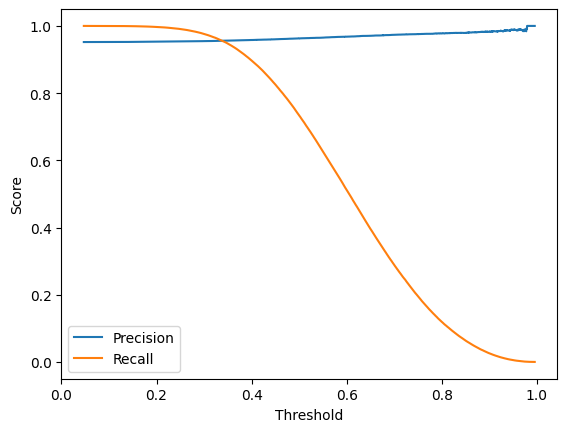

Optimal threshold: 0.099591434


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_valid, y_valid_pred_proba)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[(precision[:-1] + recall[:-1]).argmax()]
print("Optimal threshold:", optimal_threshold)
y_valid_pred = (y_valid_pred_proba > optimal_threshold).astype(int)



---



##### Submission

In [ ]:
# 누락된 데이터 개수 확인
missing_count = len(test) - len(y_test_pred_proba)

# 누락된 데이터를 균등 확률로 채우기
padding = pd.DataFrame({
    "Not_Delayed": [0.5] * missing_count,  # 클래스 0 (지연되지 않음)의 균등 확률
    "Delayed": [0.5] * missing_count       # 클래스 1 (지연됨)의 균등 확률
})

# 기존 예측 결과와 누락된 데이터를 합치기
pred_proba = pd.DataFrame({
    "Not_Delayed": 1 - y_test_pred_proba,  # 기존 클래스 0 확률
    "Delayed": y_test_pred_proba           # 기존 클래스 1 확률
})
pred_proba = pd.concat([pred_proba, padding], ignore_index=True)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ESAA/data/test.csv')

In [ ]:
# 제출 파일 생성
test_id = test['ID']

# pred_proba가 pandas DataFrame인 경우에 맞게 수정
submission = pd.DataFrame({
    'ID': test_id,                   # 테스트 데이터의 ID
    'Not_Delayed': pred_proba['Not_Delayed'],  # 클래스 0 확률
    'Delayed': pred_proba['Delayed']          # 클래스 1 확률
})

# 제출 파일 저장
submission.to_csv('submission.csv', index=False)
print("Submission 파일 저장 완료!")

Submission 파일 저장 완료!


#### **CatBoost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


In [ ]:
print(train.dtypes[train.dtypes == 'object'])

Series([], dtype: object)


In [ ]:
# 'Delay'를 타깃 변수로 설정하고, 나머지를 입력 변수로 설정
X = train.drop(['Delay'], axis=1)  # 타깃 변수 제외
y = train['Delay']  # 타깃 변수

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip show catboost

Name: catboost
Version: 1.2.7
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [ ]:
from catboost import CatBoostClassifier

print("CatBoostClassifier imported successfully!")

CatBoostClassifier imported successfully!


In [ ]:
categorical_features = []  # 범주형 변수 지정
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    cat_features=categorical_features,
    verbose=50,
    random_seed=42
)

model.fit(X, y)

0:	learn: 0.5682180	total: 1.37s	remaining: 11m 23s
50:	learn: 0.1848607	total: 47.4s	remaining: 6m 57s
100:	learn: 0.1814496	total: 1m 18s	remaining: 5m 11s
150:	learn: 0.1783868	total: 1m 51s	remaining: 4m 16s
200:	learn: 0.1758672	total: 2m 22s	remaining: 3m 32s
250:	learn: 0.1734007	total: 2m 54s	remaining: 2m 52s
300:	learn: 0.1711338	total: 3m 25s	remaining: 2m 16s
350:	learn: 0.1690472	total: 3m 57s	remaining: 1m 40s
400:	learn: 0.1669221	total: 4m 29s	remaining: 1m 6s
450:	learn: 0.1645537	total: 5m 2s	remaining: 32.8s
499:	learn: 0.1624486	total: 5m 33s	remaining: 0us


In [ ]:
# 예측 수행 (지연되지 않을 확률과 지연될 확률)
pred_proba = model.predict_proba(test)

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
# 제출 파일 생성

test_id = test['ID']

submission = pd.DataFrame({
    'ID': test_id,  # 테스트 데이터의 ID
    'Not_Delayed': pred_proba[:, 0],  # 지연되지 않을 확률
    'Delayed': pred_proba[:, 1]  # 지연될 확률
})

# 제출 파일 저장
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'


#### **LightGBM**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 객체형 컬럼을 모두 찾은 후 LabelEncoder로 변환
object_columns = test.select_dtypes(include=['object']).columns

# LabelEncoder 객체 생성
label_encoders = {}

for col in object_columns:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])  # 각 컬럼에 대해 LabelEncoder 적용
    label_encoders[col] = le  # 변환된 정보를 저장 (필요시 inverse_transform을 위해)

# LightGBM 모델 학습
X = train.drop(['Delay'], axis=1)
y = train['Delay']

model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

# 모델 학습
model.fit(X, y)

# 학습된 모델을 사용해 예측 (테스트 데이터셋)
pred_proba = model.predict_proba(test)  # 테스트 데이터 확률 예측

# 제출 파일 생성
test = pd.read_csv('/content/drive/MyDrive/ESAA/data/test_flight.csv')
test_id = test['ID']  # 테스트 데이터의 ID를 가져옴
submission = pd.DataFrame({
    'ID': test_id,  # 테스트 데이터의 ID
    'Not_Delayed': pred_proba[:, 0],  # 지연되지 않을 확률
    'Delayed': pred_proba[:, 1]  # 지연될 확률
})

# 제출 파일 저장
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")




[LightGBM] [Info] Number of positive: 908844, number of negative: 45704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2534
[LightGBM] [Info] Number of data points in the train set: 954548, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.952120 -> initscore=2.989988
[LightGBM] [Info] Start training from score 2.989988
Submission file saved as 'submission.csv'


#### **Random Forest**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(['Delay'], axis=1)
y = train['Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()
y_train.head()

,,,Delay
Day_of_Week,Flight_Duration,,
5,730,853565,1
1,91,205176,1
3,-460,442814,1
6,110,928441,1
2,180,403288,1


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 데이터 전처리 (범주형 변수 처리 및 결측값 처리)
le = LabelEncoder()
X['time_period'] = le.fit_transform(X['time_period'])
X['Season'] = le.fit_transform(X['Season'])
X = X.fillna(X.mean())  # 결측값 처리

# 하이퍼파라미터 범위 설정
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

# StratifiedKFold 설정
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 모델 정의
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV 설정
grid_rf = GridSearchCV(rf_model, param_grid=params, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1, error_score='raise')

# 모델 학습
grid_rf.fit(X, y)

# 최적의 파라미터 출력
print('Best Parameters:', grid_rf.best_params_)
print('Best Score:', grid_rf.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.952181556100344


In [ ]:
best_rf_model = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
best_rf_model.fit(X, y)

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# time_period와 Season 컬럼에 대해 레이블 인코딩 수행
le = LabelEncoder()
X_train['time_period'] = le.fit_transform(X_train['time_period'])
X_test['time_period'] = le.transform(X_test['time_period'])

X_train['Season'] = le.fit_transform(X_train['Season'])
X_test['Season'] = le.transform(X_test['Season'])

# 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.02      9193
           1       0.95      1.00      0.97    181717

    accuracy                           0.95    190910
   macro avg       0.61      0.50      0.50    190910
weighted avg       0.92      0.95      0.93    190910



- 정확도 0.95
- 정확도는 매우 높으나, precision과 recall을 살펴보았을 때, Delayed에 대한 예측 성능은 매우 낮음을 확인할 수 있다.



---



##### submission

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 범주형 변수 리스트는 RandomForest에서는 필요 없음
categorical_features = []  # 비워둠

# RandomForestClassifier 초기화 및 학습
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    random_state=42,
    verbose=50
)
# 모델 학습
model.fit(X_train, y_train)


building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    4.7s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    7.5s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   11.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   13.1s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:   16.5s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:   18.5s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:   22.1s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:   25.5s
building tree 10 of 100
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:   27.8s
building tree 11 of 100
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:   31.3s
building tree 12 of 100
[Parallel(n_jobs=1)]: Done  12 tasks      | elapse

RandomForestClassifier(max_depth=15, random_state=42, verbose=50)

In [ ]:
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# 누락된 데이터 개수 확인
missing_count = len(test) - len(y_test_pred_proba)

# 누락된 데이터를 균등 확률로 채우기
padding = pd.DataFrame({
    "Not_Delayed": [0.5] * missing_count,  # 클래스 0 (지연되지 않음)의 균등 확률
    "Delayed": [0.5] * missing_count       # 클래스 1 (지연됨)의 균등 확률
})

# 기존 예측 결과와 누락된 데이터를 합치기
pred_proba = pd.DataFrame({
    "Not_Delayed": 1 - y_test_pred_proba,  # 기존 클래스 0 확률
    "Delayed": y_test_pred_proba           # 기존 클래스 1 확률
})
pred_proba = pd.concat([pred_proba, padding], ignore_index=True)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Do

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ESAA/test.csv')

In [ ]:
# 제출 파일 생성
test_id = test['ID']

# pred_proba가 pandas DataFrame인 경우에 맞게 수정
submission = pd.DataFrame({
    'ID': test_id,                   # 테스트 데이터의 ID
    'Not_Delayed': pred_proba['Not_Delayed'],  # 클래스 0 확률
    'Delayed': pred_proba['Delayed']          # 클래스 1 확률
})

# 제출 파일 저장
submission.to_csv('submission.csv', index=False)
print("Submission 파일 저장 완료!")

Submission 파일 저장 완료!


#### **Logistic Regression**

##### 피처셀렉션

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0, stratify=y_resampled)

# 2. Logistic Regression 모델 생성 및 학습
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)  # L1 정규화를 사용하여 중요 피처 선택 가능
log_reg.fit(X_train, y_train)

# 3. SelectFromModel을 사용한 피처 선택
selector = SelectFromModel(log_reg, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# 4. 선택된 피처 확인
selected_features = X.columns[selector.get_support()]
print("선택된 피처:", selected_features.tolist())

# 5. 선택된 피처로 학습된 Logistic Regression 모델 평가
log_reg_selected = LogisticRegression(random_state=0)
log_reg_selected.fit(X_train_selected, y_train)

accuracy = log_reg_selected.score(X_val_selected, y_val)
lr_pred = log_reg_selected.predict(X_val_selected)
lr_pred_proba = log_reg_selected.predict_proba(X_val_selected)[:, 1]

print("선택된 피처 기반 Logistic Regression 정확도:", accuracy)

선택된 피처: ['Month', 'Estimated_Departure_Time', 'Estimated_Arrival_Time', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Total_Minutes', 'Arrival_Total_Minutes', 'Day_of_Week', 'Season']
선택된 피처 기반 Logistic Regression 정확도: 0.779129004395689


##### LogisticClassifier 사용

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_val, lr_pred, lr_pred_proba)

오차 행렬
[[109900  71869]
 [  8426 173343]]
정확도: 0.7791, 정밀도: 0.7069, 재현율: 0.9536, F1: 0.8119, AUC:0.8471


In [ ]:
# 누락된 데이터 개수 확인
missing_count = len(test) - len(lr_pred_proba)

# 누락된 데이터를 균등 확률로 채우기
padding = pd.DataFrame({
    "Not_Delayed": [0.5] * missing_count,  # 클래스 0 (지연되지 않음)의 균등 확률
    "Delayed": [0.5] * missing_count       # 클래스 1 (지연됨)의 균등 확률
})

# 기존 예측 결과와 누락된 데이터를 합치기
pred_proba = pd.DataFrame({
    "Not_Delayed": 1 - lr_pred_proba,  # 기존 클래스 0 확률
    "Delayed": lr_pred_proba          # 기존 클래스 1 확률
})
pred_proba = pd.concat([pred_proba, padding], ignore_index=True)

In [ ]:
test = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/open/test.csv')

In [ ]:
# 제출 파일 생성
test_id = test['ID']

# pred_proba가 pandas DataFrame인 경우에 맞게 수정
submission = pd.DataFrame({
    'ID': test_id,                   # 테스트 데이터의 ID
    'Not_Delayed': pred_proba['Not_Delayed'],  # 클래스 0 확률
    'Delayed': pred_proba['Delayed']          # 클래스 1 확률
})

# 5. 제출 파일 저장
submission.to_csv('/content/drive/My Drive/pythonprogramming/ESAA/open/final_submission.csv', index=False)
print("최종 제출 파일이 'final_submission.csv'로 저장되었습니다.")

최종 제출 파일이 'final_submission.csv'로 저장되었습니다.
